## HENRIQUE SENA - henriquebsena@gmail.com

### OBJETIVO: 
Anlisar o conjunto de dados "qualidade_do_ar.csv" e responder as seguintes perguntas:

    1.	Escolha uma estratégia de tratamento de valores faltantes e outliers e justifique sua escolha.
    2.	Para as quartas-feiras, quais os horários de pico na cidade (de maior concentração de CO) ?
    3.	Quais as variáveis mais correlacionadas com a variável de predição?
    4.	Crie um modelo de regressão de PT08.S1 a partir das demais variáveis. Avalie usando as métricas que julgar pertinente para o problema.
    5.	Pergunta bônus: como as estações do ano interferem nas variáveis/predição e qual sua proposta de solução?

**Obs:** Tais perguntas servem para direcionar a análise e qualquer conhecimento extra é bem vindo.

### DESCRIÇÃO DOS DADOS:

O conjunto de dados contém 9358 resultados médios de 5 sensores químicos de um dispositivo multisensor (PTXX.SX). O dispositivo estava localizado a nível da rua, dentro de uma cidade significativamente poluída. Os dados foram registrados de março de 2004 a fevereiro de 2005 (um ano). Valores ausentes são marcados com o valor -200. A medida de outros sensores também está disponível e algumas podem ser redundantes. A variável chave a ser analisada é PT08.S1 (CO), concentração de CO na atmosfera.

Informação das colunas (variáveis):

    1.	Date (DD/MM/YYYY) 
    2.	Time (HH.MM.SS) 
    3.	PT08.S1 (CO) – Variável de predição
    4.	Non Metanic HydroCarbons Concentration (mg/m^3)
    5.	4 Benzene Concentration (mg/m^3) 
    6.	PT08.S2 (NMHC) 
    7.	NOx Concentration (ppb) 
    8.	PT08.S3 (NOx) 
    9.	8 NO2 Concentration (mg/m^3) 
    10.	PT08.S4 (NO2s) 
    11.	PT08.S5 (O3) 
    12.	Temperature (C) 
    13.	Relative Humidity (%) 
    14.	AH Absolute Humidity 


# 

## Seção 1 - Limpando a memória e ajustando caminho de diretório

In [1]:
rm(list=ls())
setwd("C:\\Users\\chbse\\Desktop\\TESTE")
getwd()


[1] "C:/Users/chbse/Desktop/TESTE"

## Seção 2 - Pacotes utilizados no estudo


In [2]:
#install.packages('imputeTS', repos='http://cran.us.r-project.org') # pra colocar no Jupyter
#install.packages('car', repos='http://cran.us.r-project.org') # pra colocar no Jupyter
#install.packages('DescTools', repos='http://cran.us.r-project.org') # pra colocar no Jupyter
#install.packages('hnp', repos='http://cran.us.r-project.org') # pra colocar no Jupyter
#install.packages('boot', repos='http://cran.us.r-project.org') # pra colocar no Jupyter
#install.packages('TSA', repos='http://cran.us.r-project.org') # pra colocar no Jupyter
#install.packages('ciTools', repos='http://cran.us.r-project.org') # pra colocar no Jupyter

require(ciTools) #impostante para fazer o IC de predição para glm
require(DescTools)
require(readr)
require(boot)
require(hnp)
require(stringr)
require(forecast)
require(imputeTS)
require(tseries)
require(car)
require(repr) #importante para redimensionar os gráficos do R no Jupyter
require(TSA)


Carregando pacotes exigidos: ciTools

ciTools version 0.6.1 (C) Institute for Defense Analyses

Carregando pacotes exigidos: DescTools

Carregando pacotes exigidos: readr

Carregando pacotes exigidos: boot

Carregando pacotes exigidos: hnp

Carregando pacotes exigidos: MASS

Carregando pacotes exigidos: stringr

Carregando pacotes exigidos: forecast

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: 'forecast'


The following object is masked from 'package:DescTools':

    BoxCox


Carregando pacotes exigidos: imputeTS

Carregando pacotes exigidos: tseries


Attaching package: 'tseries'


The following object is masked from 'package:imputeTS':

    na.remove


Carregando pacotes exigidos: car

Carregando pacotes exigidos: carData


Attaching package: 'car'


The following object is masked from 'package:boot':

    logit


The following object is masked from 'package:DescTools':

    Recode


Carregando pacotes exigido

## Seção 3 - Carregando os dados no R

In [3]:
qualidade_do_ar = readr::read_delim("qualidade_do_ar.csv", 
                              ";", 
                              escape_double = FALSE, 
                              col_types = cols(`Date` = col_date(format = "%d/%m/%Y"), 
                                               `Time` = col_character(), 
                                               `PT08.S1(CO)` = col_double(), 
                                               `NMHC(GT)` = col_double(), 
                                               `C6H6(GT)` = col_double(), 
                                               `PT08.S2(NMHC)` = col_double(), 
                                               `NOx(GT)` = col_double(), 
                                               `PT08.S3(NOx)` = col_double(), 
                                               `NO2(GT)` = col_double(), 
                                               `PT08.S4(NO2)` = col_double(), 
                                               `PT08.S5(O3)` = col_double(), 
                                               `T` = col_double(), 
                                               `RH` = col_double(), 
                                               `AH` = col_double()), 
                              locale = locale(decimal_mark = ","), 
                              trim_ws = TRUE)

DF_FINAL = data.frame(qualidade_do_ar, stringsAsFactors=FALSE); head(DF_FINAL, 5)


,Date,Time,PT08.S1.CO.,NMHC.GT.,C6H6.GT.,PT08.S2.NMHC.,NOx.GT.,PT08.S3.NOx.,NO2.GT.,PT08.S4.NO2.,PT08.S5.O3.,T,RH,AH
,<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2004-03-10,18.00.00,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
2,2004-03-10,19.00.00,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
3,2004-03-10,20.00.00,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
4,2004-03-10,21.00.00,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
5,2004-03-10,22.00.00,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


## Seção 4 - Colando valor 'NA' nos dados austentes e verificando o percentual de valores ausentes

In [4]:
DATA_COL_NAME = colnames(DF_FINAL)

for(i in 3:ncol(DF_FINAL)){
  DF_FINAL[DF_FINAL[,i]==(-200),i]=NA
}

DATA_COL_NAME = colnames(DF_FINAL)
DATA_COL_NAME_CODES = c('DATE','TIME','Y',paste('X',1:11,sep=''))
TABLE_NA=data.frame(QTD_NA=numeric(), QTD_NA_PERCENT=numeric())
for(i in 1:ncol(DF_FINAL)){
  AUX01__= sum(is.na(DF_FINAL[,i]))
  AUX02__=(sum(is.na(DF_FINAL[,i]))/length(DF_FINAL[,i]))*100
  
  TABLE_NA[i,]=c(AUX01__,AUX02__)
}

TABLE_NA=data.frame(COL_CODE = DATA_COL_NAME_CODES ,COL=DATA_COL_NAME, TABLE_NA, stringsAsFactors=FALSE); TABLE_NA

,COL_CODE,COL,QTD_NA,QTD_NA_PERCENT
,<chr>,<chr>,<dbl>,<dbl>
1,DATE,Date,0,0.00000
2,TIME,Time,0,0.00000
3,Y,PT08.S1.CO.,366,3.91151
4,X1,NMHC.GT.,8443,90.23191
5,X2,C6H6.GT.,366,3.91151
6,X3,PT08.S2.NMHC.,366,3.91151
7,X4,NOx.GT.,1639,17.51630
8,X5,PT08.S3.NOx.,366,3.91151
9,X6,NO2.GT.,1642,17.54836


**Obs:** Devemos remover a variável X1 por seu carater de falta de observações. A variáveis X4 e X6 apresentam mais valores ausentes do que a variável resposta. Isso pode gerar algum problema que deve ser avaliado posteriormente. A variáveis restantes, apresentam mesma quantidade de valores ausentes que a variável resposta. Contudo, dado o grande volume de dados, devemos verificar se estes valores ausentes estão nos mesmos índices das linhas da variável resposta. A seguir um pequeno teste.

In [5]:
# Pequeno teste

DF_TESTE_NA = DF_FINAL[,c(3,5,6,8,10:14)]
INDEX_ = 1:dim(DF_TESTE_NA)[1]
for(i in 2:dim(DF_TESTE_NA)[2]){
  if( prod(INDEX_[is.na(DF_TESTE_NA[,1])] == INDEX_[is.na(DF_TESTE_NA[,i])]) == 0 ){
    print(i)
  }  
}

# Como não houve 'prints' durante a estrutura 'for', concluímos que os valores ausentes estão nos mesmos
# índices de linha da variável reposta.


## Seção 5 - Estatísticas descritivas das variáveis

In [6]:
# Função para calcular as estatísticas descritivas

desc_stats_fun = function(x__){
  moment_cent = function(y__, t__){
    return(mean((y__ - mean(y__))^(t__)))
  }
  
  min_ = min(x__) #mínimo
  max_= max(x__) #máximo
  amp_total_ = (max_ - min_) #amplitude total
  mean_ = mean(x__) #média
  sd_ = sd(x__) #desvio padrão
  dv_med_ = mean(abs(x__-mean(x__))) #desvio médio
  var_ = var(x__) #variância
  median_ = median(x__) #mediana
  iiq_ = as.numeric(quantile(x__, 0.75) - quantile(x__, 0.25)) #intervalo interquartílico
  K_ = moment_cent(x__, 3)/(moment_cent(x__, 2)^(3/2)) # medida de assimetria
  C_ = moment_cent(x__, 4)/(moment_cent(x__, 2)^(2)) # medida de curtose
  CV_ = sd_/mean_
  return(c(min_, max_, amp_total_, mean_ ,sd_ ,dv_med_ ,var_ ,median_ ,iiq_ ,K_, C_, CV_))
  
}

# Objeto que irá armazenar as estatísticas
DF_STATS_01=data.frame(minimo=numeric(),
                    maximo=numeric(),
                    amp_tot=numeric(),
                    media=numeric(),
                    desv_pad=numeric(),
                    desv_med=numeric(),
                    var=numeric(),
                    mediana=numeric(),
                    iiq=numeric(),
                    assimetria=numeric(),
                    curtose=numeric(),
                    coef_var = numeric())
              

# Estrutura para calcular as estatísticas de todas as variáveis numéricas do conjunto de dados.
# Vale comentar que durante o cálculo das estatísticas, os valores ausentes 'NA' são removidos.
for(i in 3:14){ #3:14 pois são as colunas numéricas do estudo
  DF_STATS_01[i-2,]=desc_stats_fun(na.omit(DF_FINAL[,i]))
    
}


# Resultado
DF_STATS_01=data.frame(COL=DATA_COL_NAME[3:14],round(DF_STATS_01,2)); 
DF_STATS_01 #medidas com 2 casas decimais


,COL,minimo,maximo,amp_tot,media,desv_pad,desv_med,var,mediana,iiq,assimetria,curtose,coef_var
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,PT08.S1.CO.,647.00,2040.00,1393.00,1099.83,217.08,173.73,47123.74,1063.0,294.00,0.76,3.33,0.20
2,NMHC.GT.,7.00,1189.00,1182.00,218.81,204.46,156.24,41803.86,150.0,230.00,1.55,5.25,0.93
3,C6H6.GT.,0.10,63.70,63.60,10.08,7.45,5.78,55.50,8.2,9.60,1.36,5.49,0.74
4,PT08.S2.NMHC.,383.00,2214.00,1831.00,939.15,266.83,215.94,71199.01,909.0,381.50,0.56,3.06,0.28
5,NOx.GT.,2.00,1479.00,1477.00,246.90,212.98,159.06,45360.13,180.0,228.00,1.72,6.40,0.86
6,PT08.S3.NOx.,322.00,2683.00,2361.00,835.49,256.82,195.12,65955.14,806.0,311.50,1.10,5.68,0.31
7,NO2.GT.,2.00,340.00,338.00,113.09,48.37,38.17,2339.67,109.0,64.00,0.62,3.46,0.43
8,PT08.S4.NO2.,551.00,2775.00,2224.00,1456.26,346.21,273.63,119859.14,1463.0,447.00,0.21,3.08,0.24
9,PT08.S5.O3.,221.00,2523.00,2302.00,1022.91,398.48,320.08,158789.73,963.0,542.00,0.63,3.08,0.39


## Seção 6 - Substituindo valores ausentes por valores interpolados (método linear)

In [7]:
DF_STUDY = DF_FINAL
for(i in 3:ncol(DF_FINAL)){
  DF_STUDY[,i] = imputeTS::na_interpolation(DF_FINAL[,i], option = "linear")
}

colnames(DF_STUDY) = c('DATE', 'TIME', 'Y', paste('X',1:11,sep=''))
head(DF_STUDY[is.na(DF_FINAL[,3]),],5) #valores interpolados (método linear)

,DATE,TIME,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11
,<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
525,2004-04-01,14.00.00,1170.75,222,10.550,991.25,99,901.00,72,1454.75,889.25,22.250,32.300,0.85565
526,2004-04-01,15.00.00,1216.50,197,12.500,1058.50,108,865.00,81,1367.50,988.50,22.700,30.700,0.83420
527,2004-04-01,16.00.00,1262.25,319,14.450,1125.75,131,829.00,93,1280.25,1087.75,23.150,29.100,0.81275
702,2004-04-08,23.00.00,1062.72,137,6.384,827.72,129,987.92,106,1416.96,978.20,14.016,46.876,0.74494
703,2004-04-09,00.00.00,1067.44,189,6.468,831.44,154,982.84,109,1422.92,985.40,13.932,47.752,0.75358


In [8]:
# Por curiosidade, vamos verificar como ficará as estatísticas descritivas agora.

# Objeto que irá armazenar as estatísticas
DF_STATS_02 = data.frame(minimo=numeric(),
                    maximo=numeric(),
                    amp_tot=numeric(),
                    media=numeric(),
                    desv_pad=numeric(),
                    desv_med=numeric(),
                    var=numeric(),
                    mediana=numeric(),
                    iiq=numeric(),
                    assimetria=numeric(),
                    curtose=numeric(),
                    coef_var = numeric())
              

# Estrutura para calcular as estatísticas de todas as variáveis numéricas do conjunto de dados.
for(i in 3:14){ #3:14 pois são as colunas numéricas do estudo
  DF_STATS_02[i-2,]=desc_stats_fun(na.omit(DF_STUDY[,i]))
    
}


# Resultado
DF_STATS_02 = data.frame(COL=DATA_COL_NAME[3:14],round(DF_STATS_02,2)); 
DF_STATS_02 #medidas com 2 casas decimais


,COL,minimo,maximo,amp_tot,media,desv_pad,desv_med,var,mediana,iiq,assimetria,curtose,coef_var
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,PT08.S1.CO.,647.00,2040.00,1393.00,1103.06,218.20,175.67,47609.65,1067.00,301.00,0.71,3.21,0.20
2,NMHC.GT.,7.00,1189.00,1182.00,269.83,74.25,27.71,5513.36,275.00,0.00,1.69,24.30,0.28
3,C6H6.GT.,0.10,63.70,63.60,10.18,7.50,5.84,56.31,8.30,9.60,1.34,5.32,0.74
4,PT08.S2.NMHC.,383.00,2214.00,1831.00,942.14,267.87,216.94,71752.52,910.01,383.00,0.56,3.02,0.28
5,NOx.GT.,2.00,1479.00,1477.00,241.92,204.32,153.60,41744.65,180.00,230.00,1.70,6.53,0.84
6,PT08.S3.NOx.,322.00,2683.00,2361.00,832.76,255.71,194.84,65387.52,804.00,314.00,1.09,5.64,0.31
7,NO2.GT.,2.00,340.00,338.00,109.63,46.46,36.46,2158.75,104.92,60.31,0.71,3.70,0.42
8,PT08.S4.NO2.,551.00,2775.00,2224.00,1453.30,343.21,271.16,117790.45,1460.00,441.00,0.21,3.11,0.24
9,PT08.S5.O3.,221.00,2523.00,2302.00,1032.54,404.45,326.85,163577.87,970.00,560.00,0.60,2.95,0.39


## Seção 7 - Ajustando a variável Hora e criando variáveis relacionadas ao tempo e a data

In [9]:
DF_STUDY[,2] = gsub("[.]", ":",DF_STUDY[,2]); #head(DF_STUDY[,2], 10) #ajustando o formato da hora

DATE_TIME = as.POSIXct(strptime(paste(DF_STUDY[,1], DF_STUDY[,2], sep=" "),"%Y-%m-%d %H:%M:%S")); #head(DATE_TIME, 10) #unido a data com a hora

YEAR = substr(DF_STUDY[,1],1,4); #head(YEAR, 10) #ano

MONTH = substr(DF_STUDY[,1],6,7); #head(MONTH, 10) #mês

DAY = substr(DF_STUDY[,1],9,10); #head(DAY, 10) #dia

W_DAY = c("Sunday", "Monday", "Tuesday", "Wednesday", 
        "Thursday", "Friday", "Saturday")[as.POSIXlt(DF_FINAL[,1])$wday + 1]; #head(W_DAY, 10) #dia da semana

NEW_DF_STUDY = data.frame(DATE_TIME=as.character(DATE_TIME), DATE=DF_STUDY[,1], TIME=DF_STUDY[,2], YEAR, MONTH, DAY, W_DAY, DF_STUDY[,3:14], stringsAsFactors=FALSE)
NEW_DF_STUDY[5671,1]="2004-11-02 00:00:00" #ajuste manual de NA
head(NEW_DF_STUDY[5669:5673,])



,DATE_TIME,DATE,TIME,YEAR,MONTH,DAY,W_DAY,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11
,<chr>,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5669,2004-11-01 22:00:00,2004-11-01,22:00:00,2004,11,01,Monday,1260,275,15.3,1160,403,568,79,1755,1231,19.6,75.3,1.6981
5670,2004-11-01 23:00:00,2004-11-01,23:00:00,2004,11,01,Monday,1184,275,13.0,1084,357,612,71,1674,1151,19.3,75.8,1.6762
5671,2004-11-02 00:00:00,2004-11-02,00:00:00,2004,11,02,Tuesday,1122,275,10.5,996,259,660,62,1586,1048,18.4,76.3,1.6017
5672,2004-11-02 01:00:00,2004-11-02,01:00:00,2004,11,02,Tuesday,983,275,7.6,881,227,752,56,1472,928,18.2,76.4,1.5787
5673,2004-11-02 02:00:00,2004-11-02,02:00:00,2004,11,02,Tuesday,885,275,4.8,753,147,878,49,1374,813,17.9,74.8,1.5219


## Seção 8 - Verificando os padrões de horários as quartas-feiras

In [10]:
NEW_DF_STUDY_SUB_01 = NEW_DF_STUDY[NEW_DF_STUDY$W_DAY=="Wednesday",]; #head(NEW_DF_STUDY_SUB_01)

TS_WEDNESDAY =  ts(data = NEW_DF_STUDY_SUB_01$Y, start = c(1,18), frequency = 24) 
HORA_NUMERIC = as.numeric(substr(NEW_DF_STUDY_SUB_01$TIME,1,2))

IQQ_FUN=function(X_){return(as.numeric(quantile(X_,0.75)-quantile(X_,0.25)))} # intervalo inter quartílico
DF_HORA = data.frame(TS_WEDNESDAY, HORA = NEW_DF_STUDY_SUB_01$TIME)
DF_YW_medain = aggregate(TS_WEDNESDAY~as.factor(HORA), data=DF_HORA, median)
DF_YW_mean = aggregate(TS_WEDNESDAY~as.factor(HORA), data=DF_HORA, mean)
DF_YW_sd = aggregate(TS_WEDNESDAY~as.factor(HORA), data=DF_HORA, sd)
DF_YW_IIQ = aggregate(TS_WEDNESDAY~as.factor(HORA), data=DF_HORA, IQQ_FUN)
DF_YW_POSI = data.frame(DF_YW_medain, DF_YW_IIQ[,2], DF_YW_mean[,2], DF_YW_sd[,2])
colnames(DF_YW_POSI) = c('Hora','Mediana', 'IIQ', 'Media', 'Des_Pad')
DF_YW_POSI[,2:5]=round(DF_YW_POSI[,2:5],2) 

DF_YW_POSI[which.max(DF_YW_POSI$Mediana),] #Resultado do horário com maior pico em geral


,Hora,Mediana,IIQ,Media,Des_Pad
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
9,08:00:00,1339,294.5,1332.58,220.42


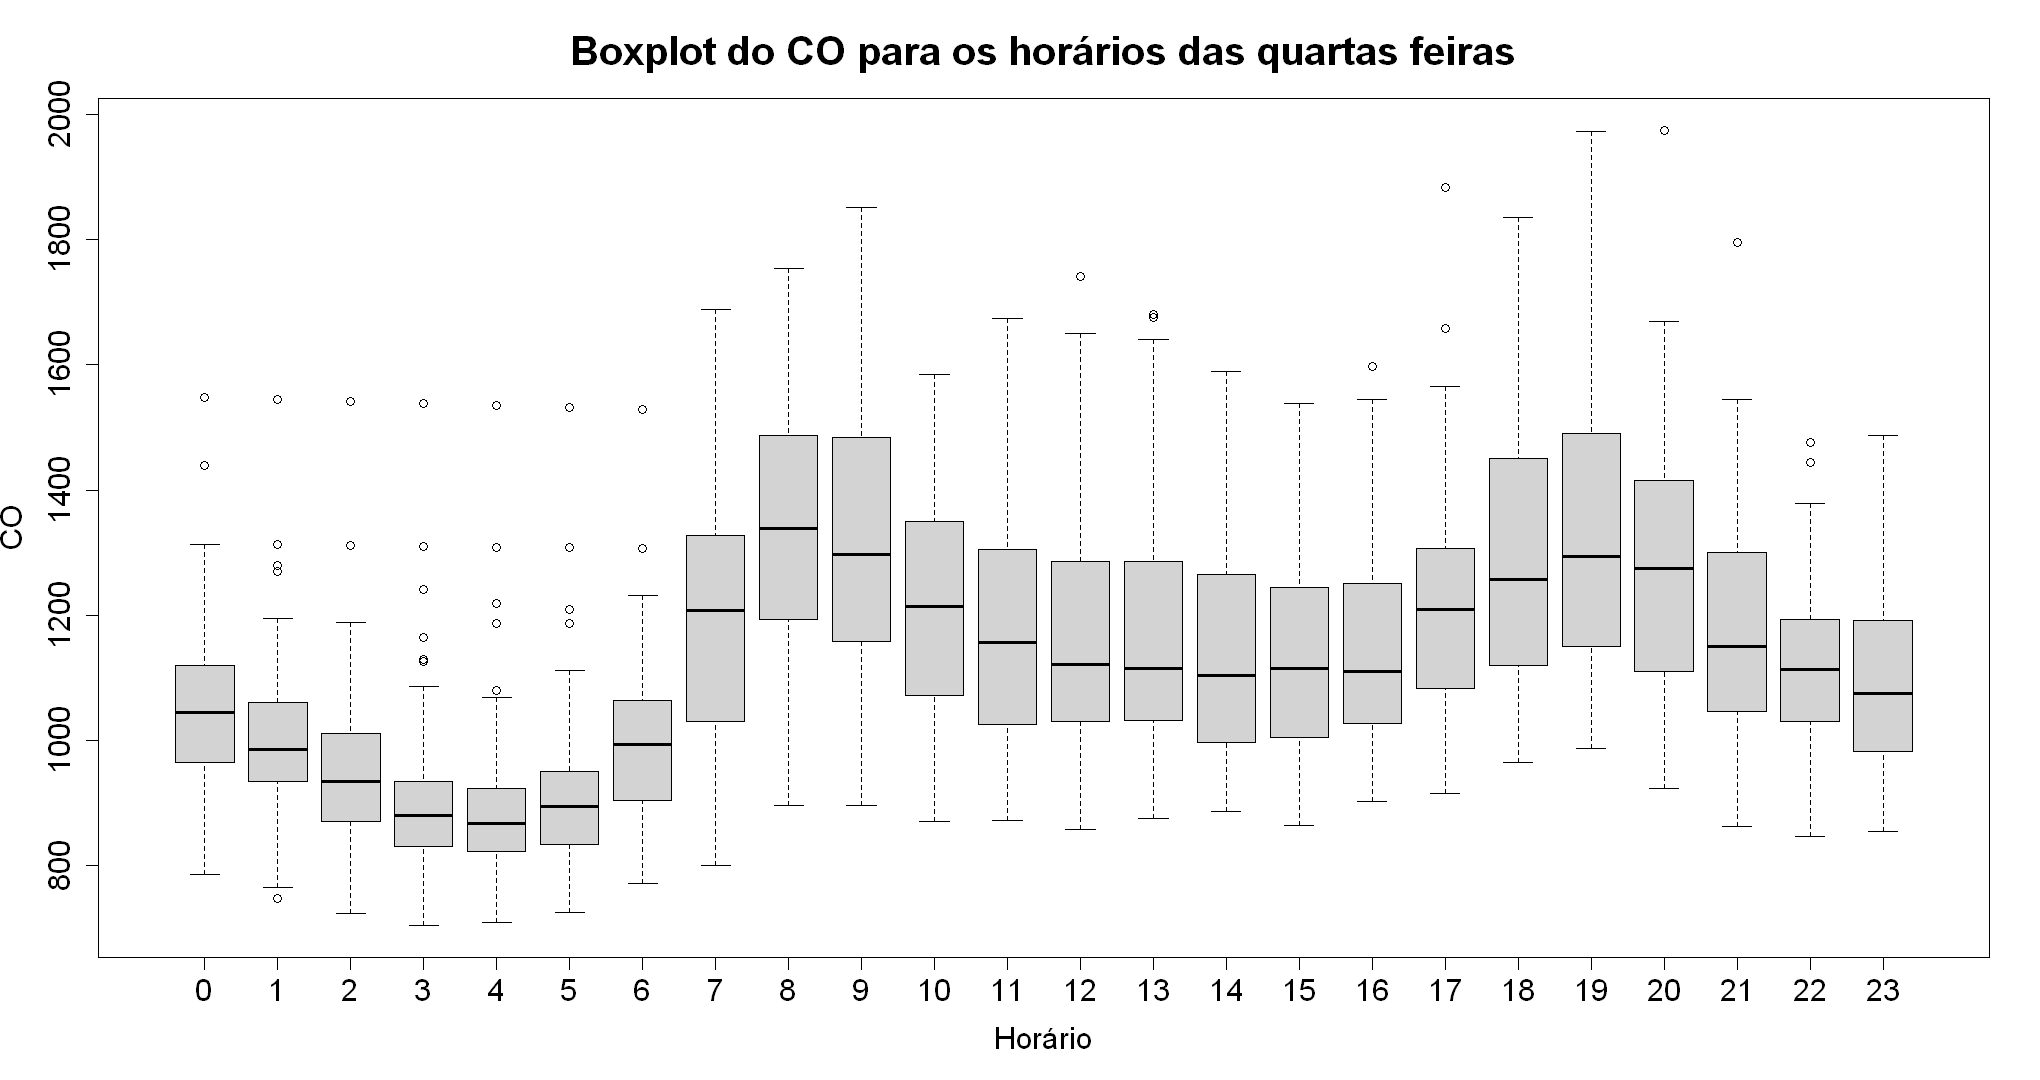

In [11]:
### Boxplot para identificar graficamente os padrões de horário na quarta feira.

#x11(width=3000, height=1500)
#par(mfrow=c(1,2))
options(repr.plot.width=17, repr.plot.height=9) #pacote repr
boxplot(TS_WEDNESDAY ~ HORA_NUMERIC, 
            xlab = 'Horário', 
            ylab = 'CO', 
            main = 'Boxplot do CO para os horários das quartas feiras',
            cex.lab=1.5, cex.axis=1.5, cex.main=2)

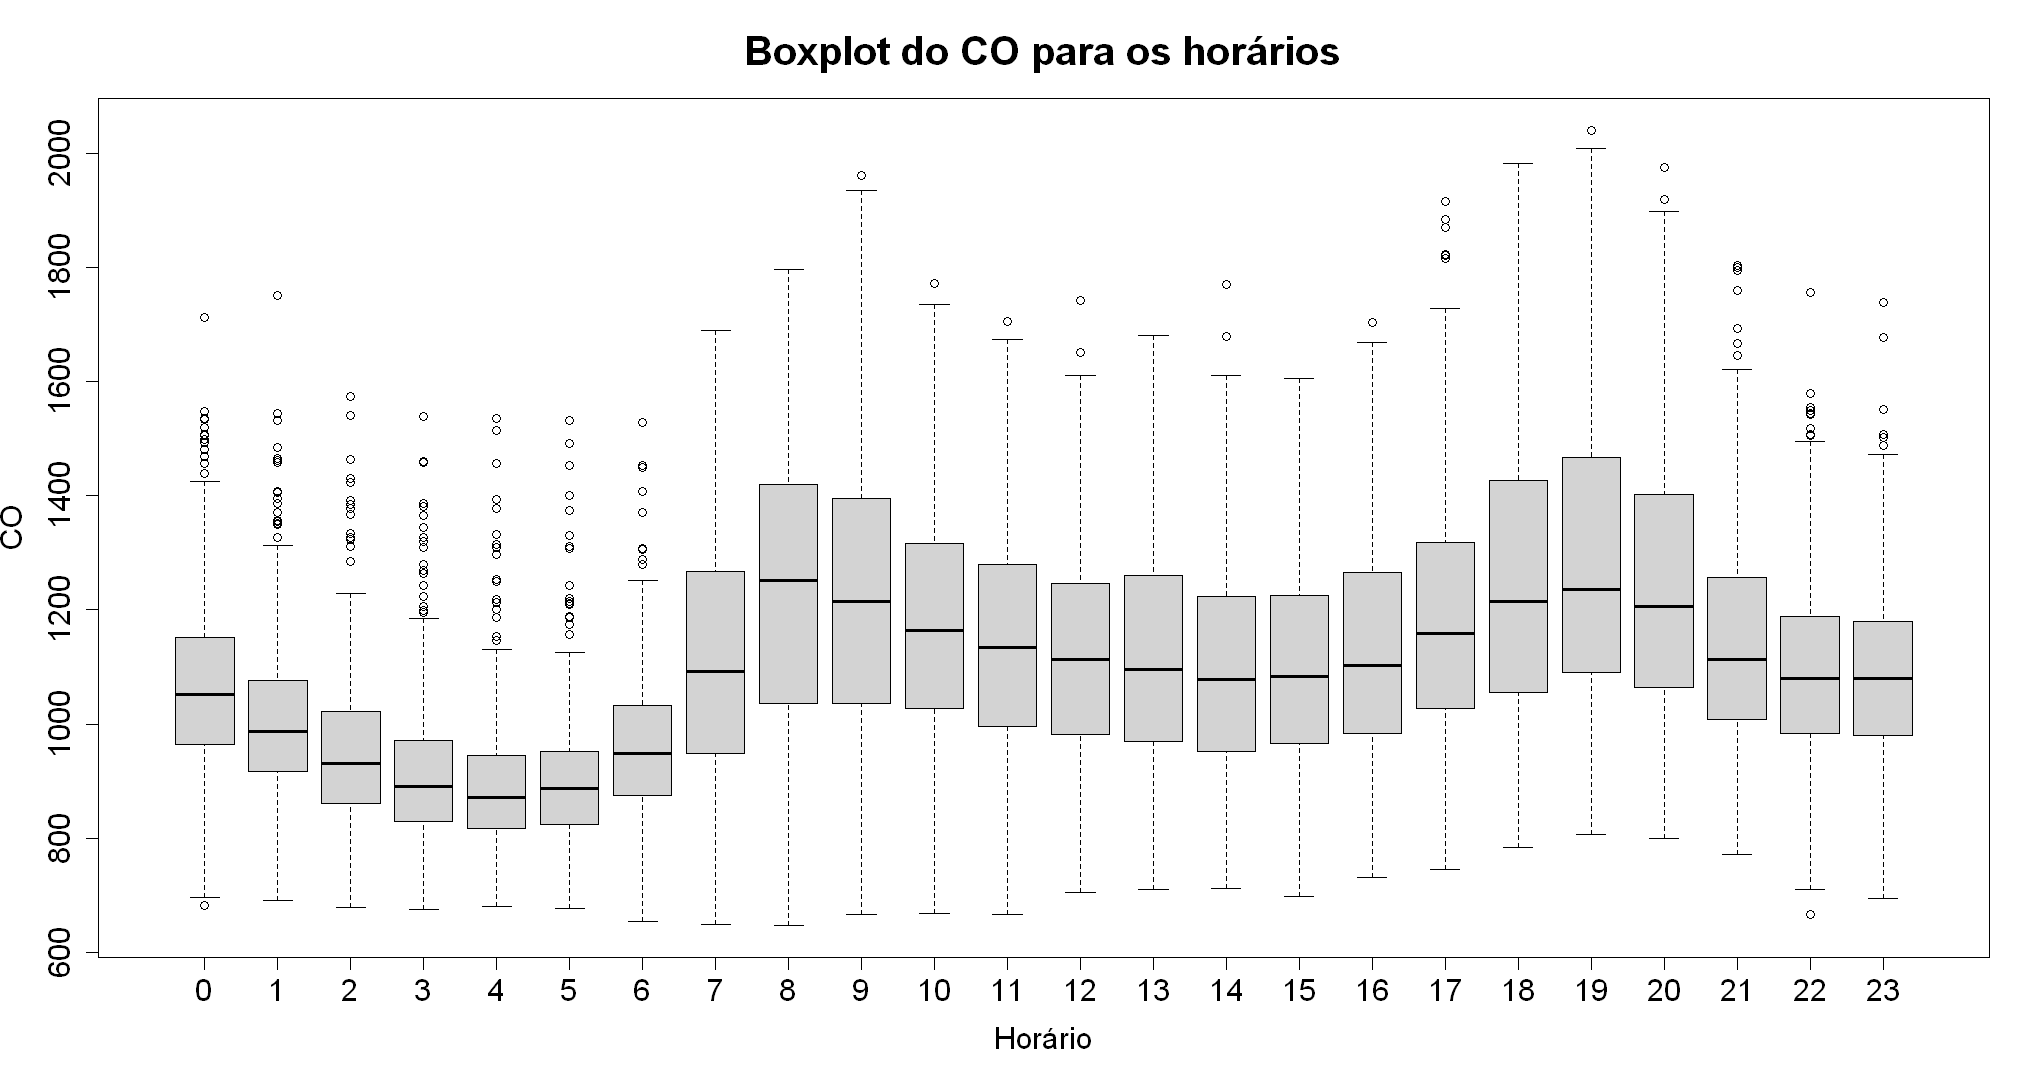

In [12]:
# A quem interessa, aqui temos o gráfico para o conjunto de dados completo no qual vemos o mesmo padrão das quartas feira.

options(repr.plot.width=17, repr.plot.height=9) #pacote repr
boxplot(NEW_DF_STUDY$Y~as.numeric(substr(NEW_DF_STUDY$TIME, 1, 2)), 
            xlab = 'Horário', 
            ylab = 'CO',
            main = 'Boxplot do CO para os horários',
            cex.lab=1.5, cex.axis=1.5, cex.main=2)

# Veja que é um padrão bem parecido

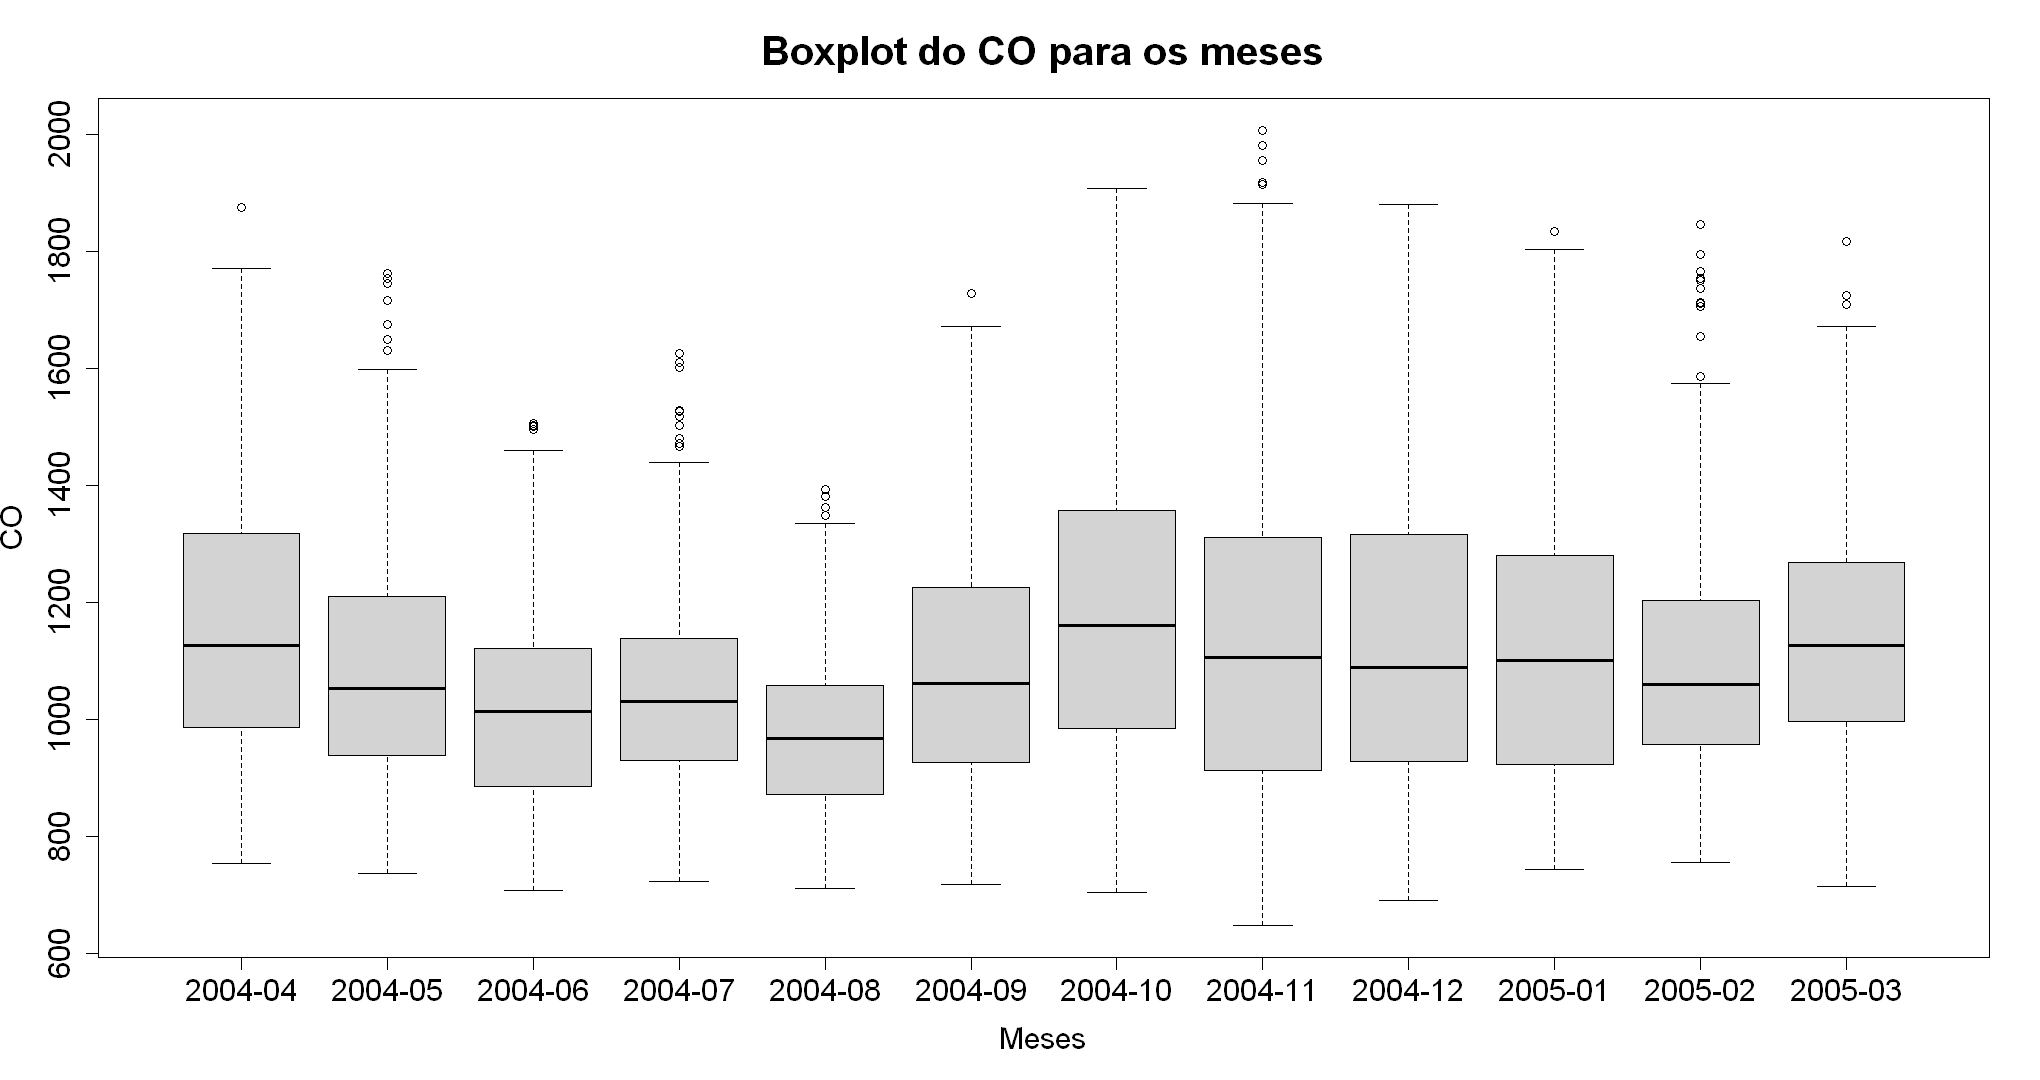

In [13]:
# A quem interessa, aqui temos o gráfico parecido, mas com a visão por mês para ajudar a entender melhor a variável reposta.
# Obs: Eu estarei trabalhando somente com os meses completos.

OBS_MES = substr(NEW_DF_STUDY$DATE_TIME, 1, 7)
OBS_Y = NEW_DF_STUDY$Y
IND_AUX = OBS_MES!='2005-04' & OBS_MES!='2004-03' #variável indicadora para remover os meses que não possuem todos os dias.

options(repr.plot.width=17, repr.plot.height=9) #pacote repr
boxplot(OBS_Y[IND_AUX]~as.factor(OBS_MES[IND_AUX]), 
            xlab = 'Meses', 
            ylab = 'CO',
            main = 'Boxplot do CO para os meses',
            cex.lab=1.5, cex.axis=1.5, cex.main=2)





**Obs**: Fica a dúvida, será que esse padrão de CO e horas que o gráfico apresentou poderia ser utilizado como sazonalidade? Será que os meses estão influenciando a série, já que temos pouco mais de 1 ano?

## Seção 9 - Medida de correlação linear de Pearson par as variáveis

**Obs:** Vou construir 3 bases (hora, dia e mês). Estarei utilizando a média como estatística de posição para agrupar os valores observados nas horas. A média será usada para tentar incorporar a variabilidade observadas nas horas, já que a mesma é menos robusta a valores extremos e quero tentar captar um pouco da variabilidade com essa deficiência da média. Além disso, estarei trabalhando com dias que apresentem 24 horas, então vou remover os dias '2005-04-4' e '2004-03-10' para a base que contém os dias. Já para a base que contém os meses, estarei trbalhando com aqueles meses que apresentem todos os dias, assim estarei removendo os meses '2005-04' e '2004-03'.


In [14]:
# Base das horas
DF_STUDY_HORA = NEW_DF_STUDY # base de dados para estudo com horas

# Base dos dias
DF_STUDY_DAY_REMOVED = DF_STUDY_HORA[DF_STUDY_HORA$DATE != '2005-04-4' & DF_STUDY_HORA$DATE != '2004-03-10', ]
DF_STUDY_DIA = data.frame(DATE=as.character(data.frame(table(DF_STUDY_DAY_REMOVED$DATE))[,1])) # base de dados para estudo com dia
for(i in 8:ncol(DF_STUDY_DAY_REMOVED)){
  C=aggregate(DF_STUDY_DAY_REMOVED[,i]~as.factor(DF_STUDY_DAY_REMOVED[,2]),data=DF_STUDY_DAY_REMOVED, mean)
  DF_STUDY_DIA = data.frame(DF_STUDY_DIA,C[,2])
}
colnames(DF_STUDY_DIA)=c('DATE','Y',paste('X',1:11,sep=''))

#Base dos meses
DF_STUDY_MONTH_REMOVED = DF_STUDY_HORA[substr(DF_STUDY_HORA$DATE,1,7) != '2005-04' & substr(DF_STUDY_HORA$DATE,1,7) != '2004-03', ]
DF_STUDY_MONTH_REMOVED = data.frame(Y_M=substr(DF_STUDY_MONTH_REMOVED$DATE,1,7),DF_STUDY_MONTH_REMOVED)
DF_STUDY_MES = data.frame(DATE=as.character(data.frame(table(DF_STUDY_MONTH_REMOVED$Y_M))[,1])) # base de dados para estudo com dia
for(i in 9:ncol(DF_STUDY_MONTH_REMOVED)){
  C=aggregate(DF_STUDY_MONTH_REMOVED[,i]~as.factor(DF_STUDY_MONTH_REMOVED[,1]),data=DF_STUDY_MONTH_REMOVED, mean)
  DF_STUDY_MES = data.frame(DF_STUDY_MES,C[,2])
}
colnames(DF_STUDY_MES)=c('DATE_MONTH','Y',paste('X',1:11,sep=''))

# Reajustando a base com as horas para colocar somente hora e os dados.
DF_STUDY_HORA = DF_STUDY_HORA[,c(1,8:ncol(DF_STUDY_HORA))] 


In [15]:
# Correlação entre as variáveis

cor_matrix_values_variable = round(cbind(
  cor(DF_STUDY_HORA[,-1])[1,], 
  cor(DF_STUDY_DIA[,-1])[1,],
  cor(DF_STUDY_MES[,-1])[1,]
),2)

cor_variables_labs=paste('Y : ',c('Y',paste('X',1:11,sep='')),sep='')

COR_VARIABLES = data.frame(cor_variables_labs, cor_matrix_values_variable)

colnames(COR_VARIABLES) = c('cor','hora', 'dia', 'mes')

COR_VARIABLES


,cor,hora,dia,mes
,<chr>,<dbl>,<dbl>,<dbl>
Y,Y : Y,1.00,1.00,1.00
X1,Y : X1,0.23,0.11,-0.33
X2,Y : X2,0.88,0.79,0.50
X3,Y : X3,0.89,0.80,0.43
X4,Y : X4,0.67,0.59,0.69
X5,Y : X5,-0.78,-0.68,-0.41
X6,Y : X6,0.62,0.48,0.48
X7,Y : X7,0.67,0.44,-0.34
X8,Y : X8,0.90,0.89,0.84


## Seção 10 - Gráficos de dispersão das variáveis (informação hora a hora e dia a dia)

Aqui iremos construir os gráficos de dispersão da variável resposta e as covariáveis. Iremos trabalhar os dados no formato hora a hora e comparar o formato interpolado e não interpolado. Além disso, também iremos apresentar como fica o padrão de dispersão da variáveis para o formato no qual as variáveis são mensuradas por dia, assim como foi feito na seção 9. Vale comentar que não iremos trabalhar o fomato mensal devido a existir poucas observações. Por fim, vale comentar que a base com informação dia a dia segue o padrão visto na seção 9. 

**Obs:** Não iremos trabalhar com a informação da vairável X1, devido a sua ausência de informção.

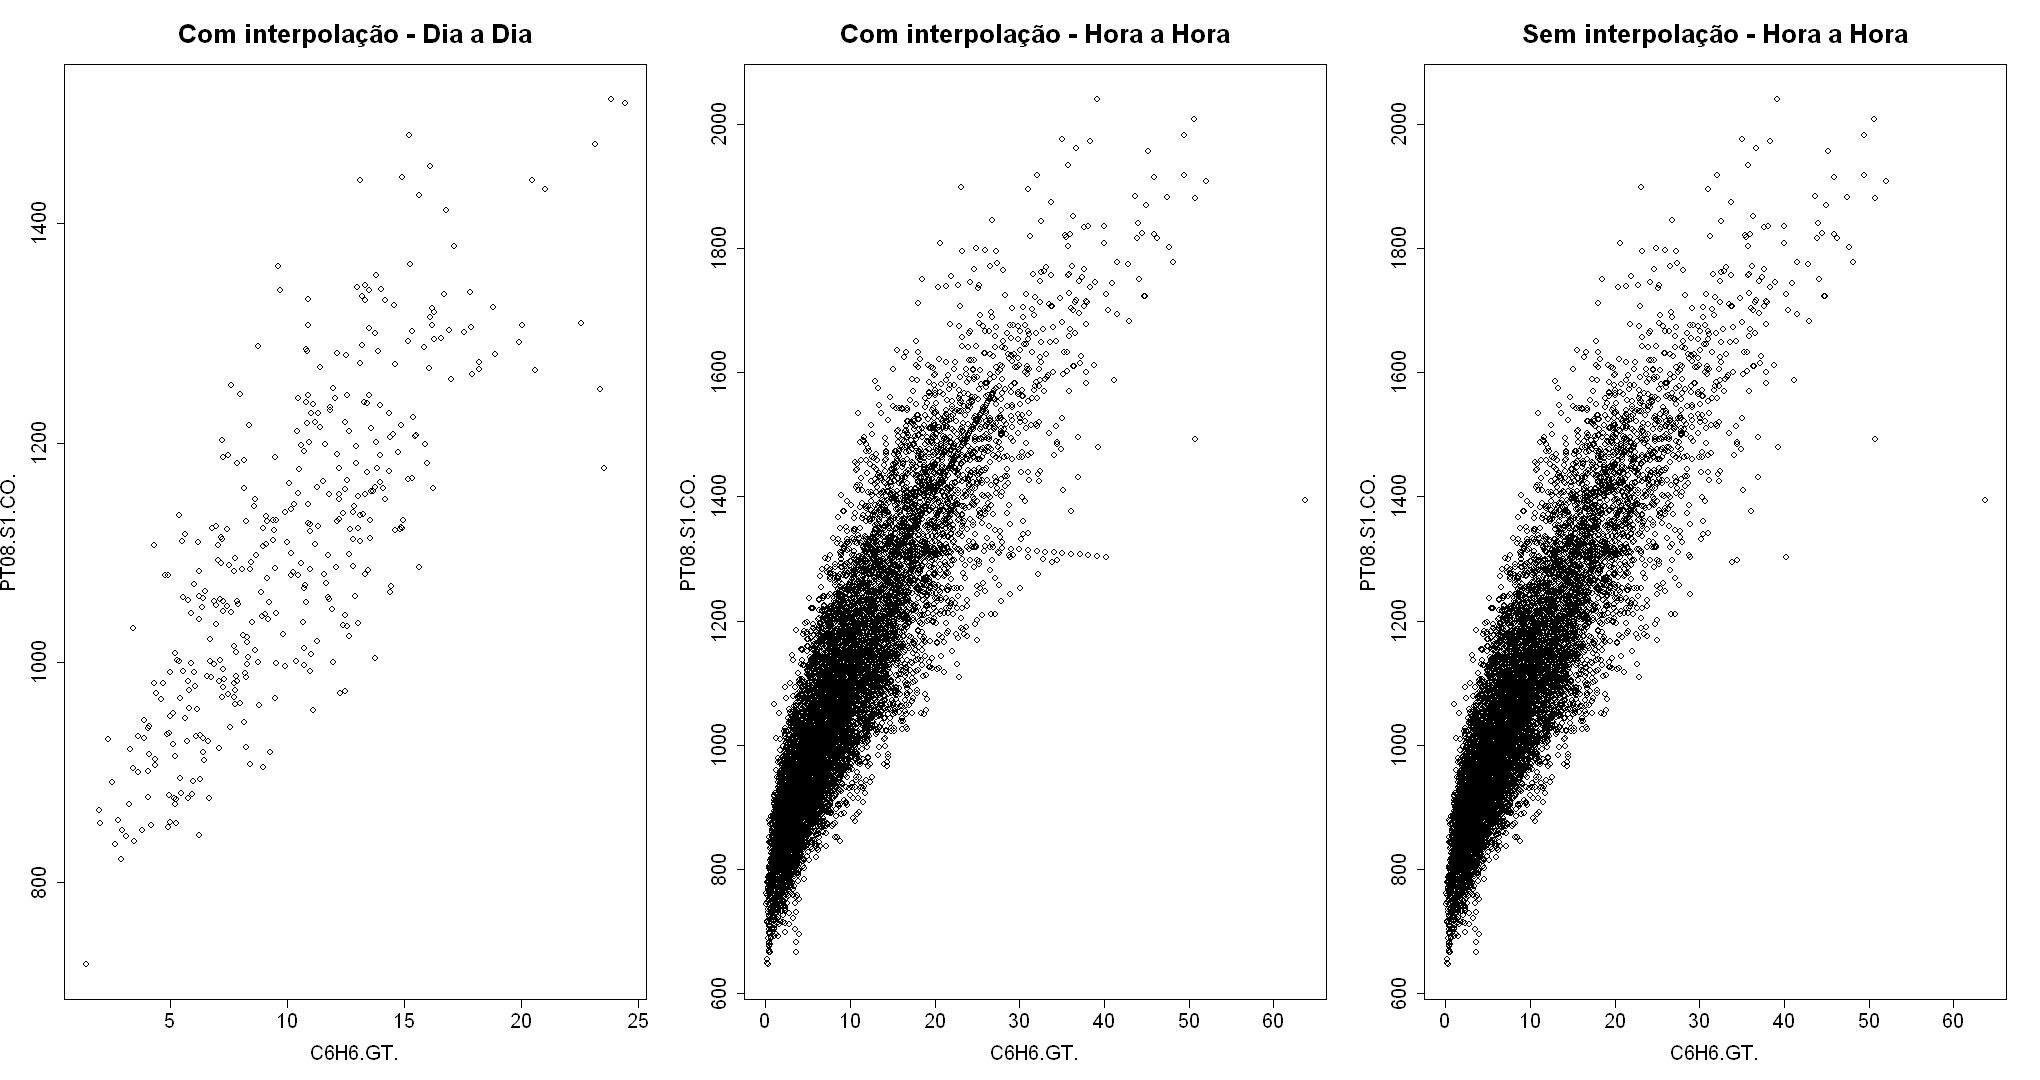

In [16]:
## Gráfico 01: PT08.S1.CO. vs C6H6.GT. - com e sem interpolação

par(mfrow=c(1,3))
plot(DF_STUDY_DIA[,4],DF_STUDY_DIA[,2], main='Com interpolação - Dia a Dia', ylab='PT08.S1.CO.', xlab='C6H6.GT.',cex.lab=1.5, cex.axis=1.5, cex.main=2)
plot(DF_STUDY[,5],DF_STUDY[,3], main='Com interpolação - Hora a Hora', ylab='PT08.S1.CO.', xlab= 'C6H6.GT.',cex.lab=1.5, cex.axis=1.5, cex.main=2)
plot(DF_FINAL[,5], DF_FINAL[,3], main='Sem interpolação - Hora a Hora', ylab='PT08.S1.CO.', xlab= 'C6H6.GT.',cex.lab=1.5, cex.axis=1.5, cex.main=2)


**O que identificamos:**

    i) Correlação positiva de ~0,88 (com a interpolação) apresentou possível tendência linear, mas vimos no gráfico que tal tendência pode estar incorreta.

    ii) Comportamento (tendência conjunta) do tipo polinomial ou logrítmico. Talvez seja necessário aplicar raiz quadrada ou logaritmo;
    
    iii) Alta variabilidade, como visto em modelos de regressão gamma;
    
    iv) Uma linha reta de pontos no fomato "vertical" provocado pela interpolação o que pode ser intendido como eventuais pontos de alavacanca para modelos de regressão, o que por sua vez é um problema, já que foram colocados lá de forma artificial;
    
    v) Duas observações destacadas das demais, possíveis observações atípicas;
    
    vi) Sem muita diferença nos gráficos com e sem interpolação;
    
    vii) O gráfico dia a dia demonstrou uma maior linearização da relação entre as variáveis. Além disso, a informação dia a dia seguiu mesma tendência da informação hora a hora. Semelhante ao que vimos na medida de correlação.


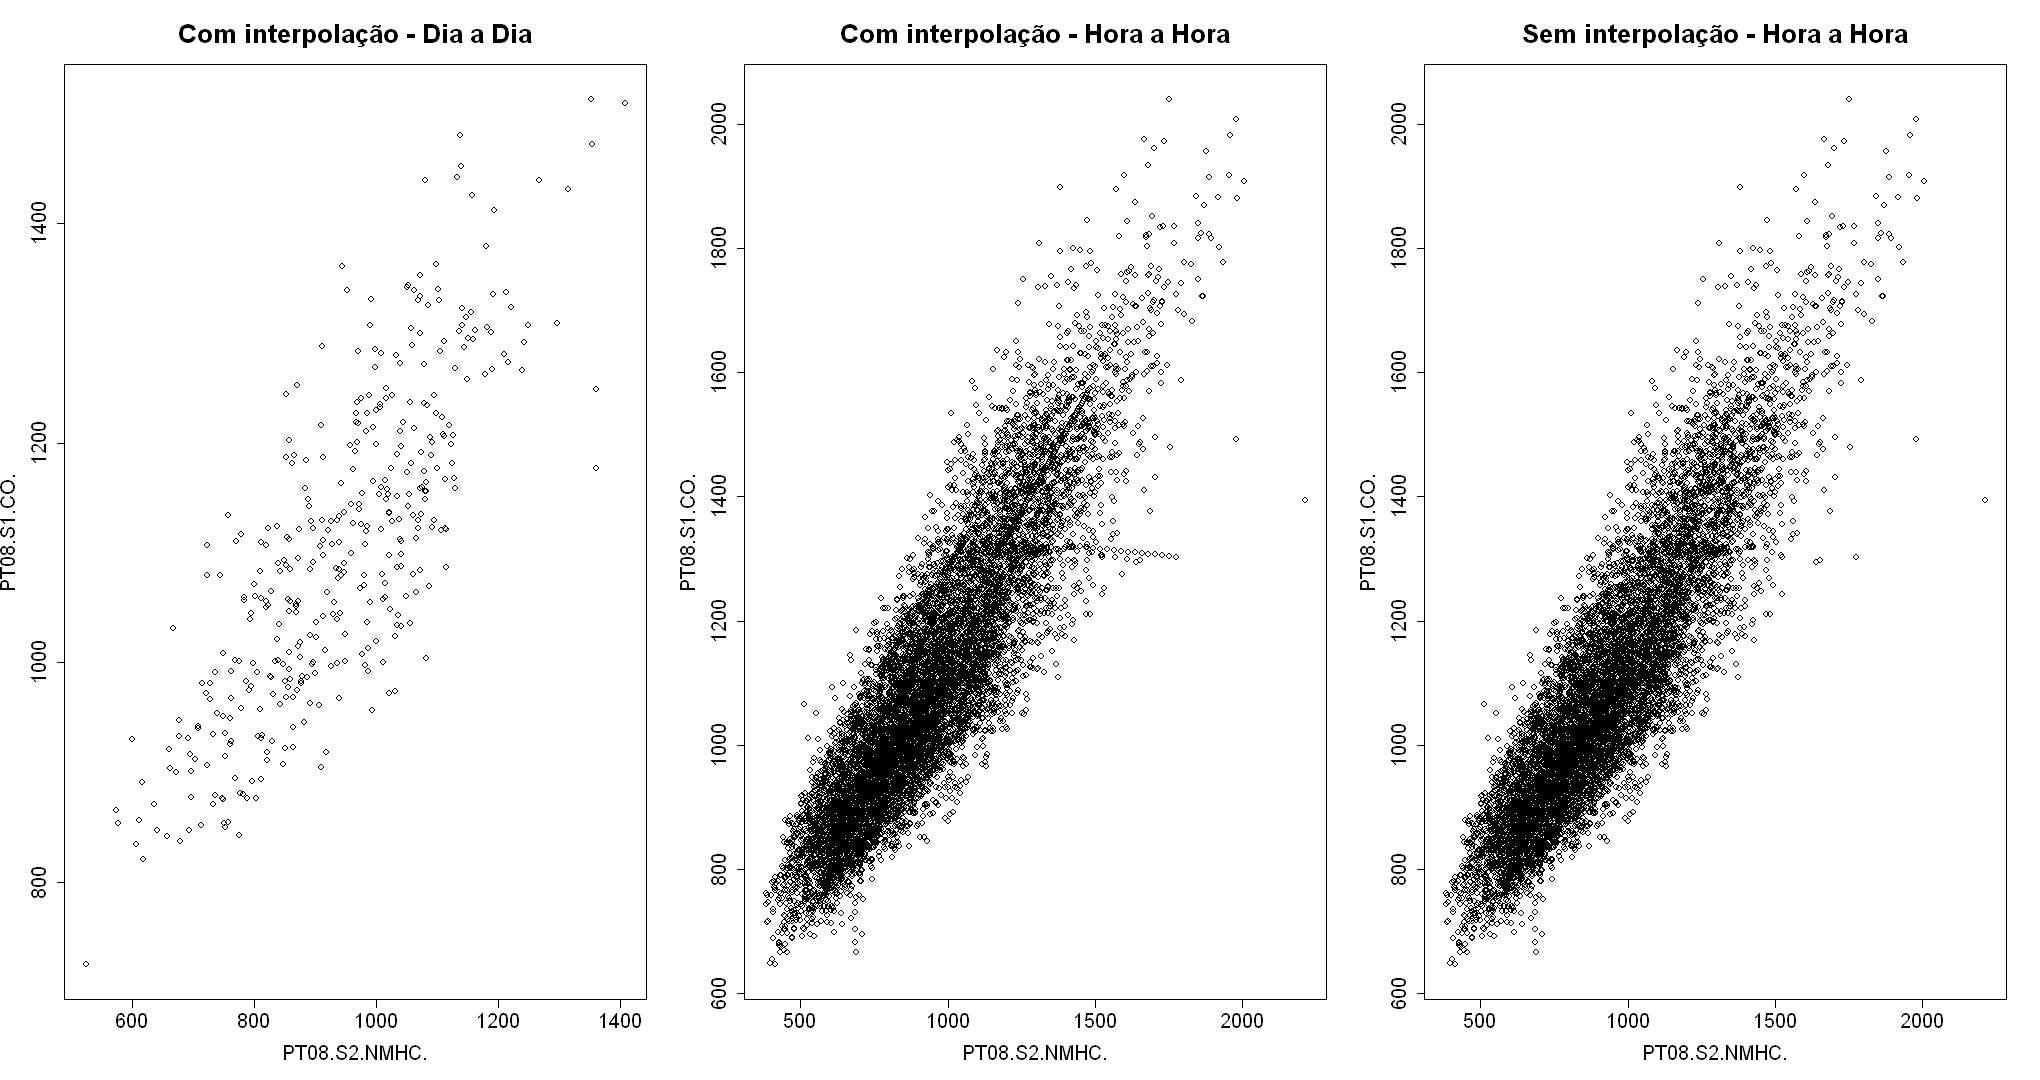

In [17]:
## Gráfico 02: PT08.S1.CO. vs PT08.S2.NMHC. - com e sem interpolação

par(mfrow=c(1,3))
plot(DF_STUDY_DIA[,5],DF_STUDY_DIA[,2], main='Com interpolação - Dia a Dia', ylab='PT08.S1.CO.', xlab='PT08.S2.NMHC.',cex.lab=1.5, cex.axis=1.5, cex.main=2)
plot(DF_STUDY[,6],DF_STUDY[,3], main='Com interpolação - Hora a Hora', ylab='PT08.S1.CO.', xlab='PT08.S2.NMHC.',cex.lab=1.5, cex.axis=1.5, cex.main=2)
plot(DF_FINAL[,6], DF_FINAL[,3], main='Sem interpolação - Hora a Hora', ylab='PT08.S1.CO.', xlab='PT08.S2.NMHC.',cex.lab=1.5, cex.axis=1.5, cex.main=2)


**O que identificamos:** 

    i) Correlação positiva de 0,89 (com a interpolação) captou a tendência linear no conjunto de dados; 

    ii) Comportamento (tendência conjunta) do tipo reta (aparentemente) (talvez uma possivel tendência polinomial de grau 2); 

    iii) Alta variabilidade, como visto em modelos de regressão gamma;

    iv) Uma linha reta de pontos no fomato "vertical" provocado pela interpolação o que pode ser intendido como eventuais pontos de alavacanca para modelos de regressão, o que por sua vez é um problema, já que foram colocados lá de forma artificial;

    v) Duas observações destacadas das demais, possíveis observações atípicas;

    vi) Sem muita diferença nos gráficos com e sem interpolação;

    vii) A informação dia a dia seguiu mesma tendência da informação hora a hora. Semelhante ao que vimos na medida de correlação.


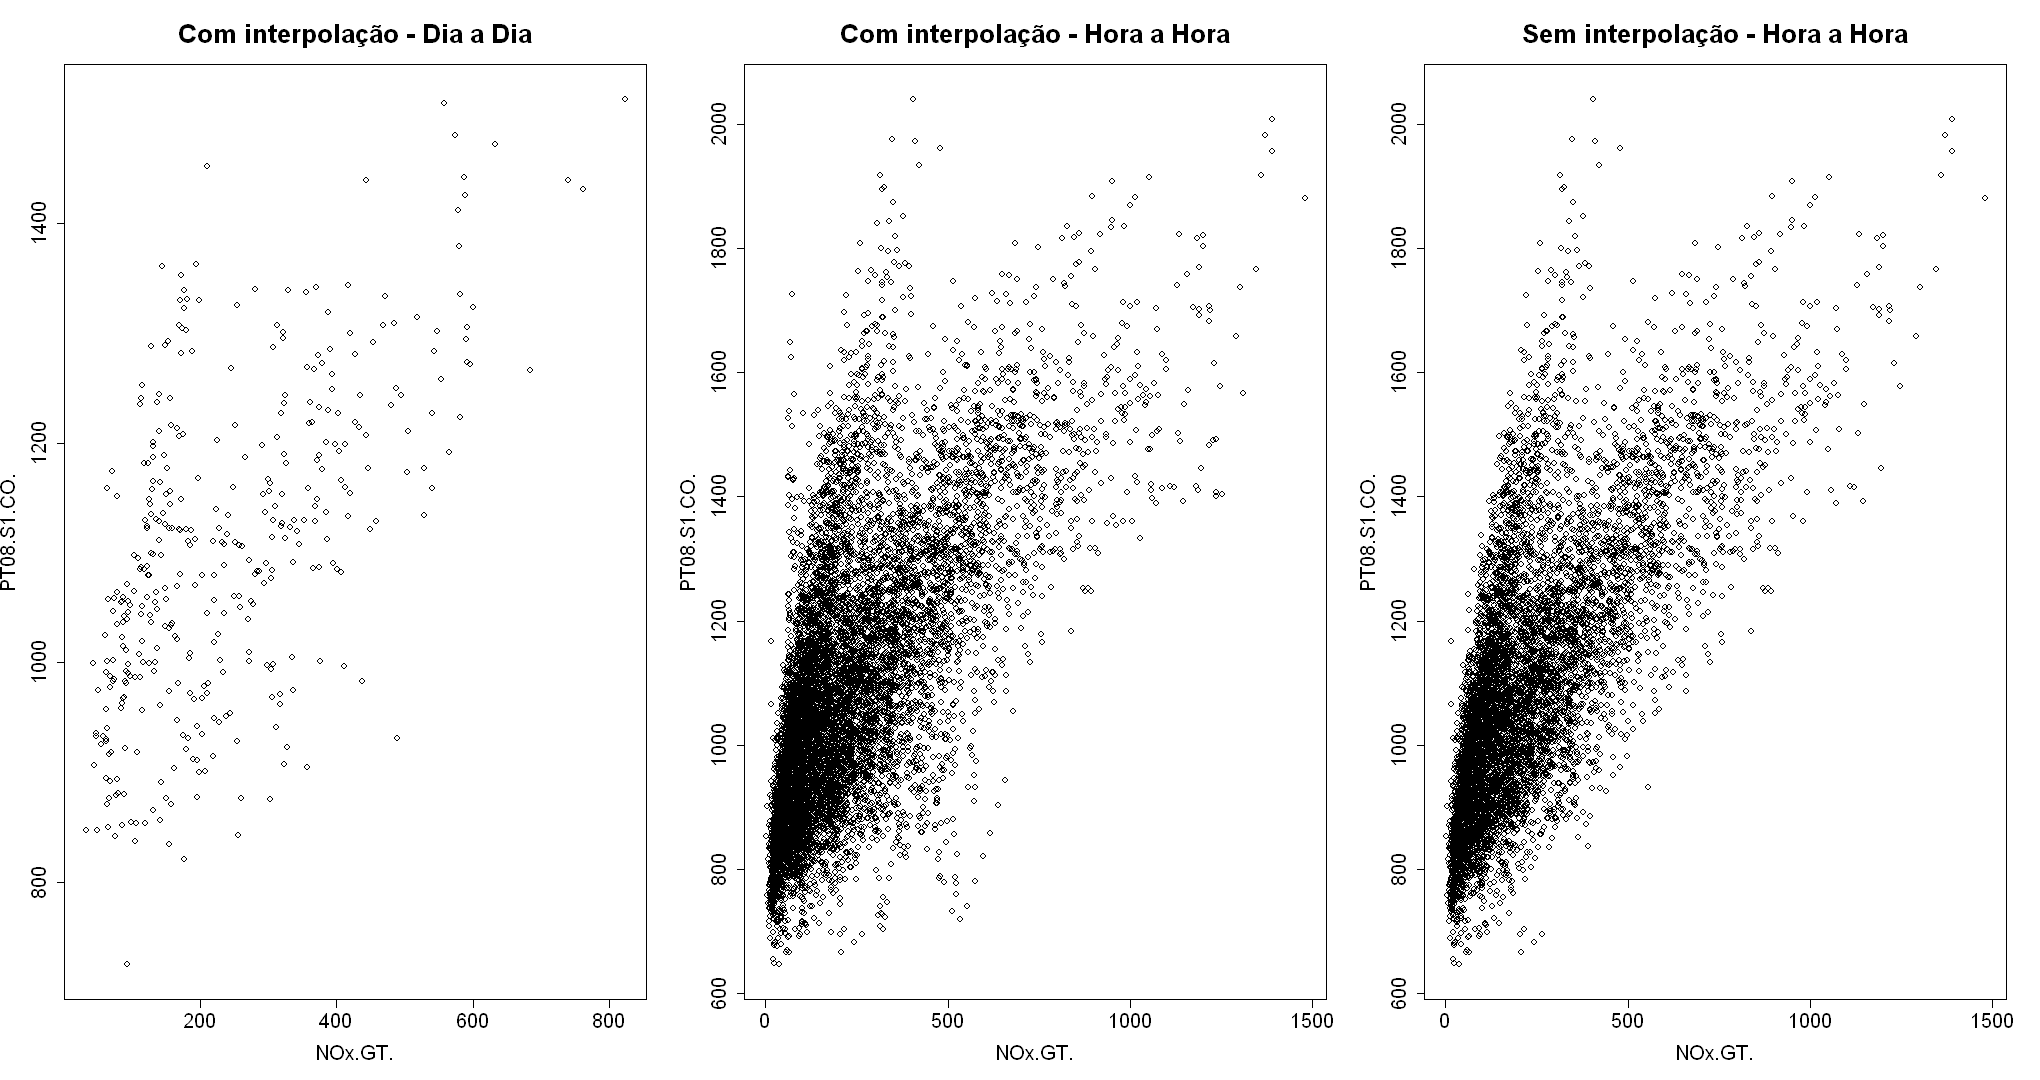

In [18]:
## Gráfico 03: PT08.S1.CO. vs NOx.GT. - com e sem interpolação

par(mfrow=c(1,3))
plot(DF_STUDY_DIA[,6],DF_STUDY_DIA[,2], main='Com interpolação - Dia a Dia', ylab='PT08.S1.CO.', xlab='NOx.GT.',cex.lab=1.5, cex.axis=1.5, cex.main=2)
plot(DF_STUDY[,7],DF_STUDY[,3], main='Com interpolação - Hora a Hora', ylab='PT08.S1.CO.', xlab='NOx.GT.',cex.lab=1.5, cex.axis=1.5, cex.main=2)
plot(DF_FINAL[,7], DF_FINAL[,3], main='Sem interpolação - Hora a Hora', ylab='PT08.S1.CO.', xlab='NOx.GT.',cex.lab=1.5, cex.axis=1.5, cex.main=2)


**O que identificamos:**

    i) Correlação positiva de ~0,67 (com a interpolação) apresntou possível tendência linear, mas ao verificarmos o gráfico, vimos que é uma tendência não tão correta;

    ii) Ausência de covariável do tipo qualitativa que destaque duas possíveis populações, tendo em vista dois grupos distindos que apresentam tendência de reda (ou polinmial), como visto melhor no gráfico sem interpolação; 

    iii) Assumindo que existe 2 grupos ao invés de 1 (que seria melhor descrito pelo apoio de uma variável categórica), vemos que a interpolção acentuou o carater de varibilidade conjunta das variáveis. Tal característica foi possívelmente responsável por tambémm reduzir a medida de correlação, tendo em vista que a existência de 2 grupos também contribuiria para essa redução de  correlação;

    iv) Se estivessemos de posse dos grupos, talvez fosse necessário aplicar raiz quadrada ou logaritmo no grupo com maior quantidade de pontos que podemos ver no gráfico (a reta de cima do gráfico), já que tal grupo apresenta um carater polinomial ou exponencial;

    v) Alta variabilidade, como visto em modelos de regressão gamma. Além de variabilidade artificial provocada pela interpolação;

    vi) Por apresentar alta varibilidade, é difícil identificar pontos destacados.

    vii) Diferença significativa nos gráficos com e sem interpolação.
    
    viii) A informação dia a dia é semelhante com a informação hora a hora.

**Obs:** É possível que esta variáve seja problemática em um eventual modelo de regressão.

**Obs:** Esta variável apresentou ~18% de valores ausentes.


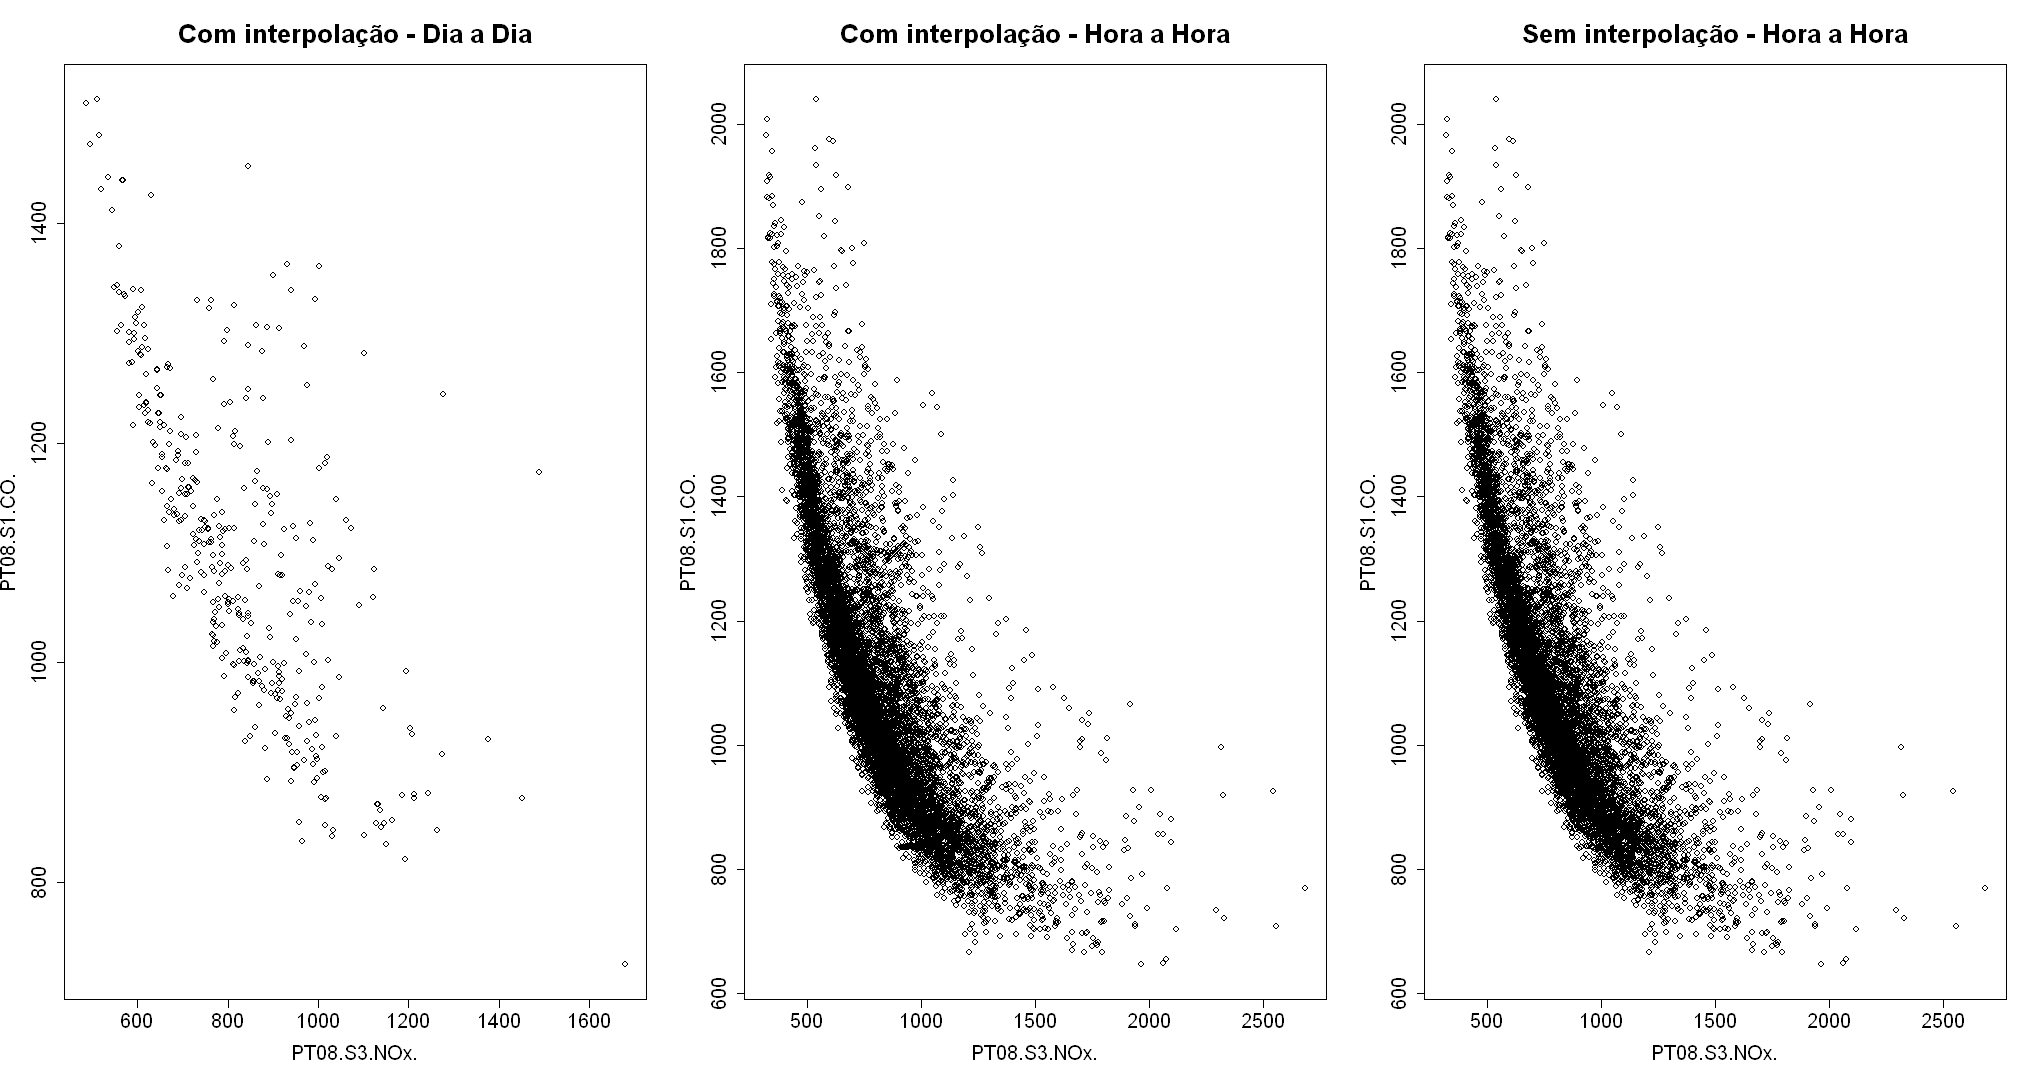

In [19]:
## Gráfico 04: PT08.S1.CO. vs PT08.S3.NOx.. - com e sem interpolação

par(mfrow=c(1,3))
plot(DF_STUDY_DIA[,7],DF_STUDY_DIA[,2], main='Com interpolação - Dia a Dia', ylab='PT08.S1.CO.', xlab='PT08.S3.NOx.',cex.lab=1.5, cex.axis=1.5, cex.main=2)
plot(DF_STUDY[,8],DF_STUDY[,3], main='Com interpolação - Hora a Hora', ylab='PT08.S1.CO.', xlab='PT08.S3.NOx.',cex.lab=1.5, cex.axis=1.5, cex.main=2)
plot(DF_FINAL[,8], DF_FINAL[,3], main='Sem interpolação - Hora a Hora', ylab='PT08.S1.CO.', xlab='PT08.S3.NOx.',cex.lab=1.5, cex.axis=1.5, cex.main=2)


**O que identificamos:**

    i) Correlação negativa de ~(-0,78) (com a interpolação) apresentou tendência linear, mas o gráfico indica tendência não linear; 

    ii) Comportamento (tendência conjunta) do tipo polinomial ou exponencial; 

    iii) Alta variabilidade, como visto em modelos de regressão gamma;

    iv) 7 observações destacadas das demais, possíveis observações atípicas;

    v) Sem muita diferença nos gráficos com e sem interpolação.
    
    vi) A informação dia a dia é semelhante a hora a hora. Além disso, é possível notar que existe uma tendência de outliers que pode está sendo provocada por uma seguda variável (do tipo categorica) ou possivelmente são informações advindas da estrutura de série temporal

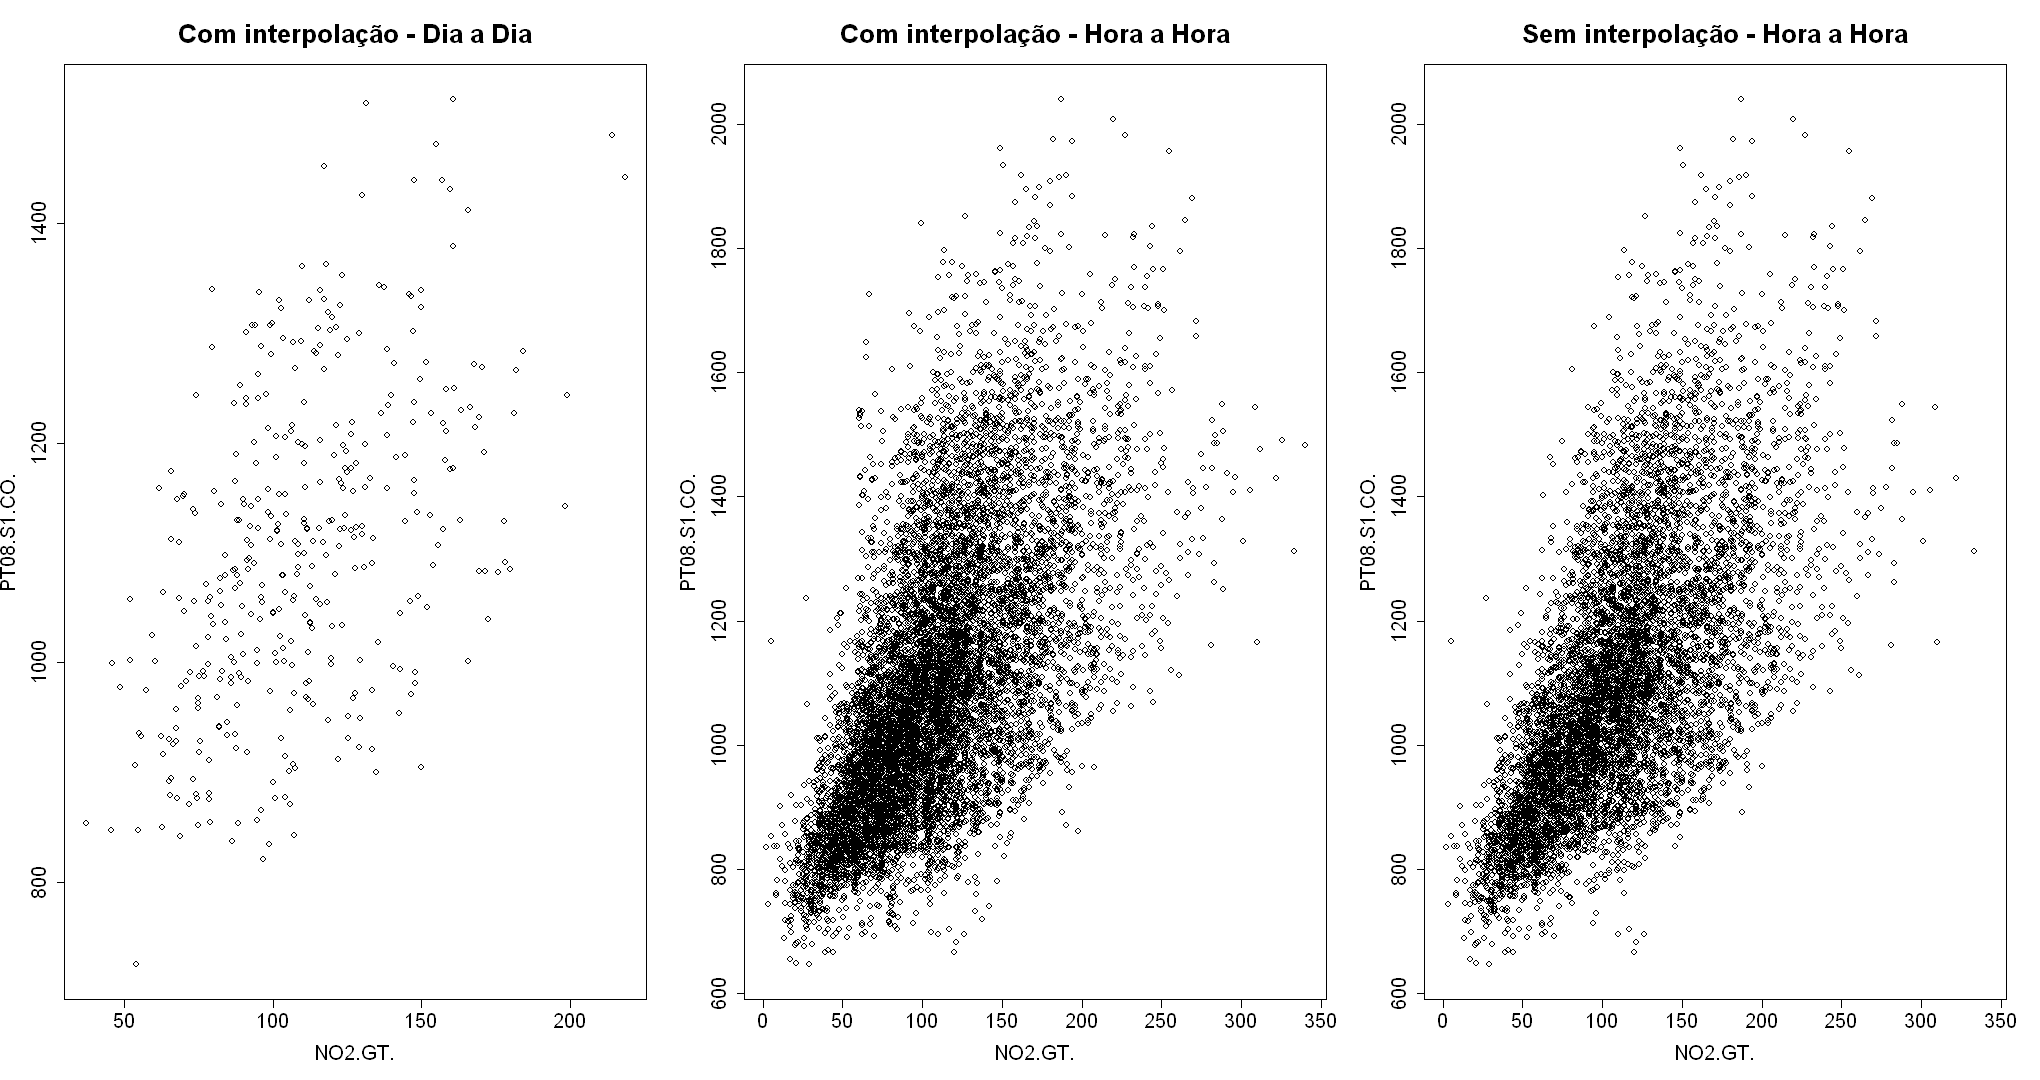

In [20]:
## Gráfico 05: PT08.S1.CO. vs NO2.GT. - com e sem interpolação

par(mfrow=c(1,3))
plot(DF_STUDY_DIA[,8],DF_STUDY_DIA[,2], main='Com interpolação - Dia a Dia', ylab='PT08.S1.CO.', xlab='NO2.GT.',cex.lab=1.5, cex.axis=1.5, cex.main=2)
plot(DF_STUDY[,9],DF_STUDY[,3], main='Com interpolação - Hora a Hora', ylab='PT08.S1.CO.', xlab='NO2.GT.',cex.lab=1.5, cex.axis=1.5, cex.main=2)
plot(DF_FINAL[,9], DF_FINAL[,3], main='Sem interpolação - Hora a Hora',ylab='PT08.S1.CO.', xlab='NO2.GT.',cex.lab=1.5, cex.axis=1.5, cex.main=2)


**O que identificamos:**

    i) Correlação positiva de ~0,62 (com a interpolação) que captou (possivelmente) a tendência linear no conjunto de dados; 

    ii) Existência de alta variabilidade, mas pode ser possível encontrarmos uma possível tendência polinomial ou exponencial; 

    iii) Alta variabilidade, como visto em modelos de regressão gamma. Além de variabilidade artificial provocada pela interpolação;

    iv) Por apresentar alta varibilidade, é difícil identificar pontos destacados;

    v) Diferença significativa nos gráficos com e sem interpolação;
    
    vi) A informação dia a dia linearizou melhor a relação entre as variáveis. Temos semelhança ao formato hora a hora, mas vemos uma alta variabilidade no formato dia a dia que pode atrabalhar em eventuais modelos de regressão.

**Obs:** É possível que esta variáve seja problemática em um eventual modelo de regressão.

**Obs:** Esta variável apresentou ~18% de valores ausentes.

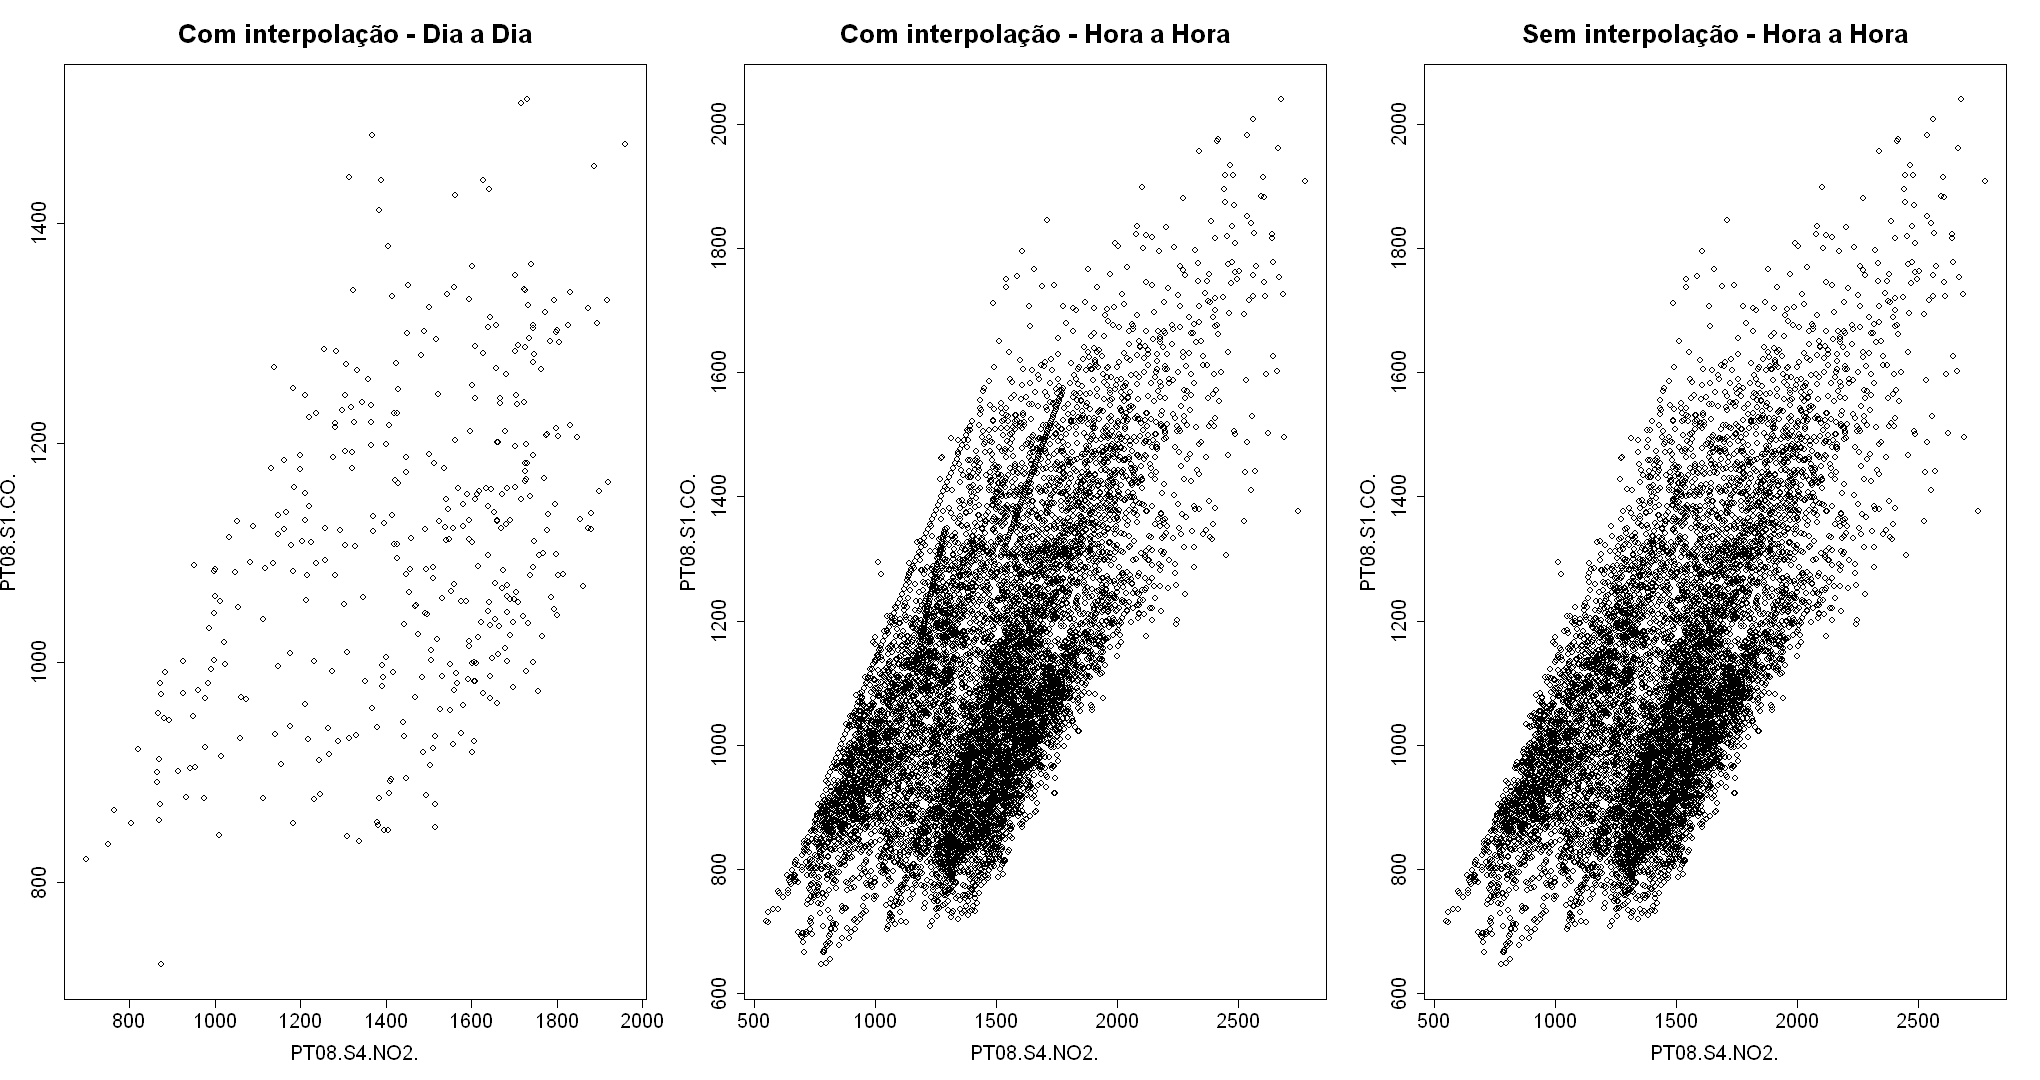

In [21]:
## Gráfico 06: PT08.S1.CO. vs PT08.S4.NO2. - com e sem interpolação

par(mfrow=c(1,3))
plot(DF_STUDY_DIA[,9],DF_STUDY_DIA[,2], main='Com interpolação - Dia a Dia', ylab='PT08.S1.CO.', xlab='PT08.S4.NO2.',cex.lab=1.5, cex.axis=1.5, cex.main=2)
plot(DF_STUDY[,10],DF_STUDY[,3], main='Com interpolação - Hora a Hora', ylab='PT08.S1.CO.', xlab='PT08.S4.NO2.',cex.lab=1.5, cex.axis=1.5, cex.main=2)
plot(DF_FINAL[,10], DF_FINAL[,3], main='Sem interpolação - Hora a Hora', ylab='PT08.S1.CO.', xlab='PT08.S4.NO2.',cex.lab=1.5, cex.axis=1.5, cex.main=2)

**O que identificamos:**

    i) Correlação positiva de ~0,67 (com a interpolação) que tentou captar a tendência no conjunto de dados; 

    ii) Posível existência de dois grupos distindos que segmentam estas variáveis, tendo em vista que embora haja alta variabilidade, o gráfico aparenta termos duas retas com altavariabilidade com certa proximidade, o que gera uma imagem de uma única reta com variabilidade maior;

    iii) A interpolação demonstrou captar parte da tendência das retas observadas e não afetou significativamente o gráfico, como visto na imagem sem interpolação;
    
    iv) A informação dia a dia também forneceu indicativos de 2 grupos e demonstrou tendência parecida com a informação hora a hora.
    
**obs:** É possível que esta variáve seja problemática em um eventual modelo de regressão.


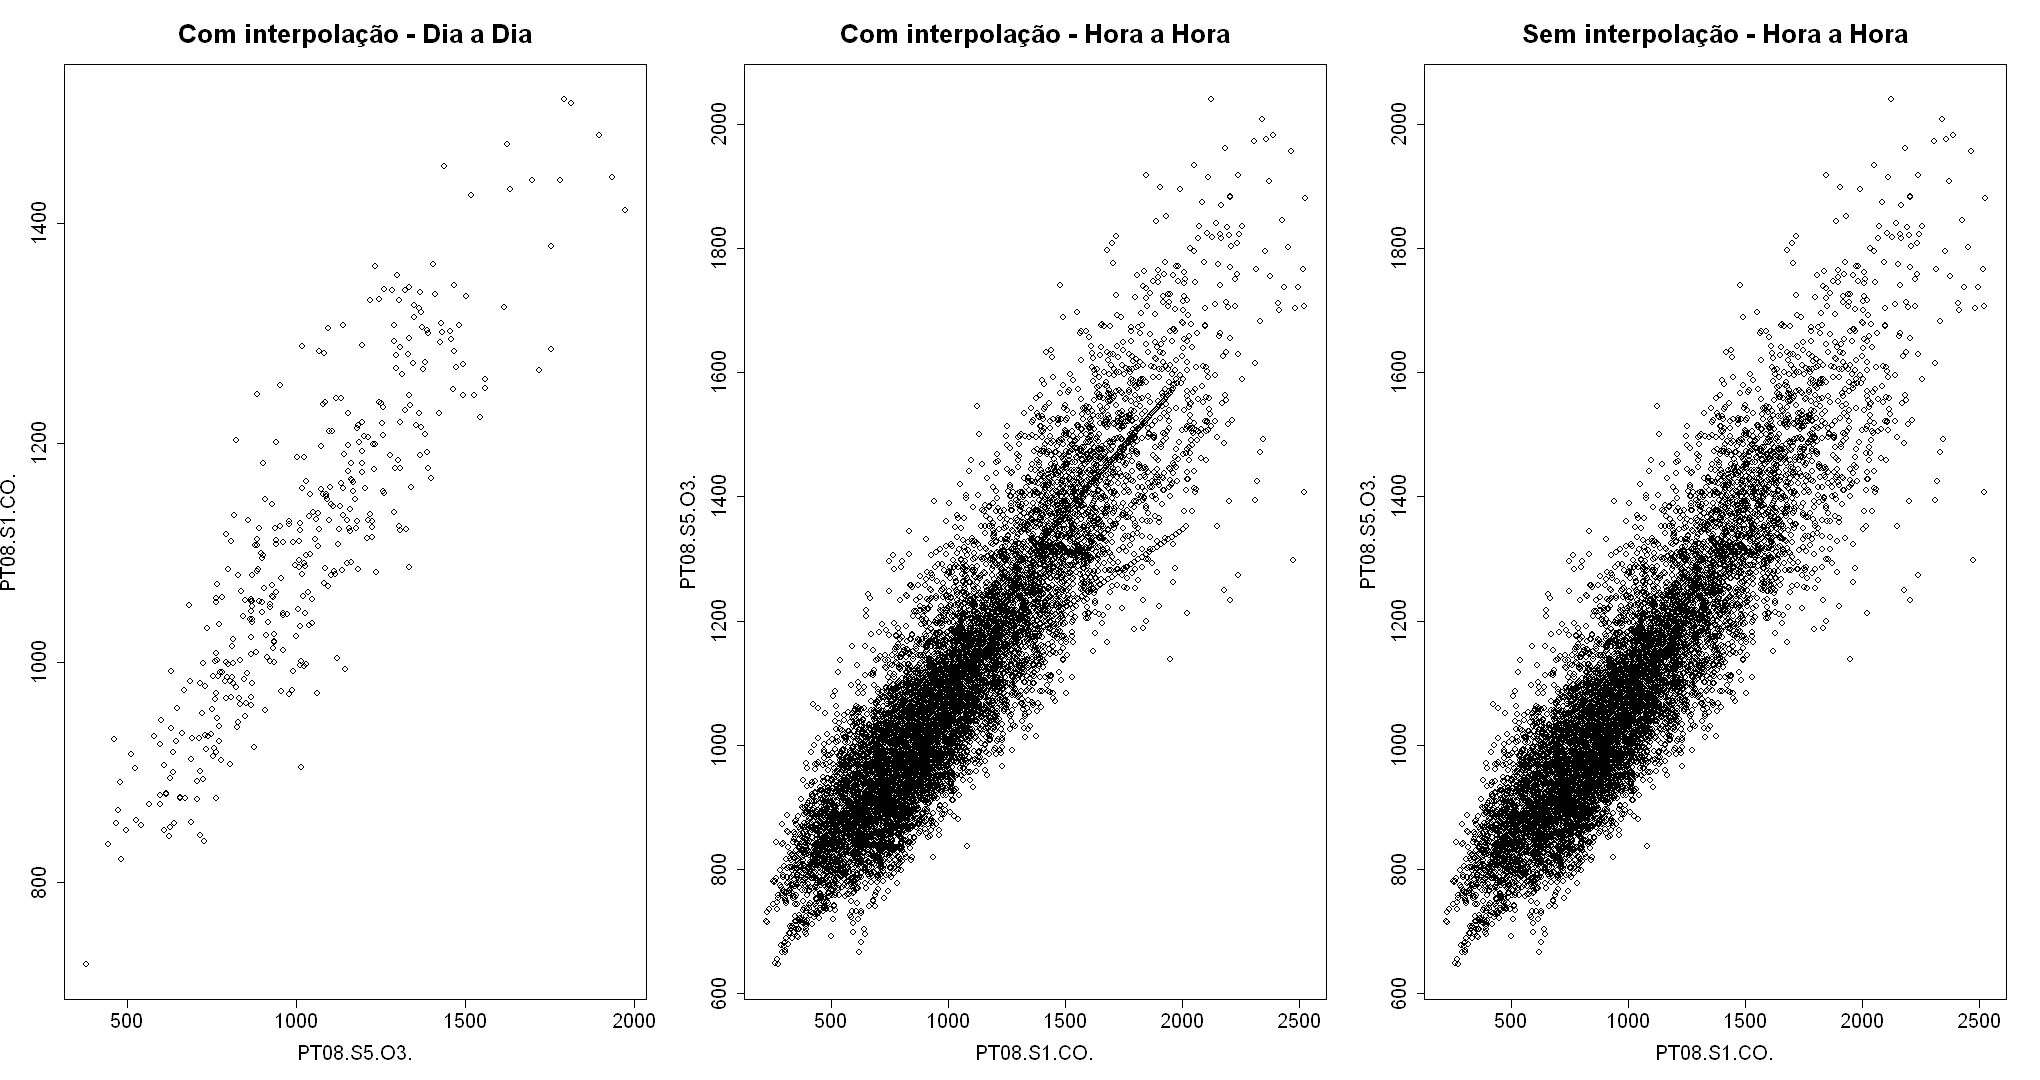

In [22]:
## Gráfico 07: PT08.S1.CO. vs PT08.S5.O3. - com e sem interpolação

par(mfrow=c(1,3))
plot(DF_STUDY_DIA[,10],DF_STUDY_DIA[,2], main='Com interpolação - Dia a Dia', ylab='PT08.S1.CO.', xlab='PT08.S5.O3.',cex.lab=1.5, cex.axis=1.5, cex.main=2)
plot(DF_STUDY[,11],DF_STUDY[,3], main='Com interpolação - Hora a Hora', xlab='PT08.S1.CO.', ylab='PT08.S5.O3.',cex.lab=1.5, cex.axis=1.5, cex.main=2)
plot(DF_FINAL[,11], DF_FINAL[,3], main='Sem interpolação - Hora a Hora', xlab='PT08.S1.CO.', ylab='PT08.S5.O3.',cex.lab=1.5, cex.axis=1.5, cex.main=2)


**O que identificamos:**

    i) Correlação positiva de ~0,90 (com a interpolação) que captou a tendência linear no conjunto de dados; 

    ii) A interpolção não parece ter provacado diferença acentuada entre os gráficos, embora seja possível observar duas retas de pontos dentro da núvem que atribuímos aos valores interpolados, o que pode aumentar a variabilidade;

    iii) Padrão de reda convencional, mas com leve tendência logarítmica;

    iv) O iníncio do gráfico demonstra conjuntos de pontos que podem indicar a existência de dois grupos e tais grupos apresentem altavarabilidade e tendência de reta. Como os dados estão bem próximos, os grupos podem estar misturados e com isso podemos não percebê-los;
    
    v) A informação dia a dia seguiu o mesmo padrão da informação hora a hora.




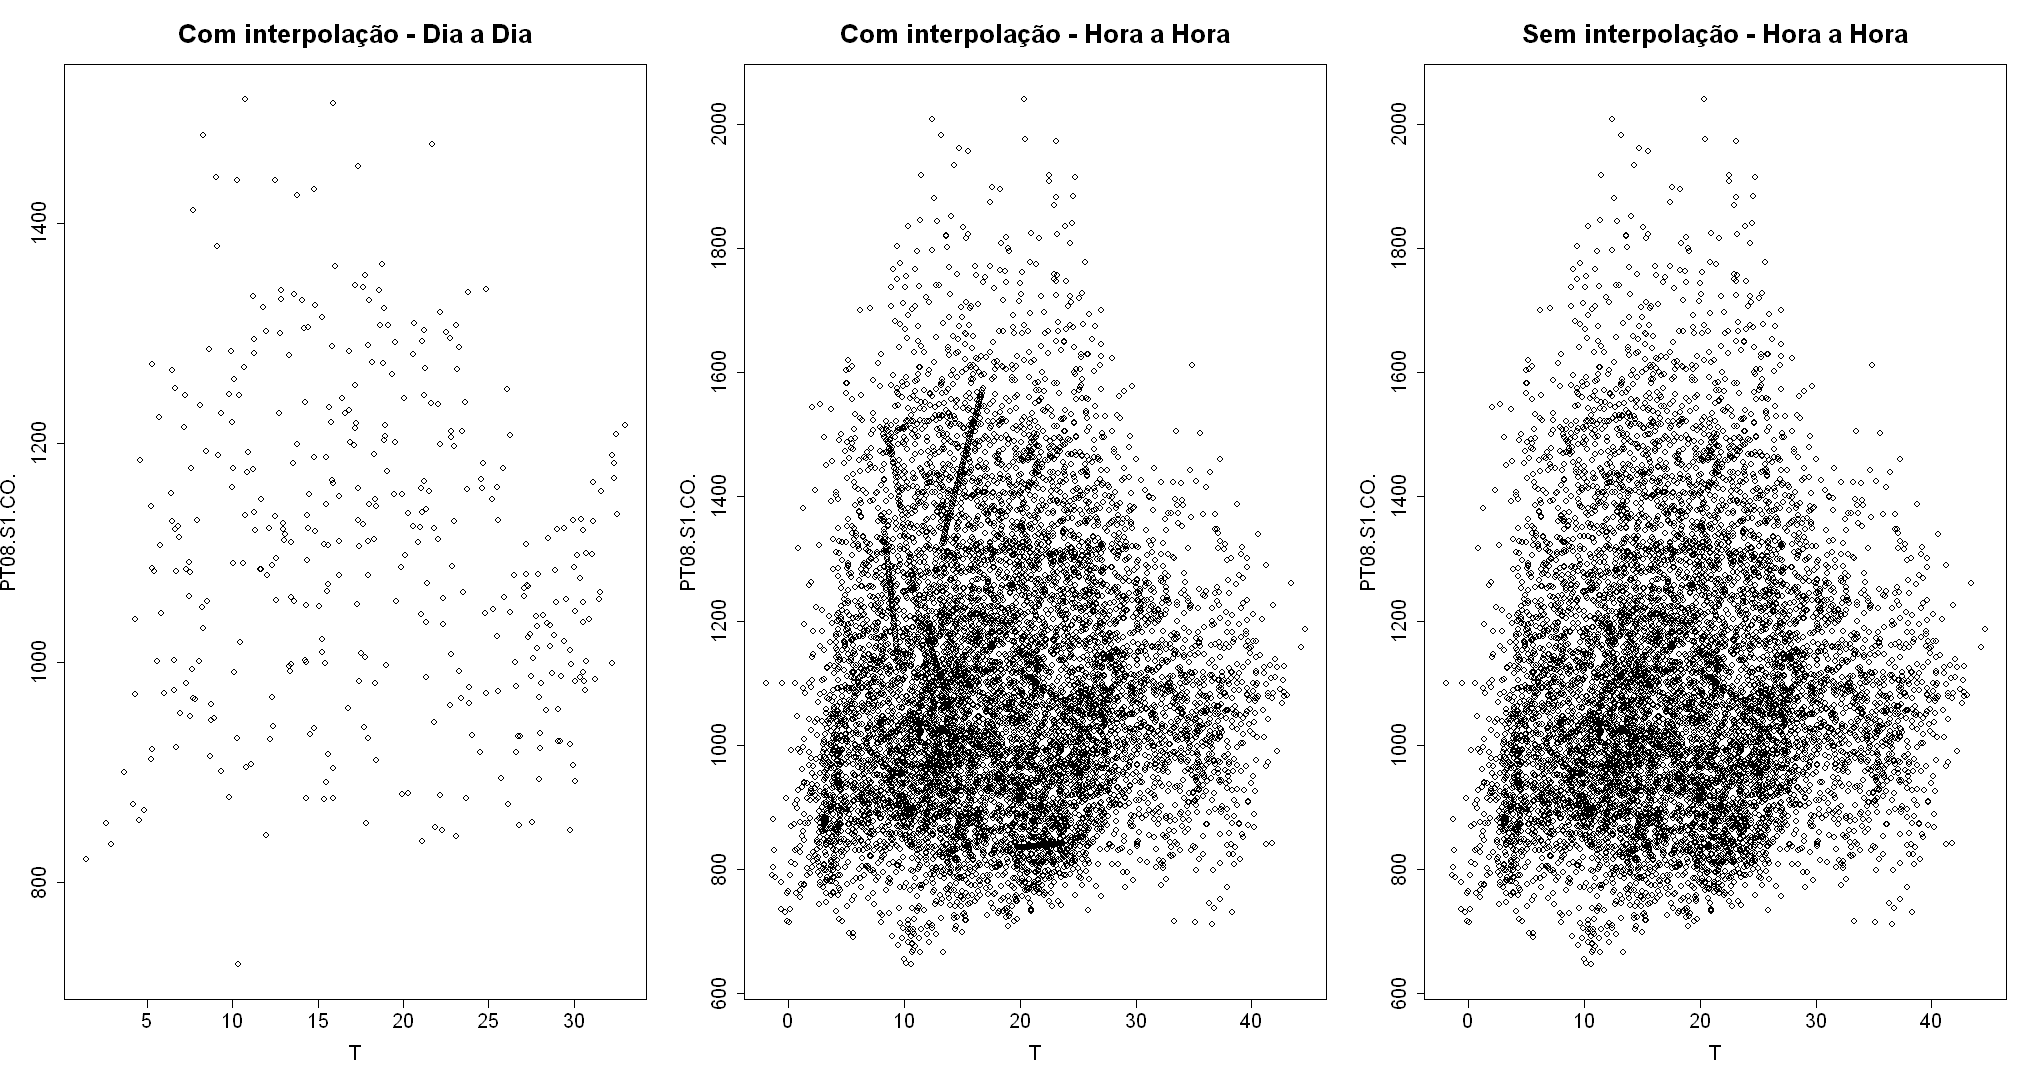

In [23]:
## Gráfico 08: PT08.S1.CO. vs T - com e sem interpolação

par(mfrow=c(1,3))
plot(DF_STUDY_DIA[,11],DF_STUDY_DIA[,2], main='Com interpolação - Dia a Dia', ylab='PT08.S1.CO.', xlab='T',cex.lab=1.5, cex.axis=1.5, cex.main=2)
plot(DF_STUDY[,12],DF_STUDY[,3], main='Com interpolação - Hora a Hora', ylab='PT08.S1.CO.', xlab='T',cex.lab=1.5, cex.axis=1.5, cex.main=2)
plot(DF_FINAL[,12], DF_FINAL[,3], main='Sem interpolação - Hora a Hora',ylab='PT08.S1.CO.', xlab='T',cex.lab=1.5, cex.axis=1.5, cex.main=2)


**O que identificamos:**

    i) Correlação positiva de ~0,03 (com a interpolação) que indicou falta de tendência linear nos dados; 

    ii) Gráficos com formato de núvens que indicam 3 grupos e observações atípicas ixoladas;

    iii) Possível independência entre as variáveis, a menos pela relação de clusterização;

    iv) A interpolação não influenciou de forma significativa o padrão dos gráficos, mas é possível identificar 3 retas de pontos provocadas pela mesma.
    
    v) A informação dia a dia seguiu o mesmo padrão da informação hora a hora.


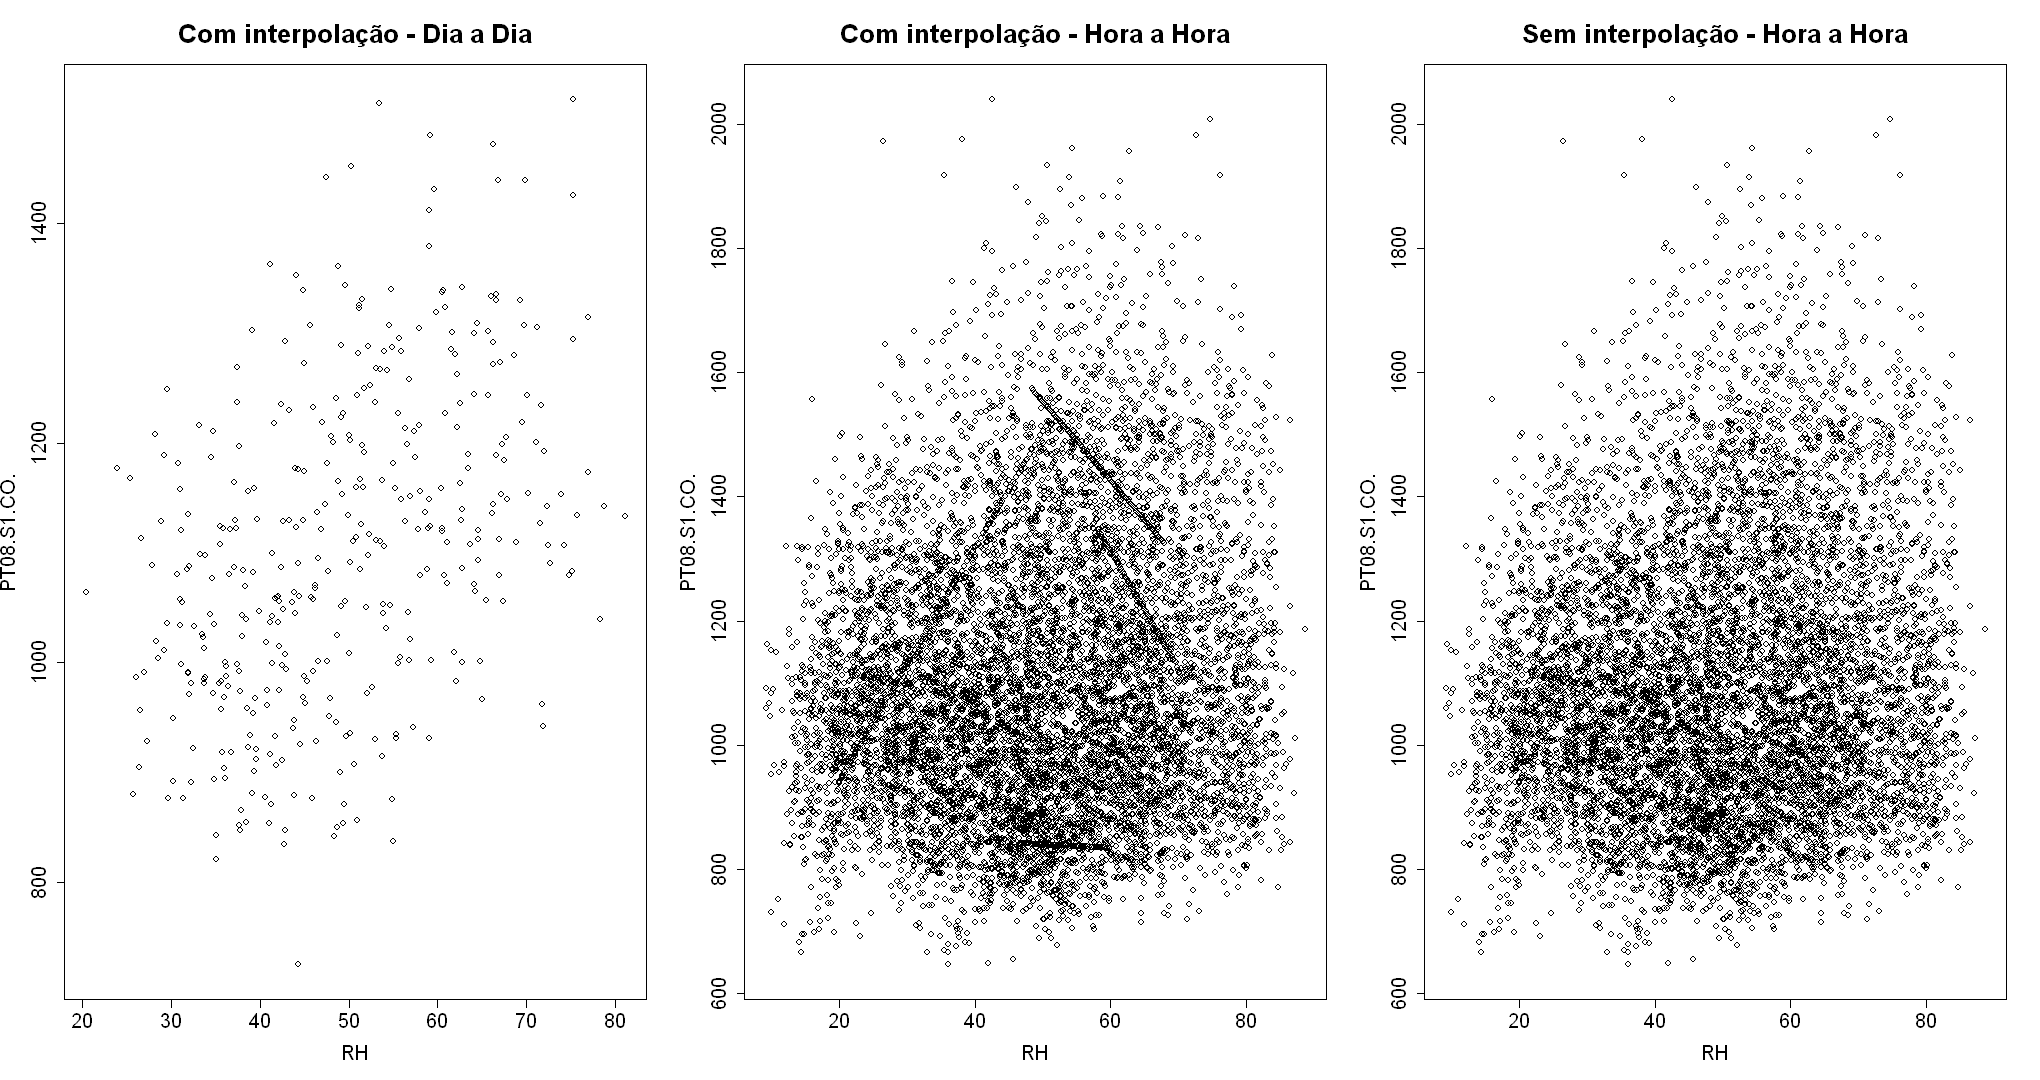

In [24]:
## Gráfico 09: PT08.S1.CO. vs RH - com e sem interpolação

par(mfrow=c(1,3))
plot(DF_STUDY_DIA[,12],DF_STUDY_DIA[,2], main='Com interpolação - Dia a Dia', ylab='PT08.S1.CO.', xlab='RH',cex.lab=1.5, cex.axis=1.5, cex.main=2)
plot(DF_STUDY[,13],DF_STUDY[,3], main='Com interpolação - Hora a Hora', ylab='PT08.S1.CO.', xlab='RH',cex.lab=1.5, cex.axis=1.5, cex.main=2)
plot(DF_FINAL[,13], DF_FINAL[,3], main='Sem interpolação - Hora a Hora',ylab='PT08.S1.CO.', xlab='RH',cex.lab=1.5, cex.axis=1.5, cex.main=2)


**O que identificamos:**

    i) Correlação positiva de ~0,11 (com a interpolação) que indicou falta de tendência linear; 

    ii) Gráficos com formato de núvens que indicam 1 grande grupo e observações atípicas ixoladas;

    iii) Possível independência entre as variáveis, a menos pela relação de clusterização;

    iv) A interpolação não influenciou de forma significativa o padrão dos gráficos, mas é possível identificar 4 retas de pontos provocadas pela mesma.
    
    v) A informação dia a dia seguiu o mesmo padrão da informação hora a hora.

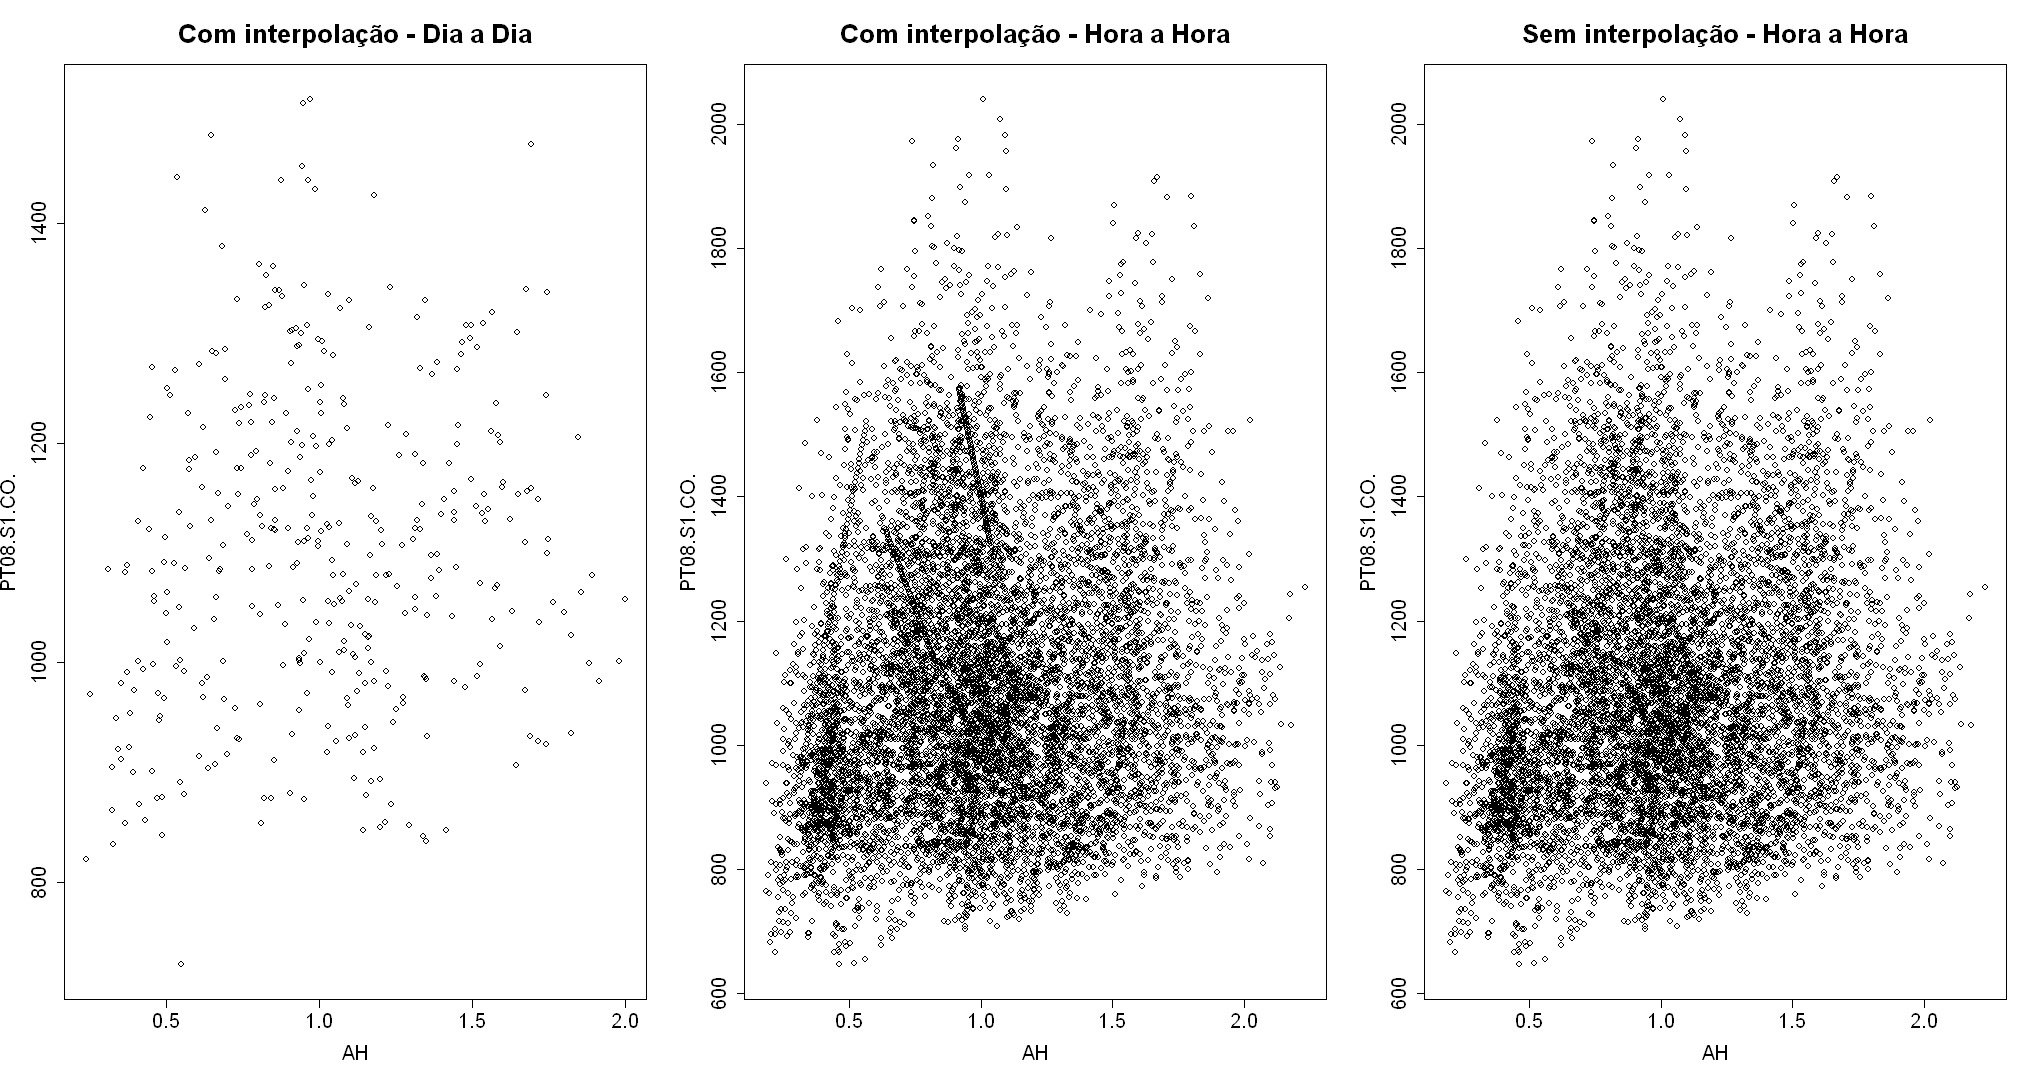

In [25]:
## Gráfico 10: PT08.S1.CO. vs 'C6H6.GT. - com e sem interpolação

par(mfrow=c(1,3))
plot(DF_STUDY_DIA[,13],DF_STUDY_DIA[,2], main='Com interpolação - Dia a Dia', ylab='PT08.S1.CO.', xlab='AH',cex.lab=1.5, cex.axis=1.5, cex.main=2)
plot(DF_STUDY[,14],DF_STUDY[,3], main='Com interpolação - Hora a Hora', ylab='PT08.S1.CO.', xlab='AH',cex.lab=1.5, cex.axis=1.5, cex.main=2)
plot(DF_FINAL[,14], DF_FINAL[,3], main='Sem interpolação - Hora a Hora',ylab='PT08.S1.CO.', xlab='AH',cex.lab=1.5, cex.axis=1.5, cex.main=2)


**O que identificamos:**

    i) Correlação positiva de ~0,11 (com a interpolação) que indicou falta de tendência linear; 

    ii) Gráficos com formato de núvens que indicam 1 grande grupo e observações atípicas ixoladas;

    iii) Possível independência entre as variáveis, a menos pela relação de clusterização;

    iv) A interpolação não influenciou de forma significativa o padrão dos gráficos, mas 

    v) é possível identificar 3 retas de pontos provocadas pela mesma.
    
    vi) A informação agregada dia a dia (dados interpolados) parece ter seguido o padrão da informação hora a hora. Talvez esse seja um motivo pelo qual a correlação é semelhante. 


## Seção 11 - Gráficos de série temporal das variáveis (informação hora a hora)

A seguir, veremos o comportamento gráfico das variáveis no formato de série temporal. Vale comentar que será possível ver os valores interpolados, dado que nos espaços faltantes será possível identificar uma reta.

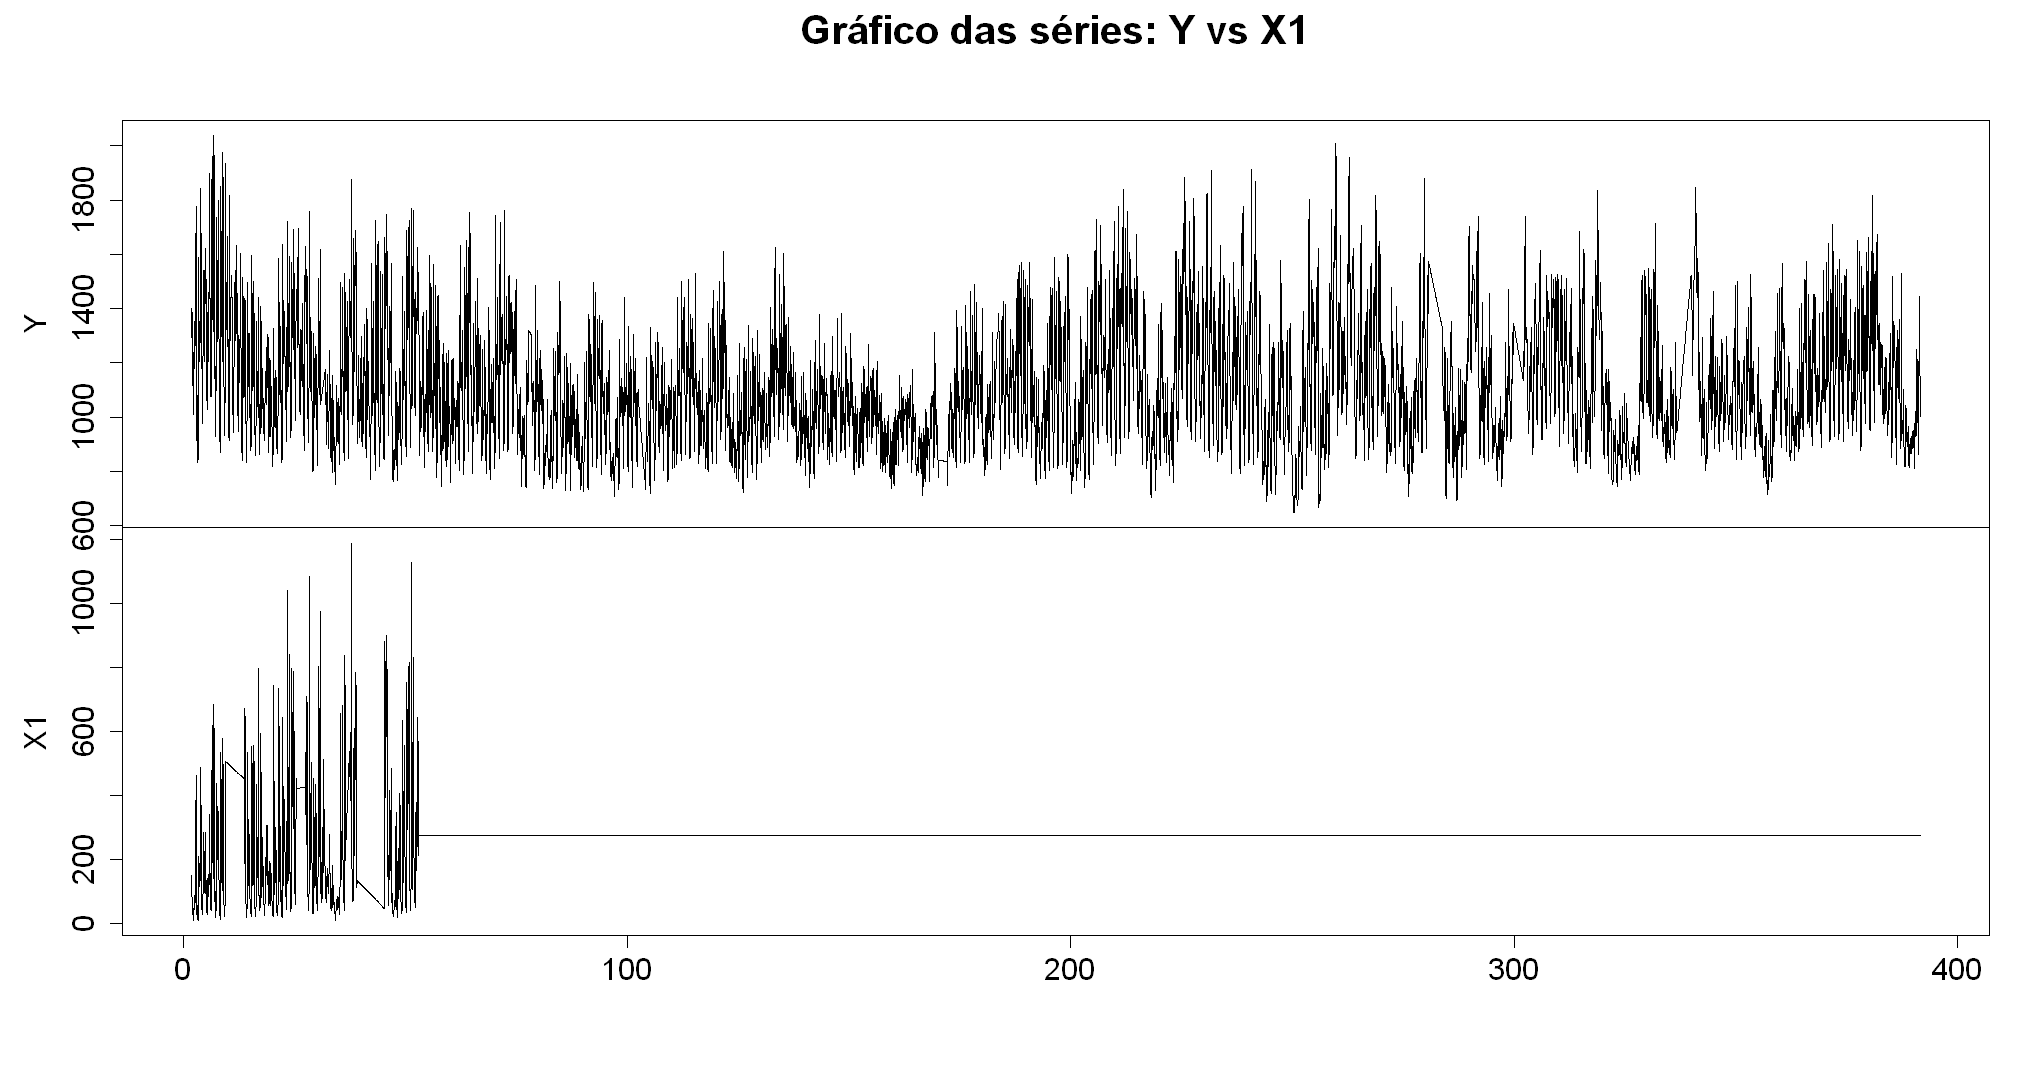

In [26]:
TS_X1 = ts(DF_STUDY_HORA[,c(2,3)],start=c(1,19), frequency=24)
plot(TS_X1, cex.lab=1.5, cex.axis=1.5, cex.main=2, main='Gráfico das séries: Y vs X1', xlab='')


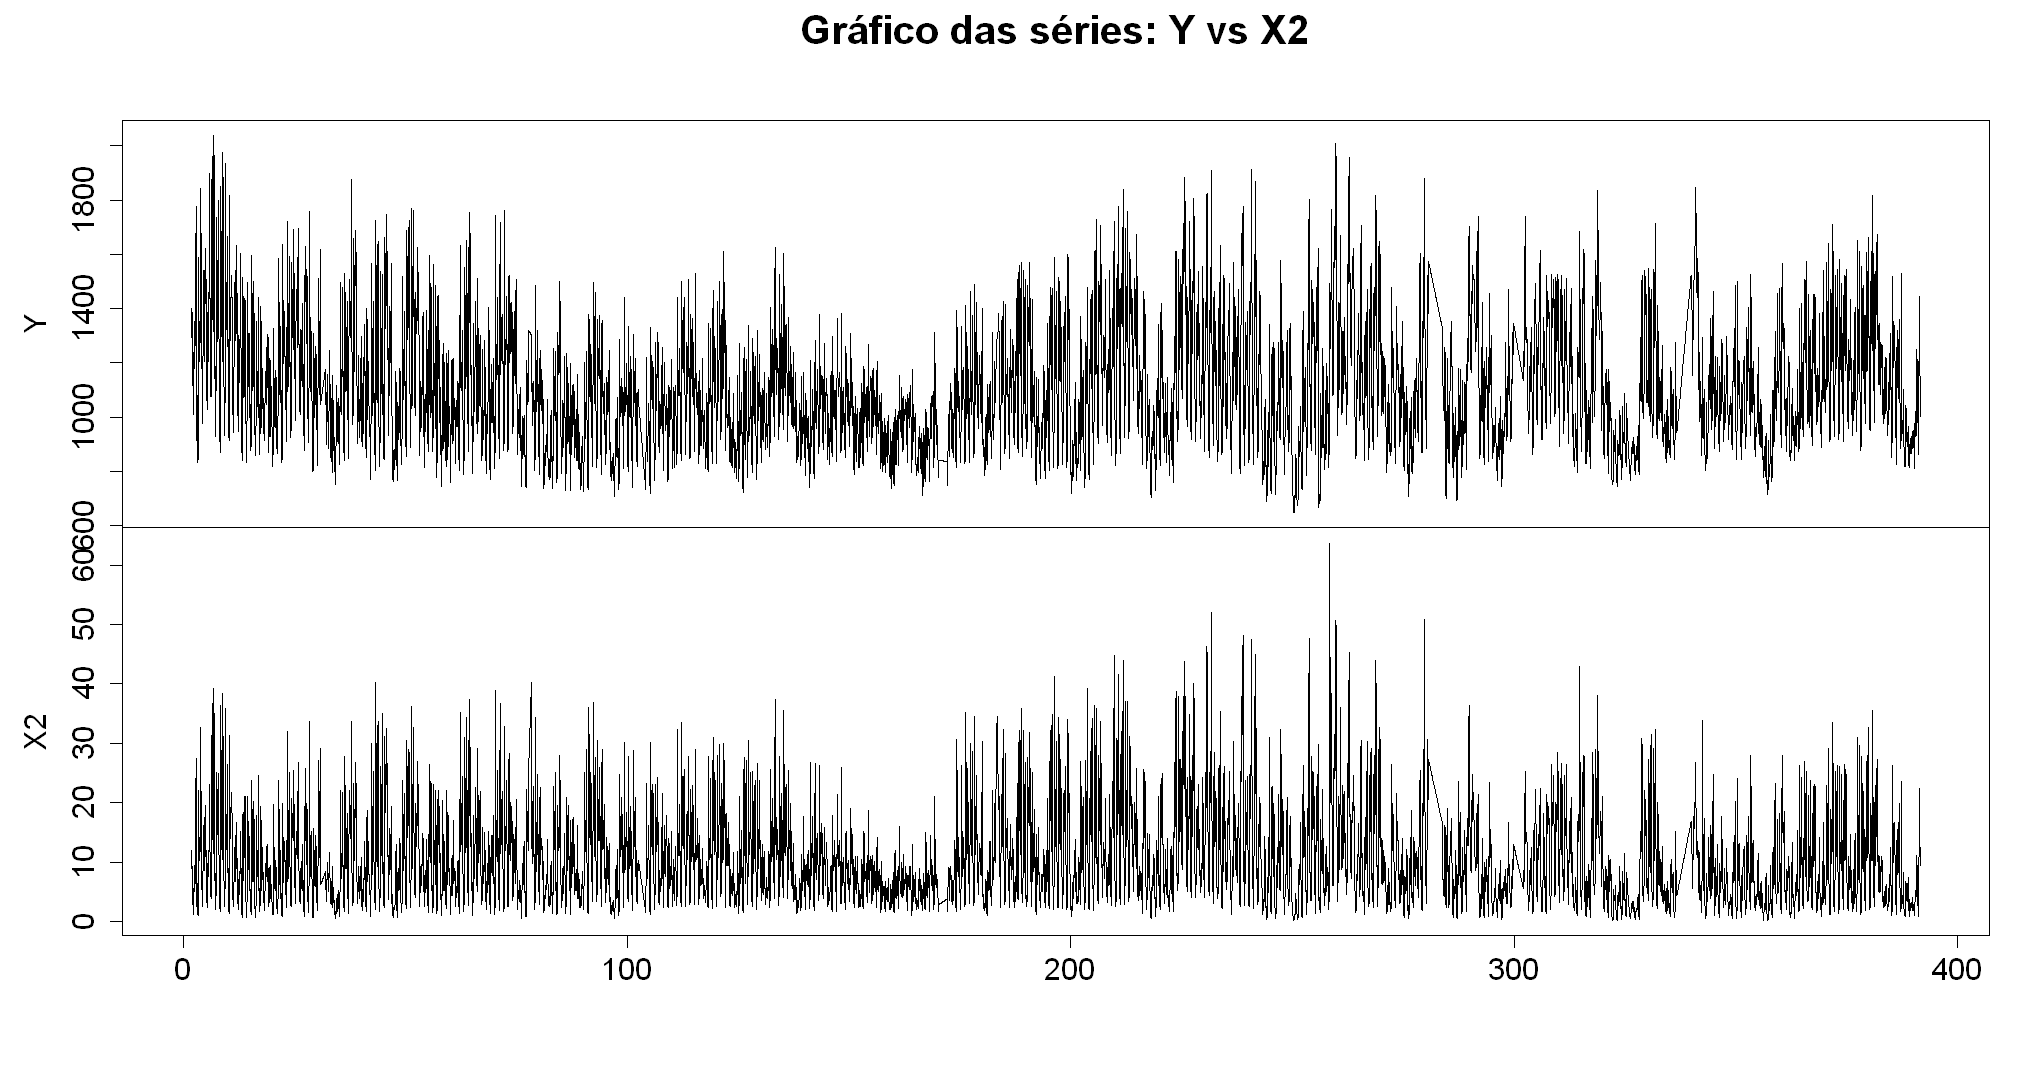

In [27]:
TS_X2 = ts(DF_STUDY_HORA[,c(2,4)],start=c(1,19), frequency=24)
plot(TS_X2,cex.lab=1.5, cex.axis=1.5, cex.main=2, main='Gráfico das séries: Y vs X2', xlab='')


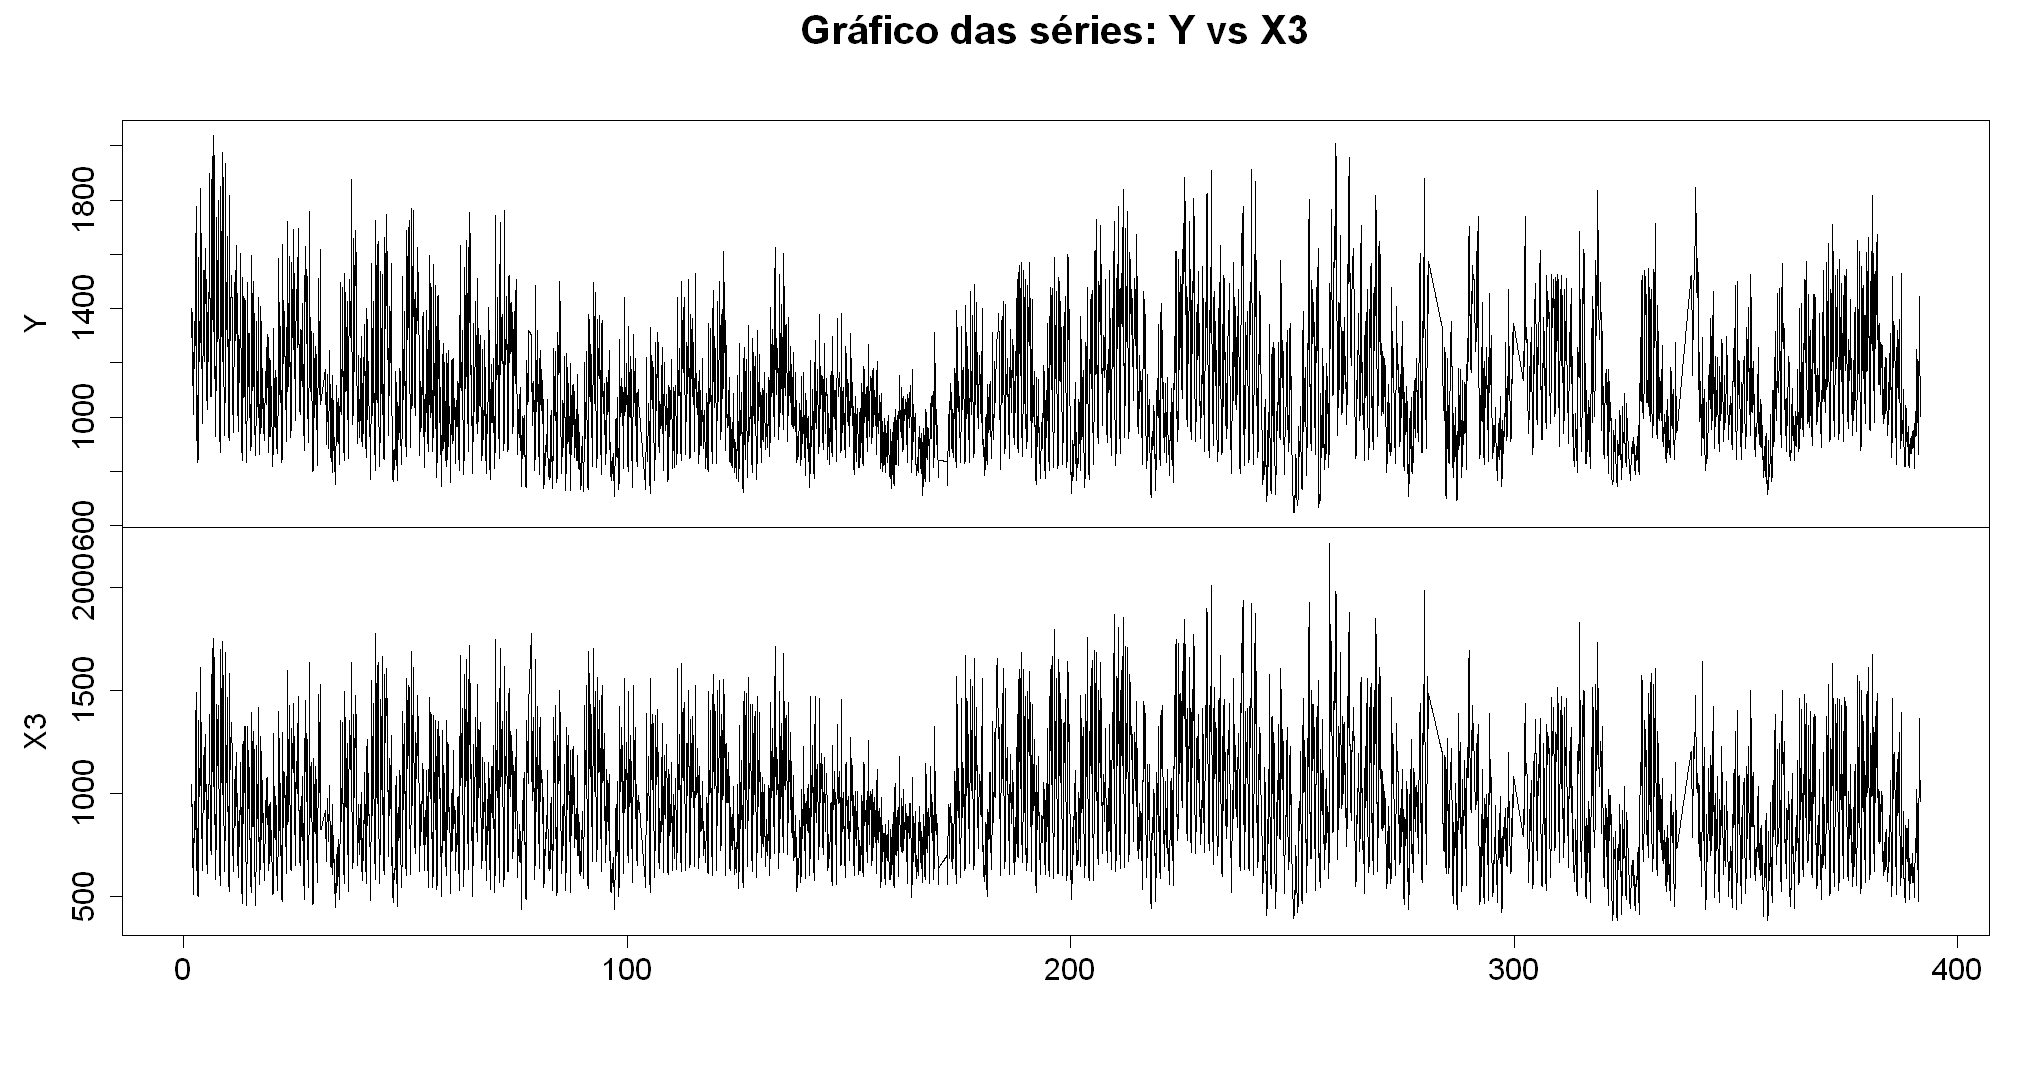

In [28]:
TS_X3 = ts(DF_STUDY_HORA[,c(2,5)],start=c(1,19), frequency=24)
plot(TS_X3,cex.lab=1.5, cex.axis=1.5, cex.main=2, main='Gráfico das séries: Y vs X3', xlab='')


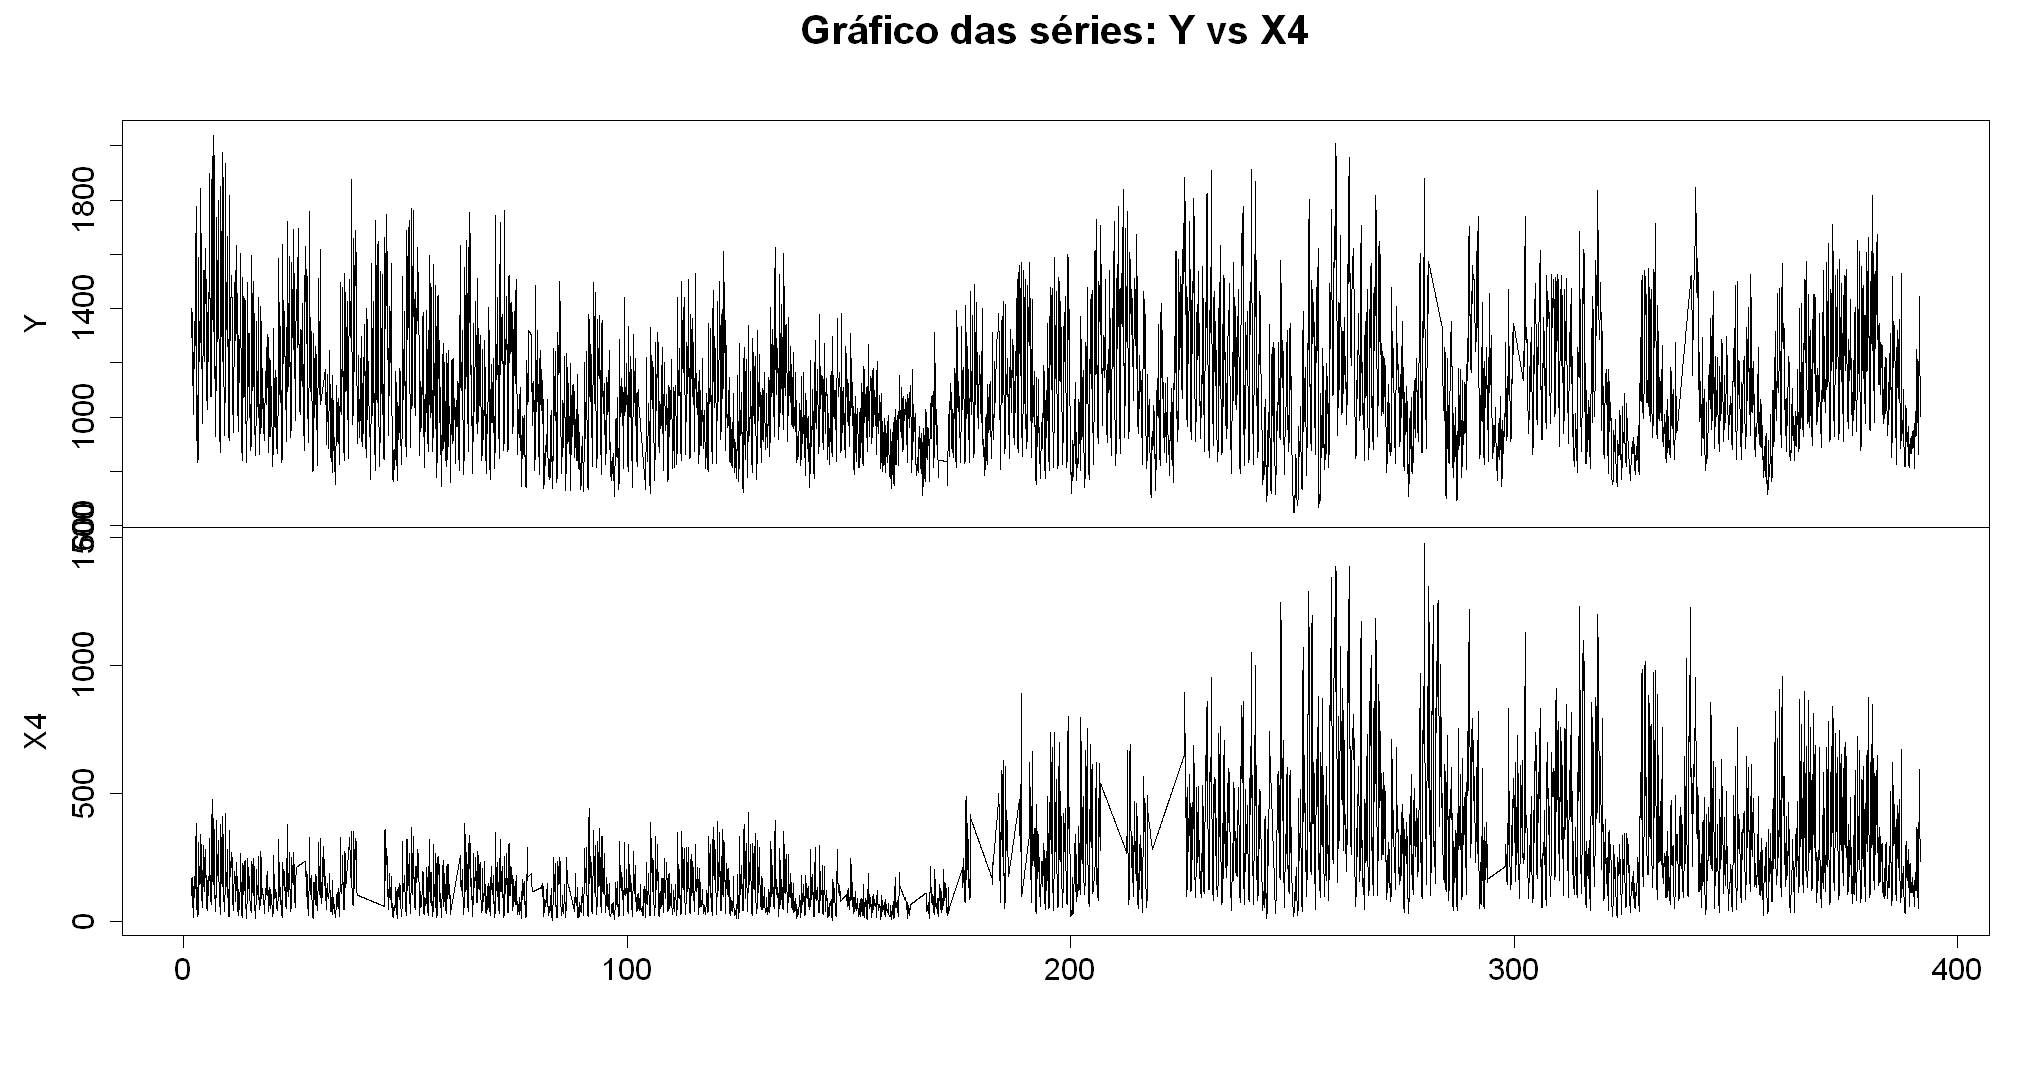

In [29]:
TS_X4 = ts(DF_STUDY_HORA[,c(2,6)],start=c(1,19), frequency=24)
plot(TS_X4, cex.lab=1.5, cex.axis=1.5, cex.main=2, main='Gráfico das séries: Y vs X4', xlab='')


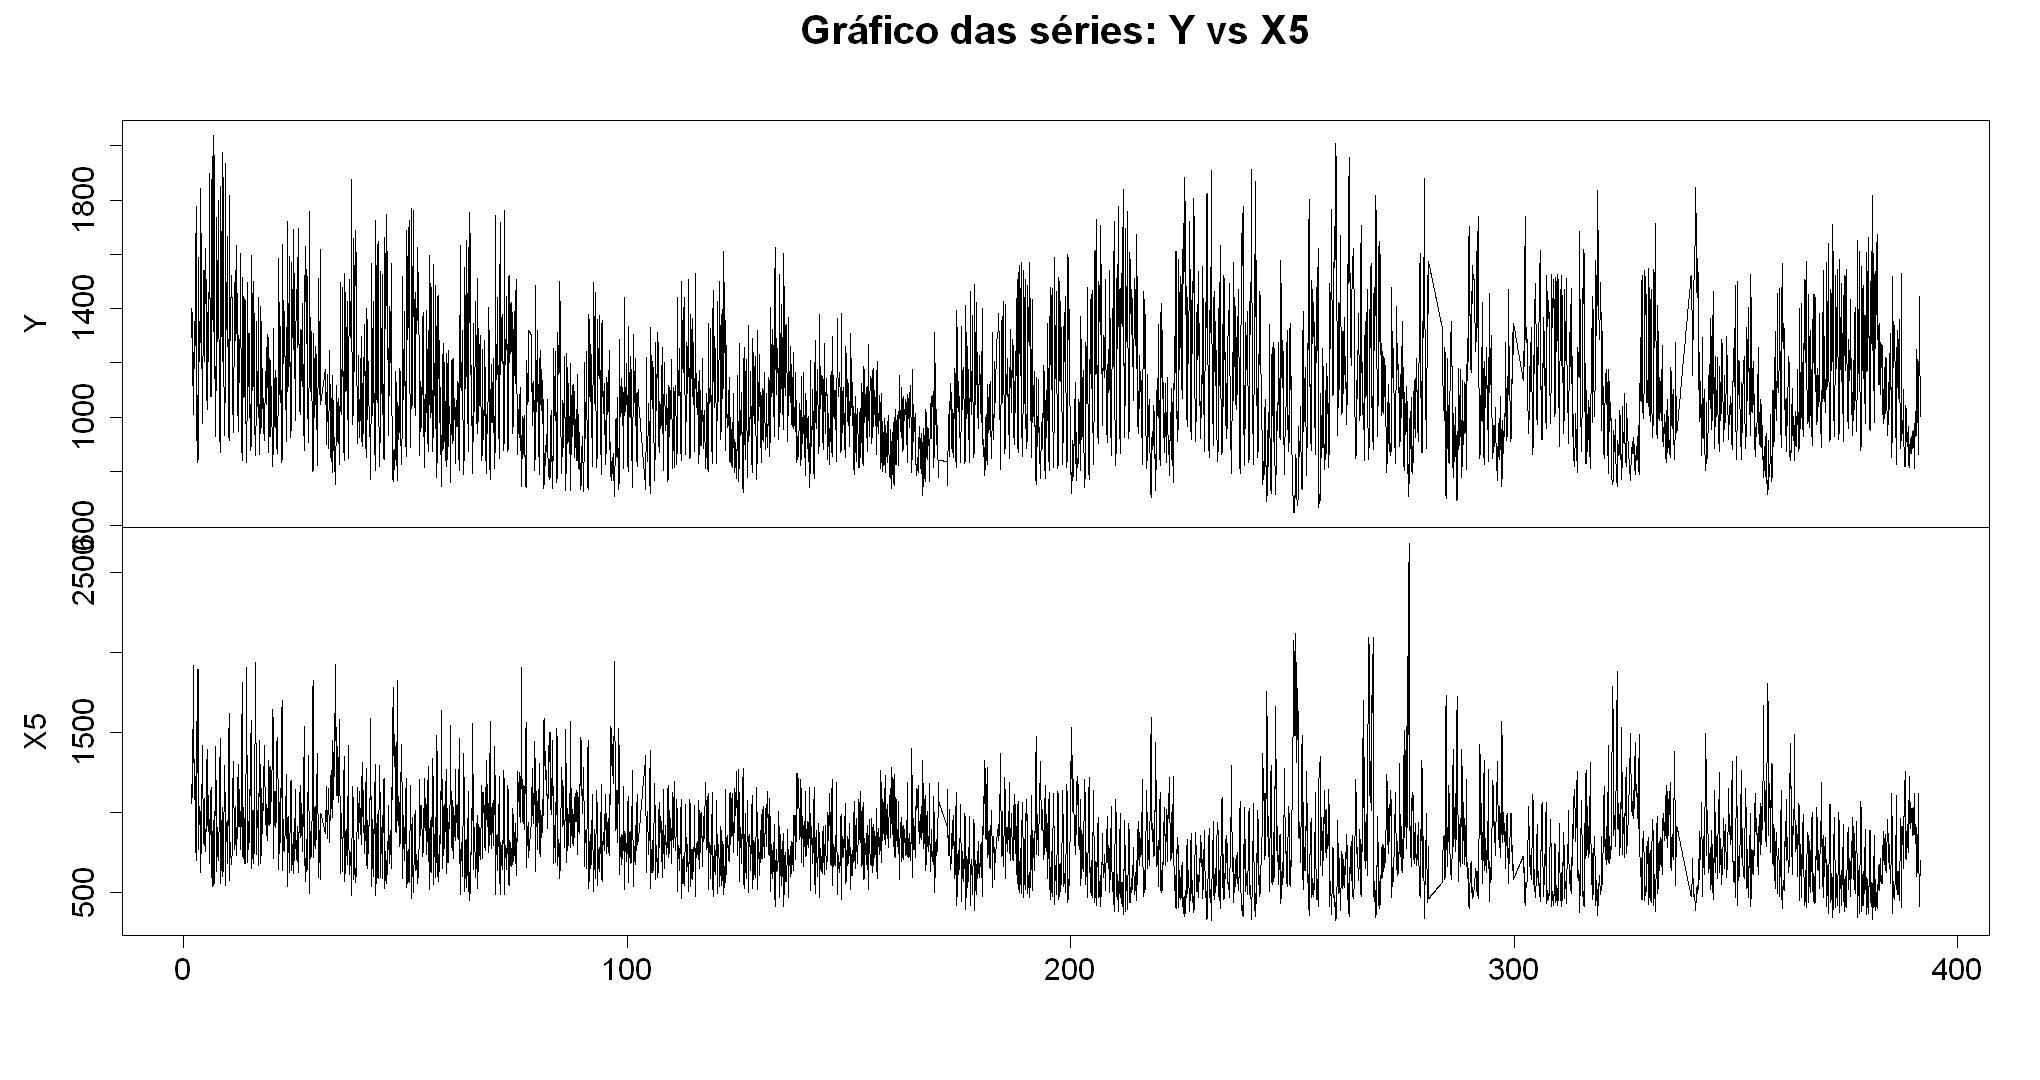

In [30]:
TS_X5 = ts(DF_STUDY_HORA[,c(2,7)],start=c(1,19), frequency=24)
plot(TS_X5, cex.lab=1.5, cex.axis=1.5, cex.main=2, main='Gráfico das séries: Y vs X5', xlab='')


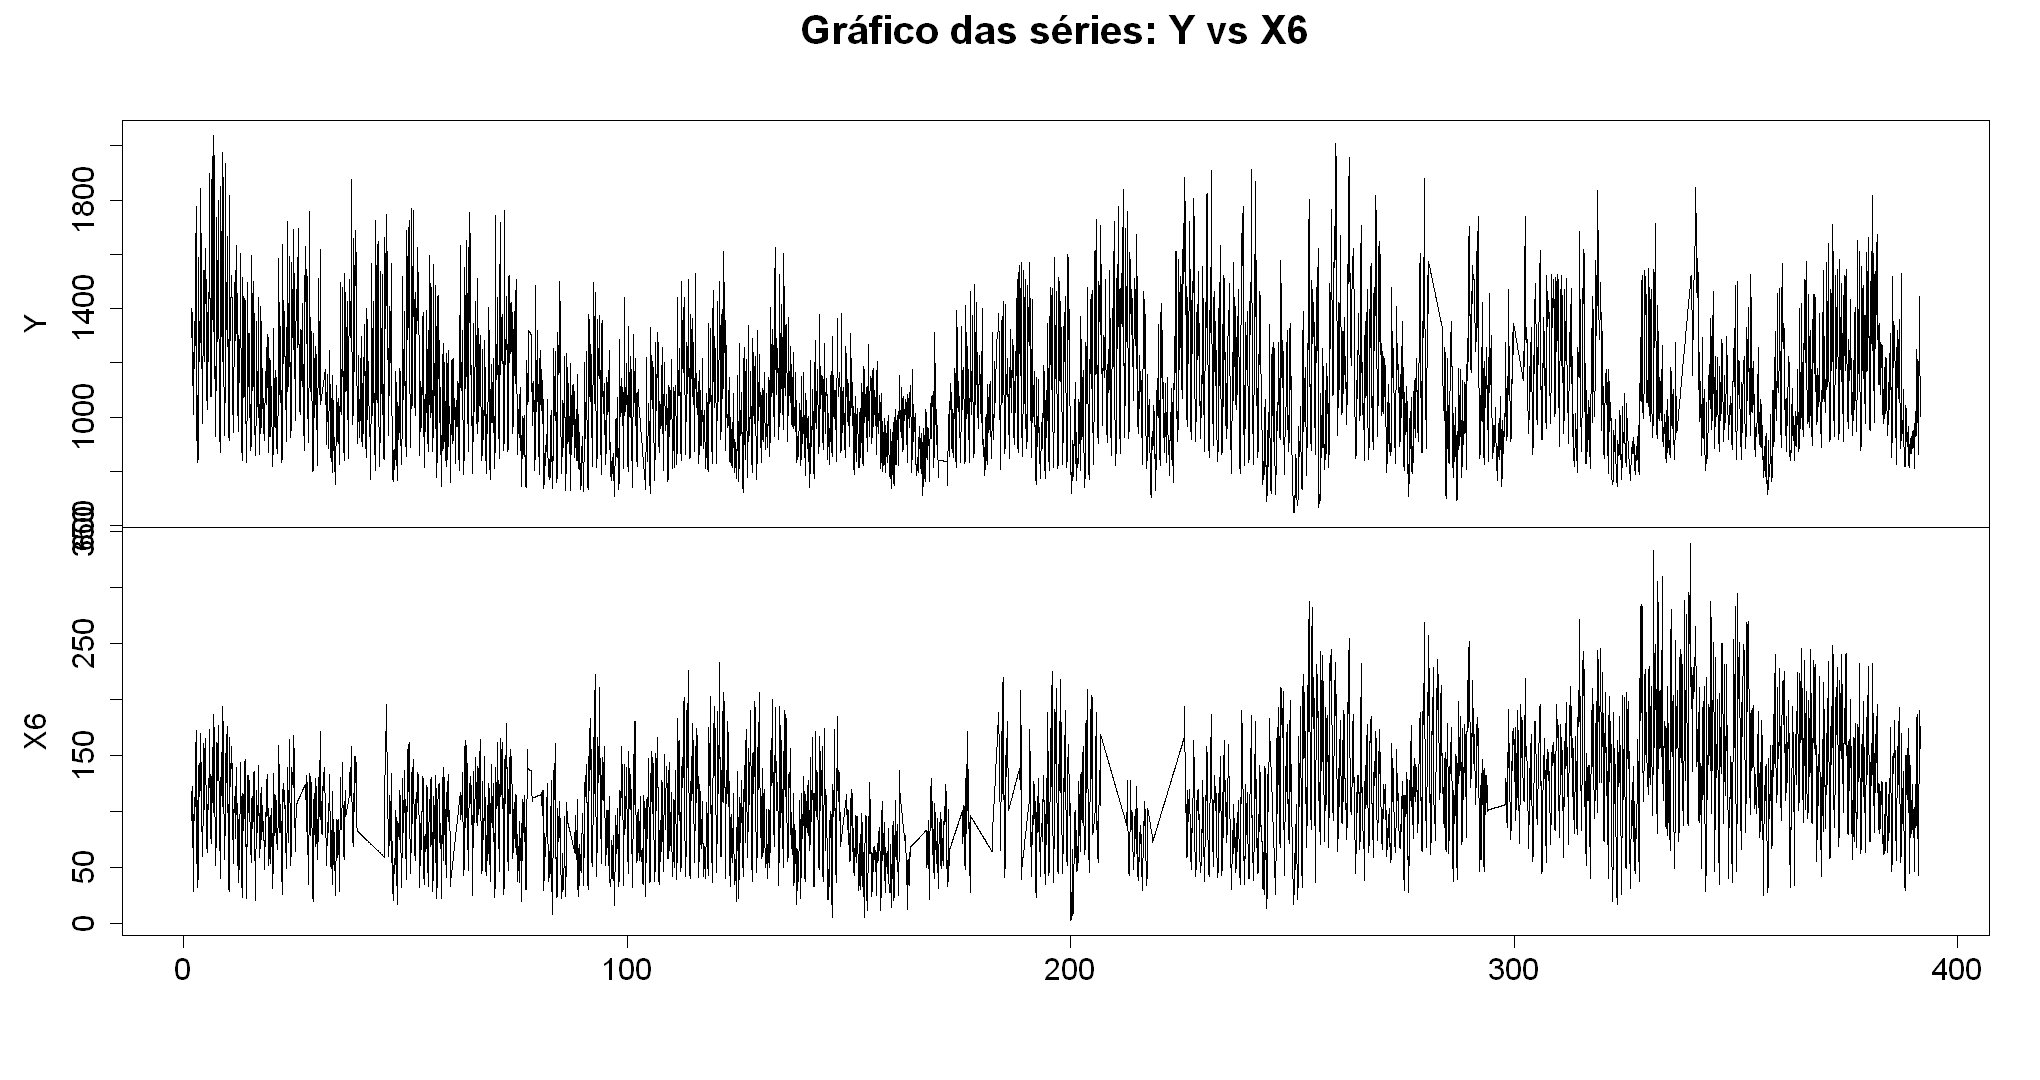

In [31]:
TS_X6 = ts(DF_STUDY_HORA[,c(2,8)],start=c(1,19), frequency=24)
plot(TS_X6, cex.lab=1.5, cex.axis=1.5, cex.main=2, main='Gráfico das séries: Y vs X6', xlab='')


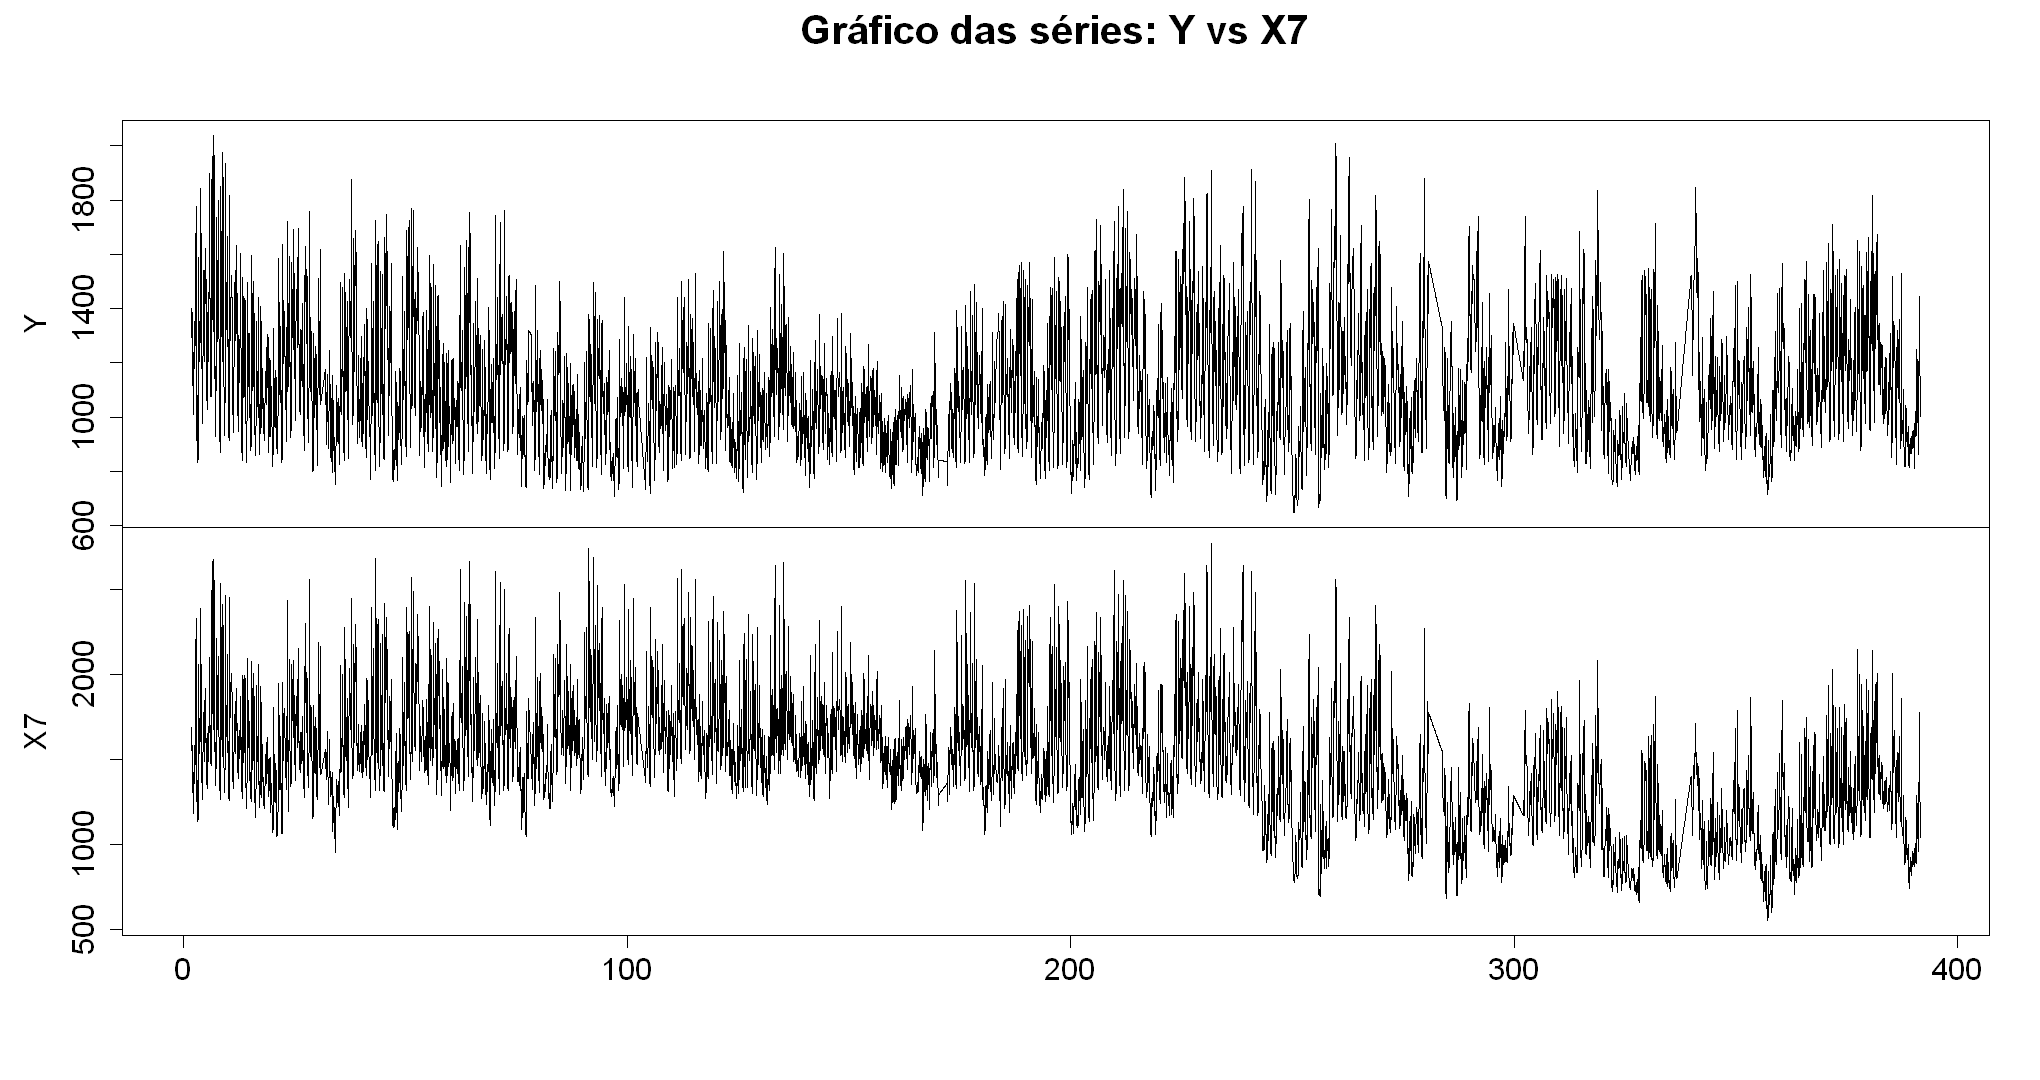

In [32]:
TS_X7 = ts(DF_STUDY_HORA[,c(2,9)],start=c(1,19), frequency=24)
plot(TS_X7, cex.lab=1.5, cex.axis=1.5, cex.main=2, main='Gráfico das séries: Y vs X7', xlab='')


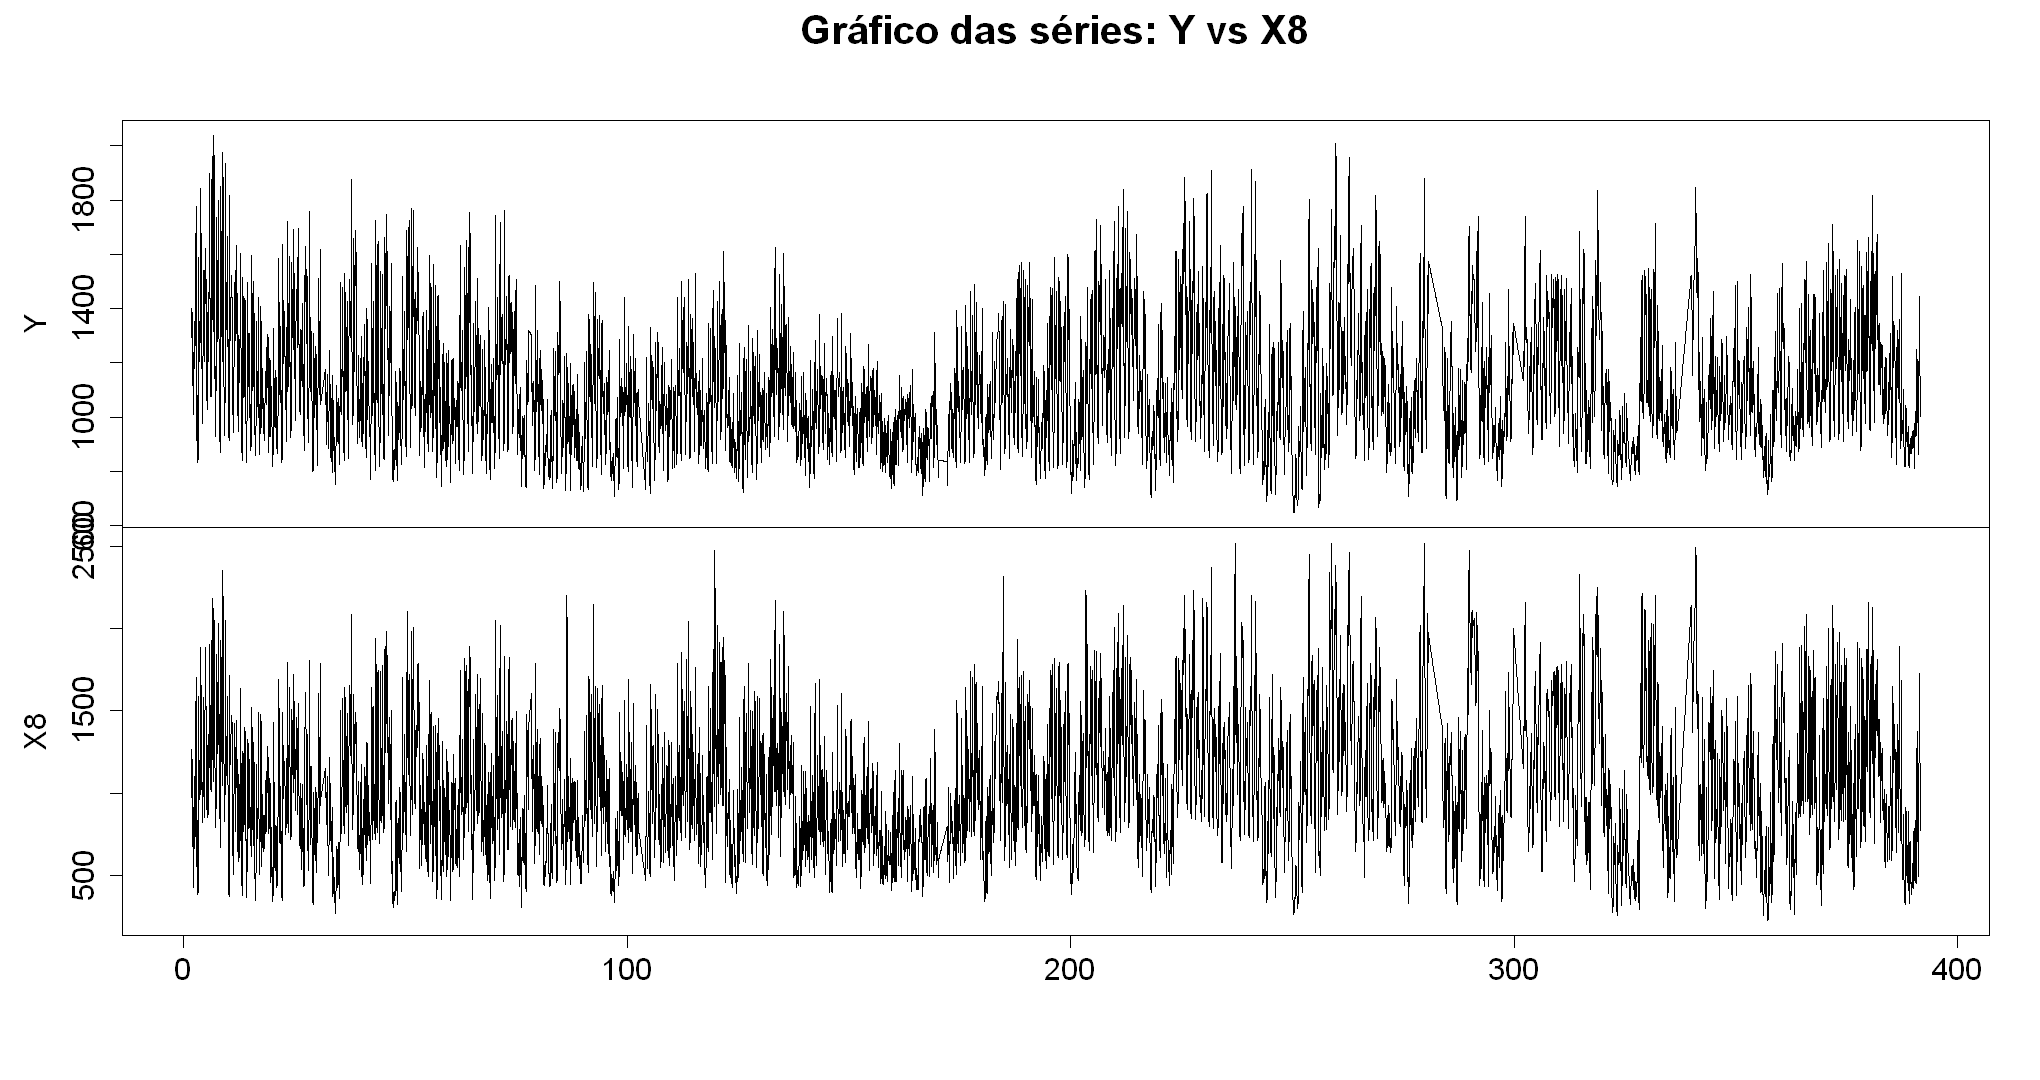

In [33]:
TS_X8 = ts(DF_STUDY_HORA[,c(2,10)],start=c(1,19), frequency=24)
plot(TS_X8, cex.lab=1.5, cex.axis=1.5, cex.main=2, main='Gráfico das séries: Y vs X8', xlab='')


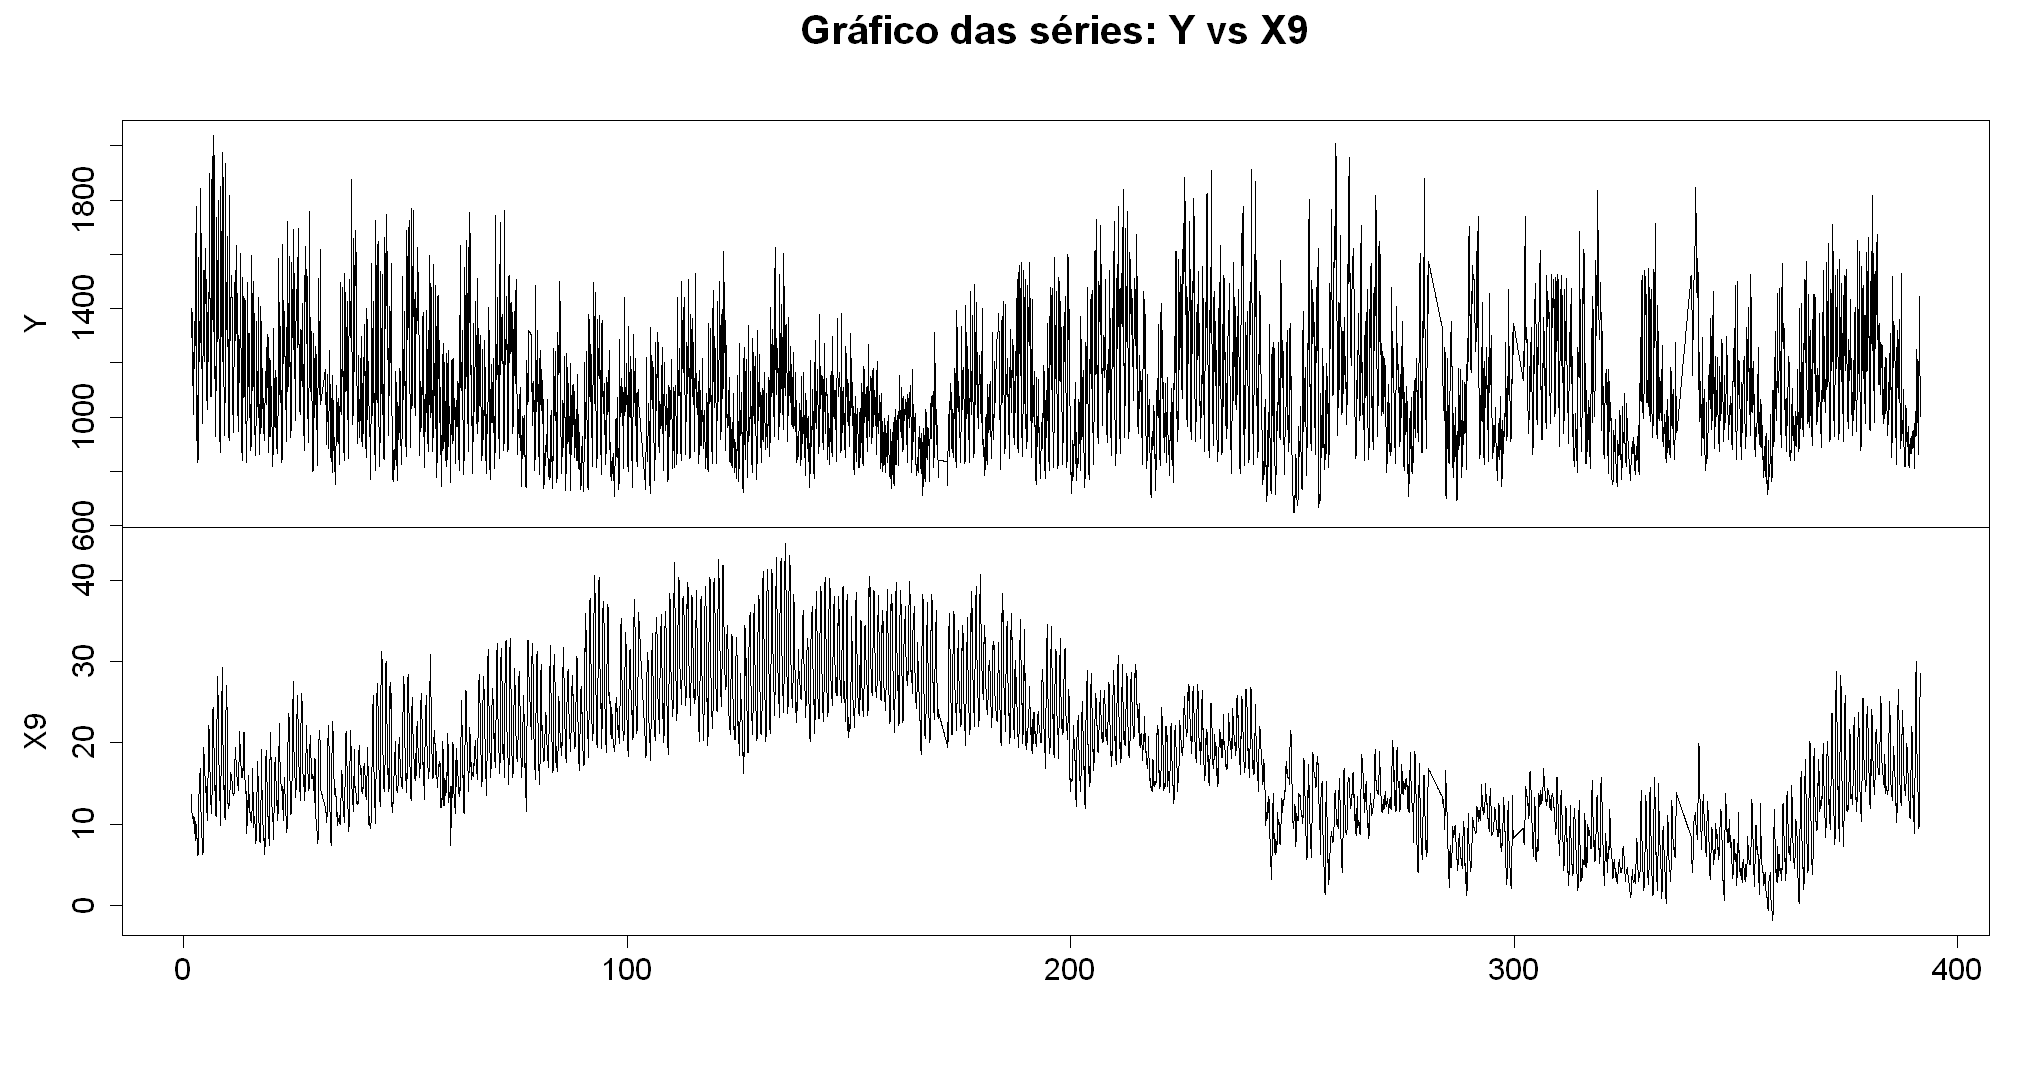

In [34]:
TS_X9 = ts(DF_STUDY_HORA[,c(2,11)],start=c(1,19), frequency=24)
plot(TS_X9, cex.lab=1.5, cex.axis=1.5, cex.main=2, main='Gráfico das séries: Y vs X9', xlab='')


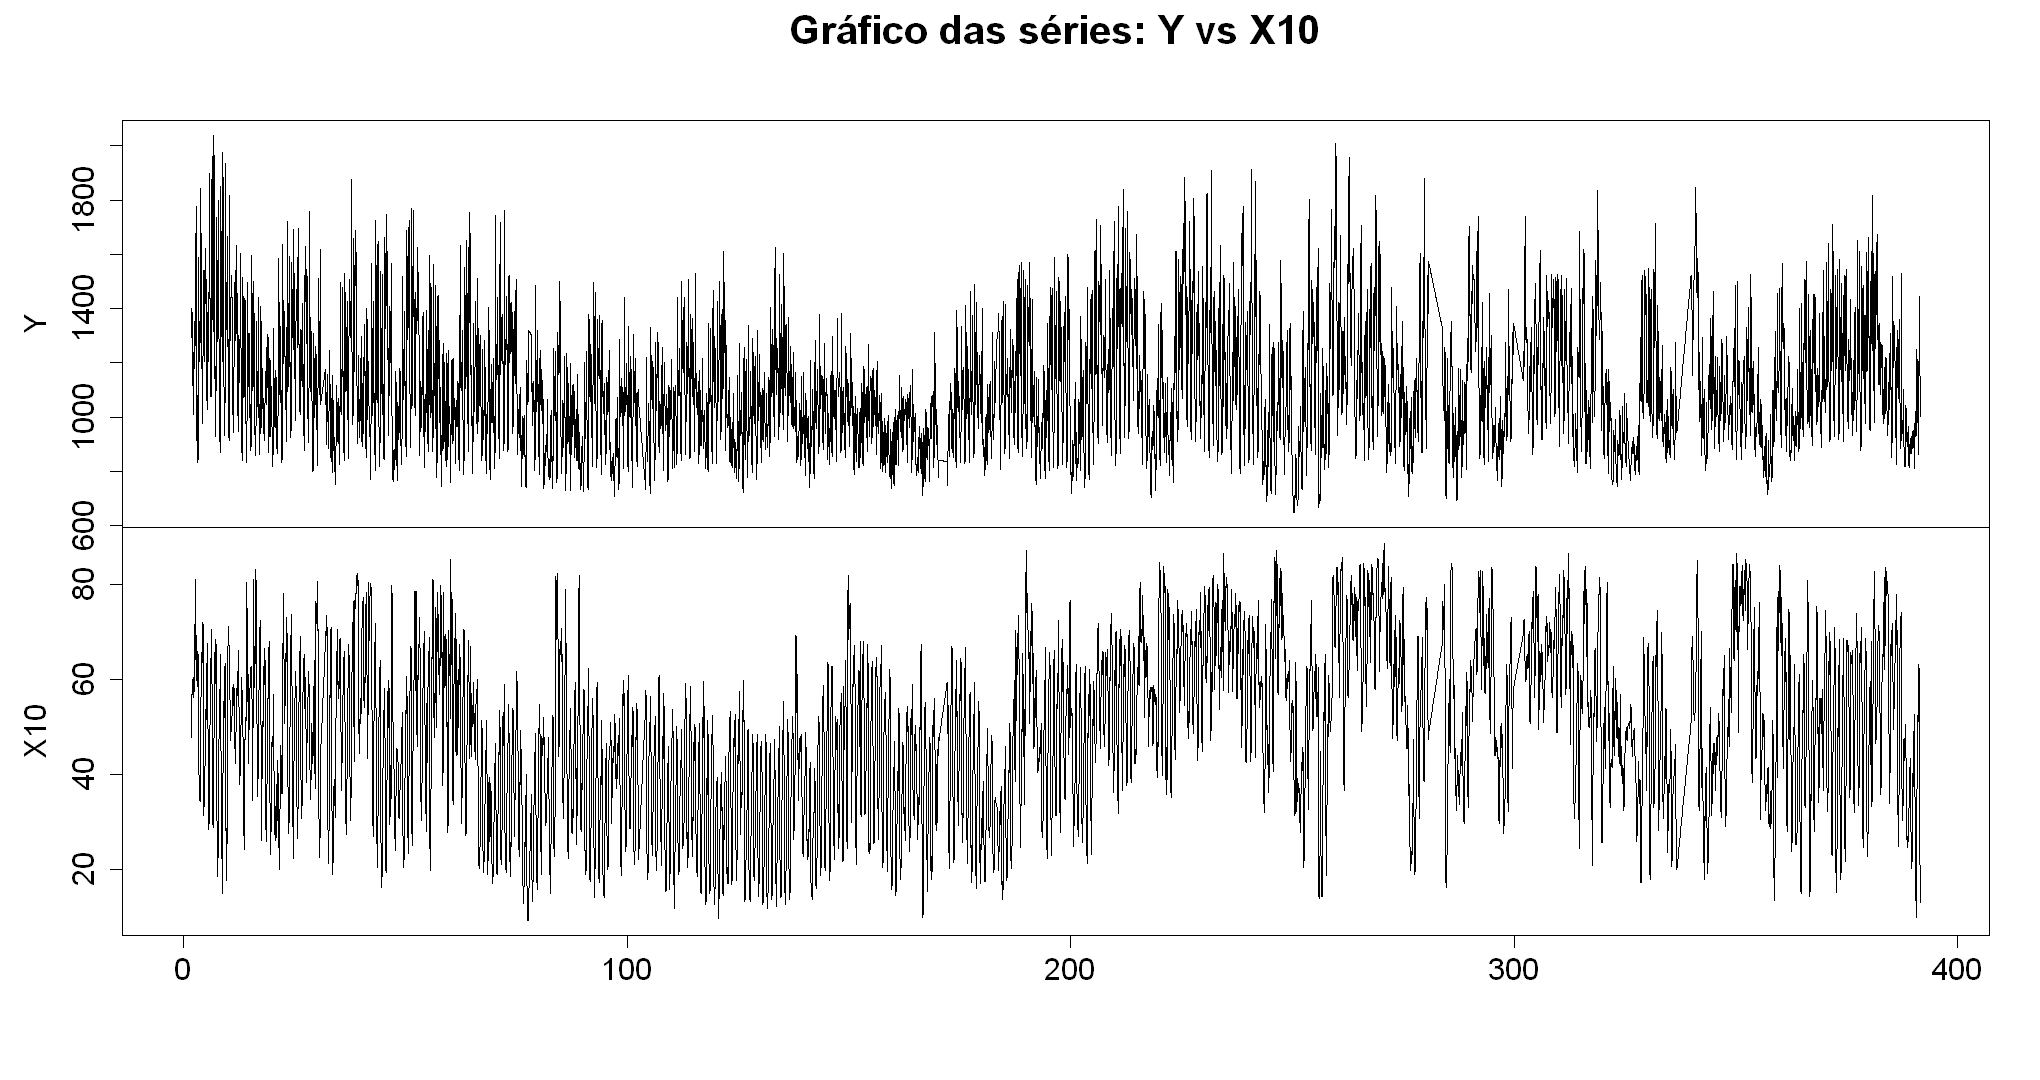

In [35]:
TS_X10 = ts(DF_STUDY_HORA[,c(2,12)],start=c(1,19), frequency=24)
plot(TS_X10, cex.lab=1.5, cex.axis=1.5, cex.main=2, main='Gráfico das séries: Y vs X10', xlab='')


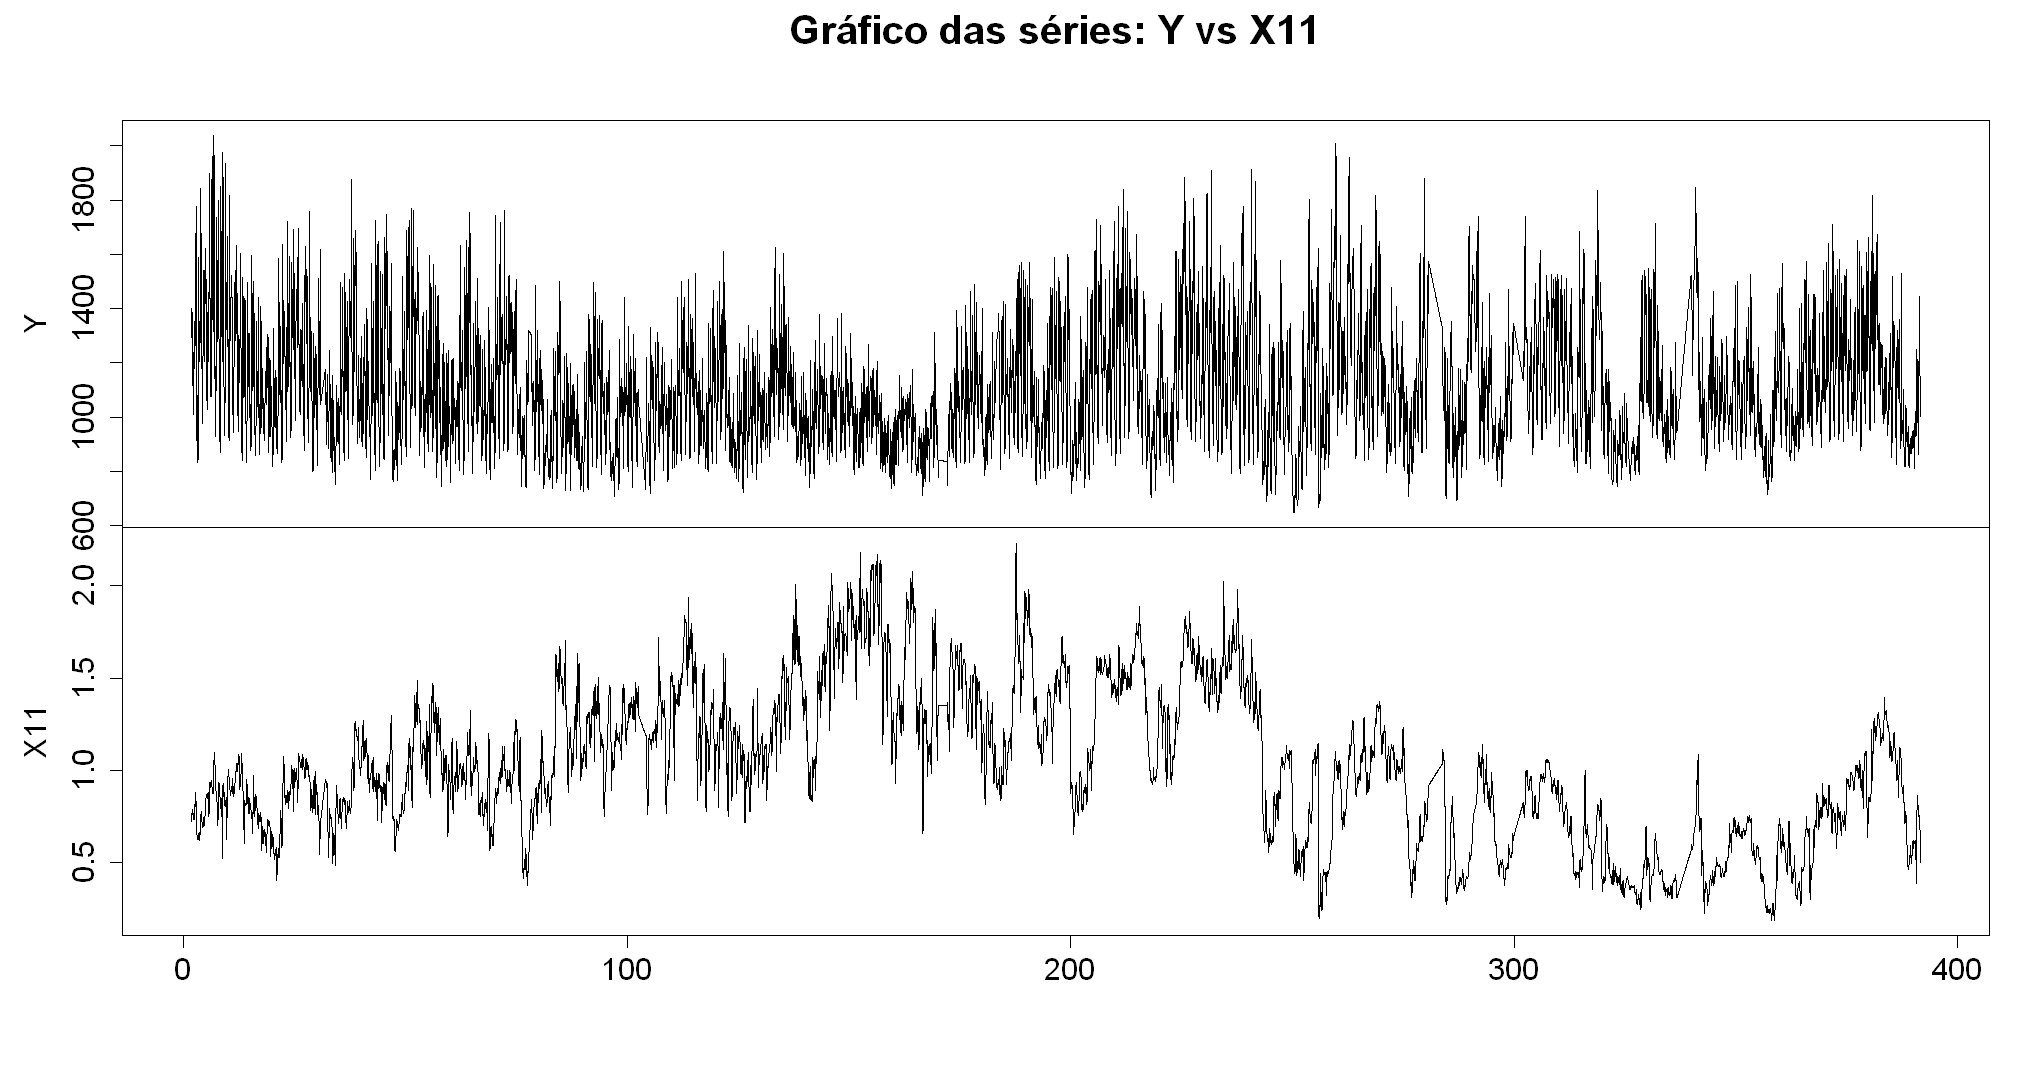

In [36]:
TS_X11 = ts(DF_STUDY_HORA[,c(2,13)],start=c(1,19), frequency=24)
plot(TS_X11, cex.lab=1.5, cex.axis=1.5, cex.main=2, main='Gráfico das séries: Y vs X11', xlab='')


## Seção 12 - Gráficos de autocorrelação e autocorrelação parcial (informação hora a hora)

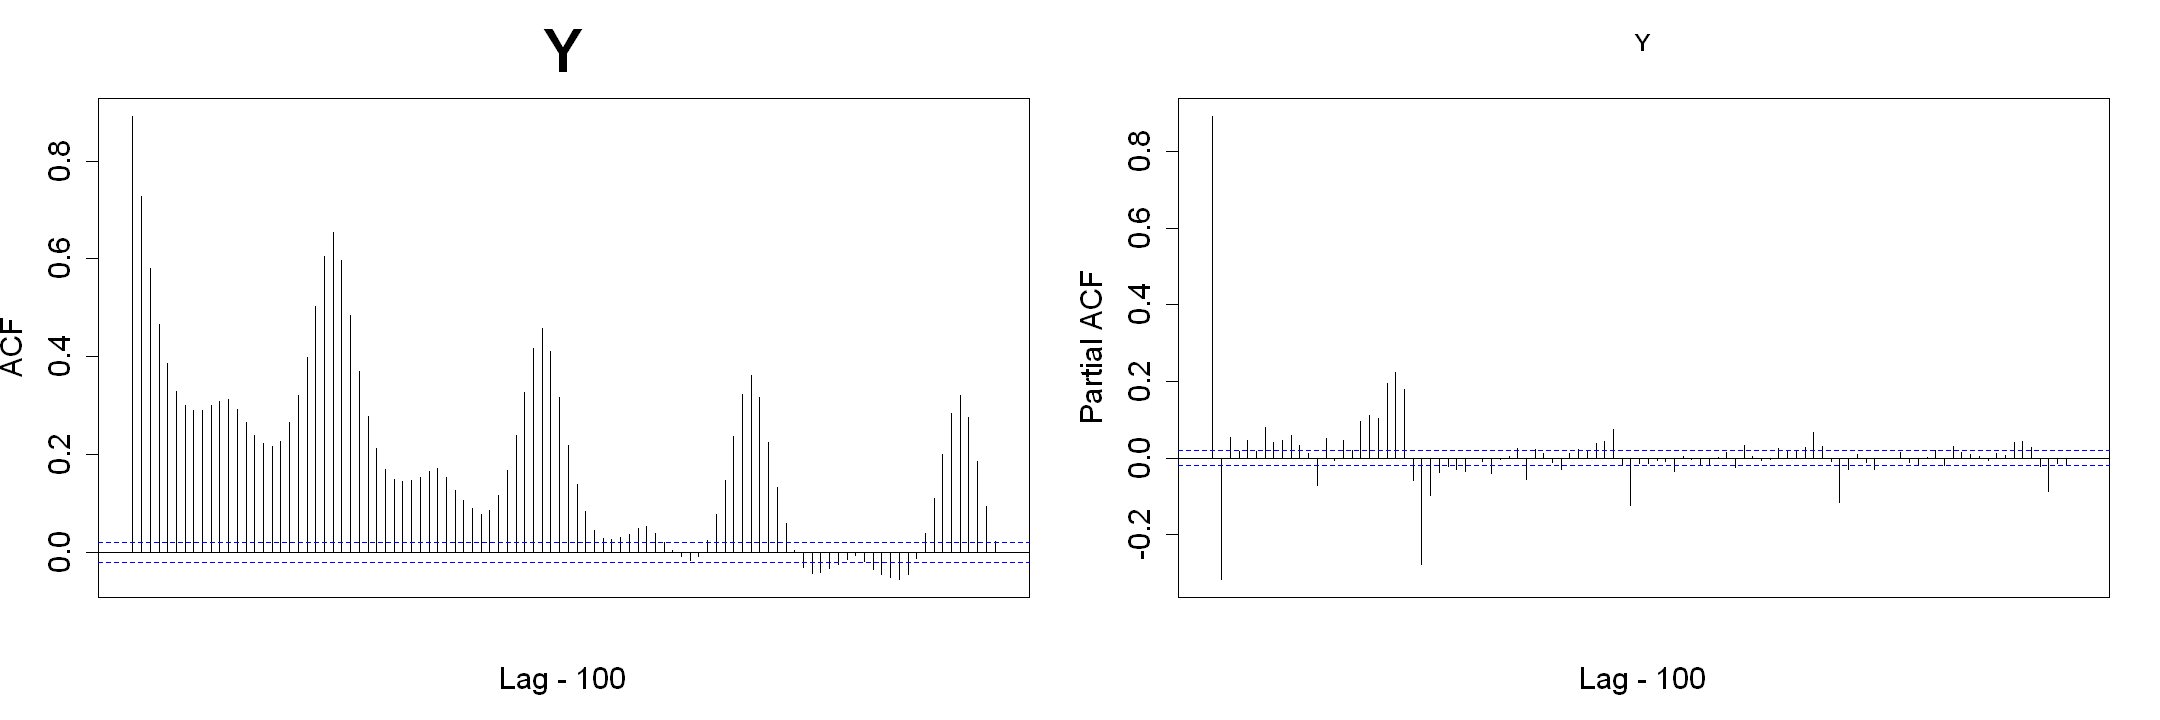

In [37]:
TS_Y = ts(DF_STUDY_HORA[,2],start=c(1,19), frequency=24)

options(repr.plot.width=18, repr.plot.height=6) #pacote repr
par(mfrow=c(1,2))
acf(TS_Y, cex.lab=1.5, cex.axis=1.5, cex.main=3, main='Y', lag.max=100, xaxt='n', xlab='Lag - 100')
pacf(TS_Y, cex.lab=1.5, cex.axis=1.5, cex.main=3, main='Y', lag.max=100, xaxt='n', xlab='Lag - 100')

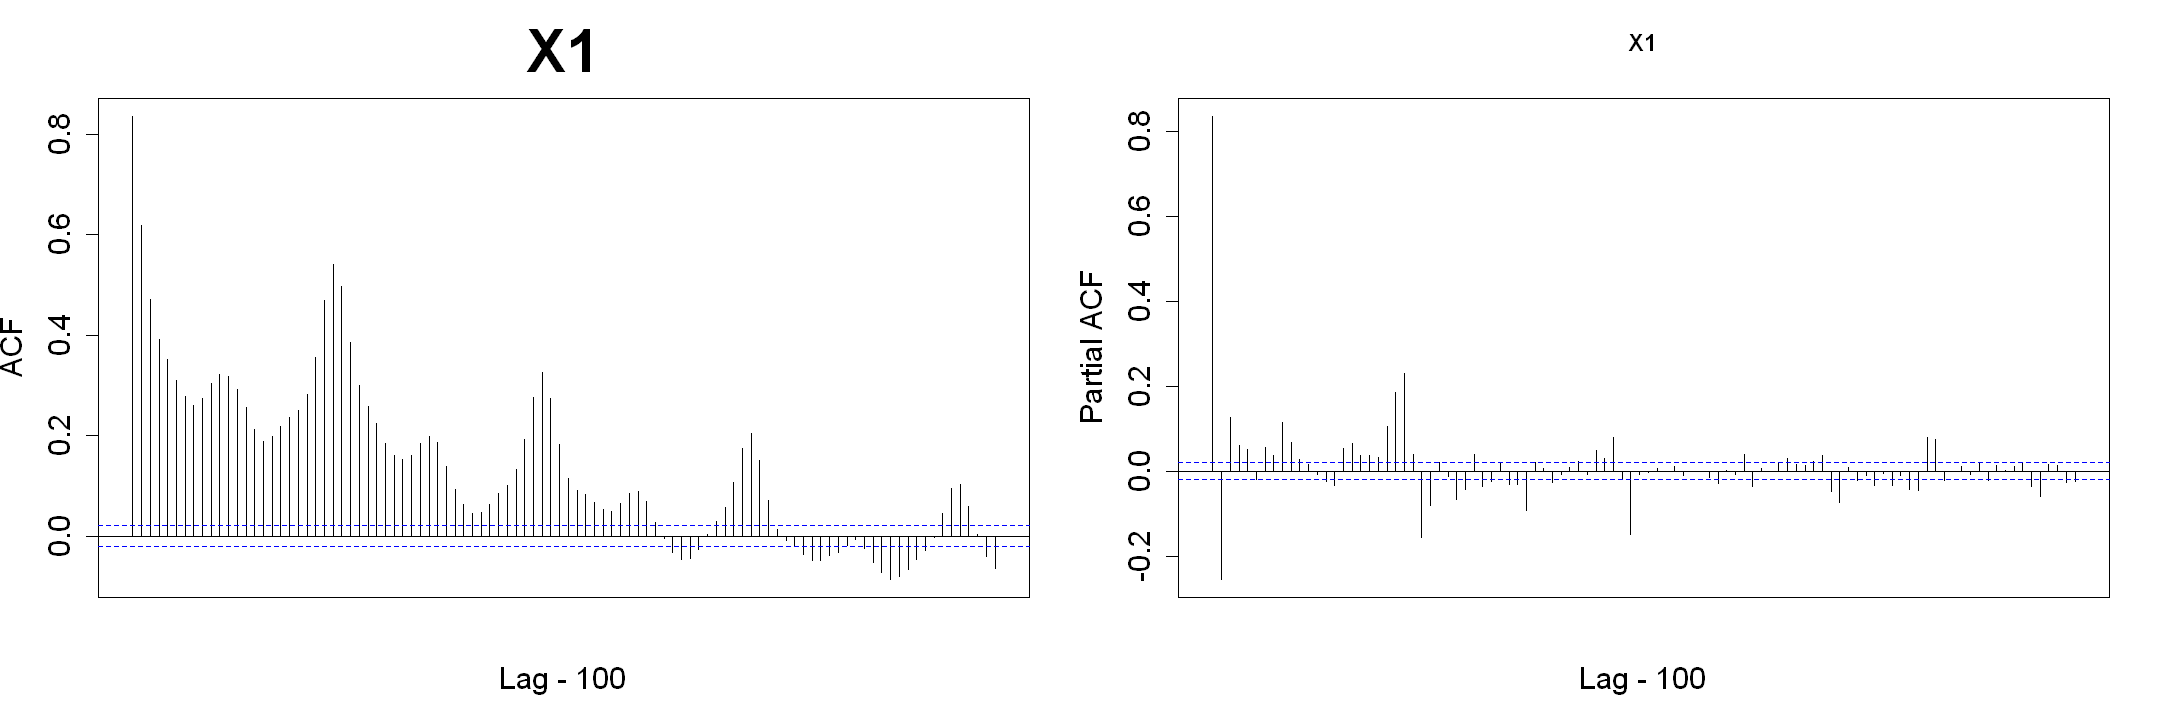

In [38]:
TS_X1 = ts(DF_STUDY_HORA[,3],start=c(1,19), frequency=24)

options(repr.plot.width=18, repr.plot.height=6) #pacote repr
par(mfrow=c(1,2))
acf(TS_X1, cex.lab=1.5, cex.axis=1.5, cex.main=3, main='X1', lag.max=100, xaxt='n', xlab='Lag - 100')
pacf(TS_X1, cex.lab=1.5, cex.axis=1.5, cex.main=3, main='X1', lag.max=100, xaxt='n', xlab='Lag - 100')

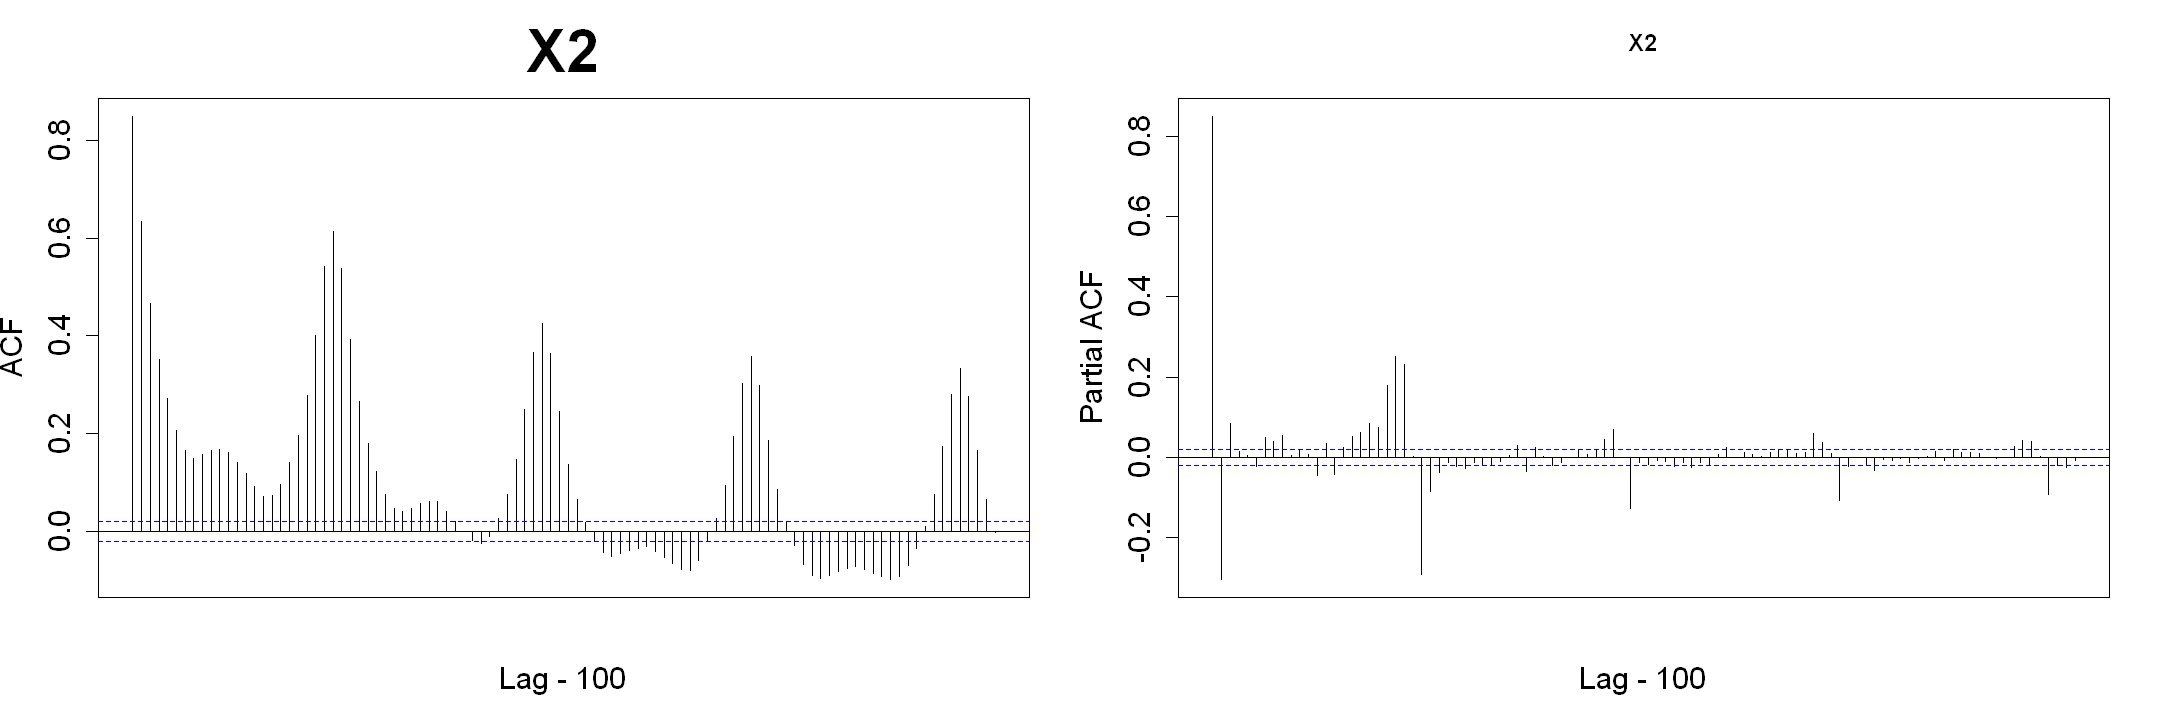

In [39]:
TS_X2 = ts(DF_STUDY_HORA[,4],start=c(1,19), frequency=24)

options(repr.plot.width=18, repr.plot.height=6) #pacote repr
par(mfrow=c(1,2))
acf(TS_X2, cex.lab=1.5, cex.axis=1.5, cex.main=3, main='X2', lag.max=100, xaxt='n', xlab='Lag - 100')
pacf(TS_X2, cex.lab=1.5, cex.axis=1.5, cex.main=3, main='X2', lag.max=100, xaxt='n', xlab='Lag - 100')

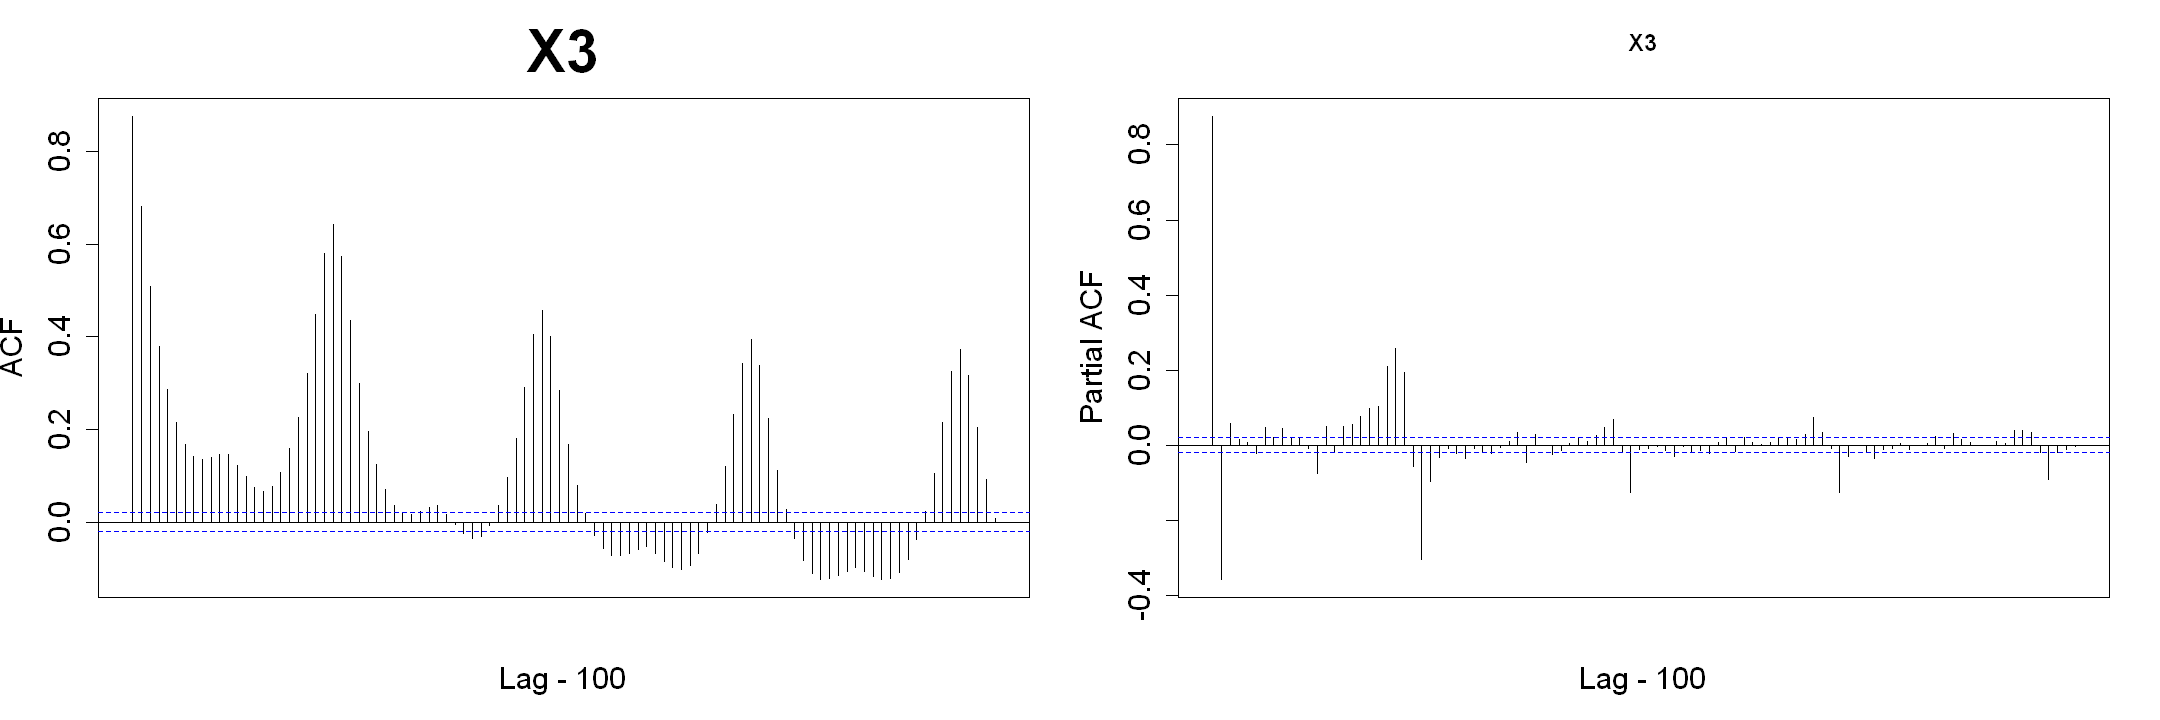

In [40]:
TS_X3 = ts(DF_STUDY_HORA[,5],start=c(1,19), frequency=24)

options(repr.plot.width=18, repr.plot.height=6) #pacote repr
par(mfrow=c(1,2))
acf(TS_X3, cex.lab=1.5, cex.axis=1.5, cex.main=3, main='X3', lag.max=100, xaxt='n', xlab='Lag - 100')
pacf(TS_X3, cex.lab=1.5, cex.axis=1.5, cex.main=3, main='X3', lag.max=100, xaxt='n', xlab='Lag - 100')

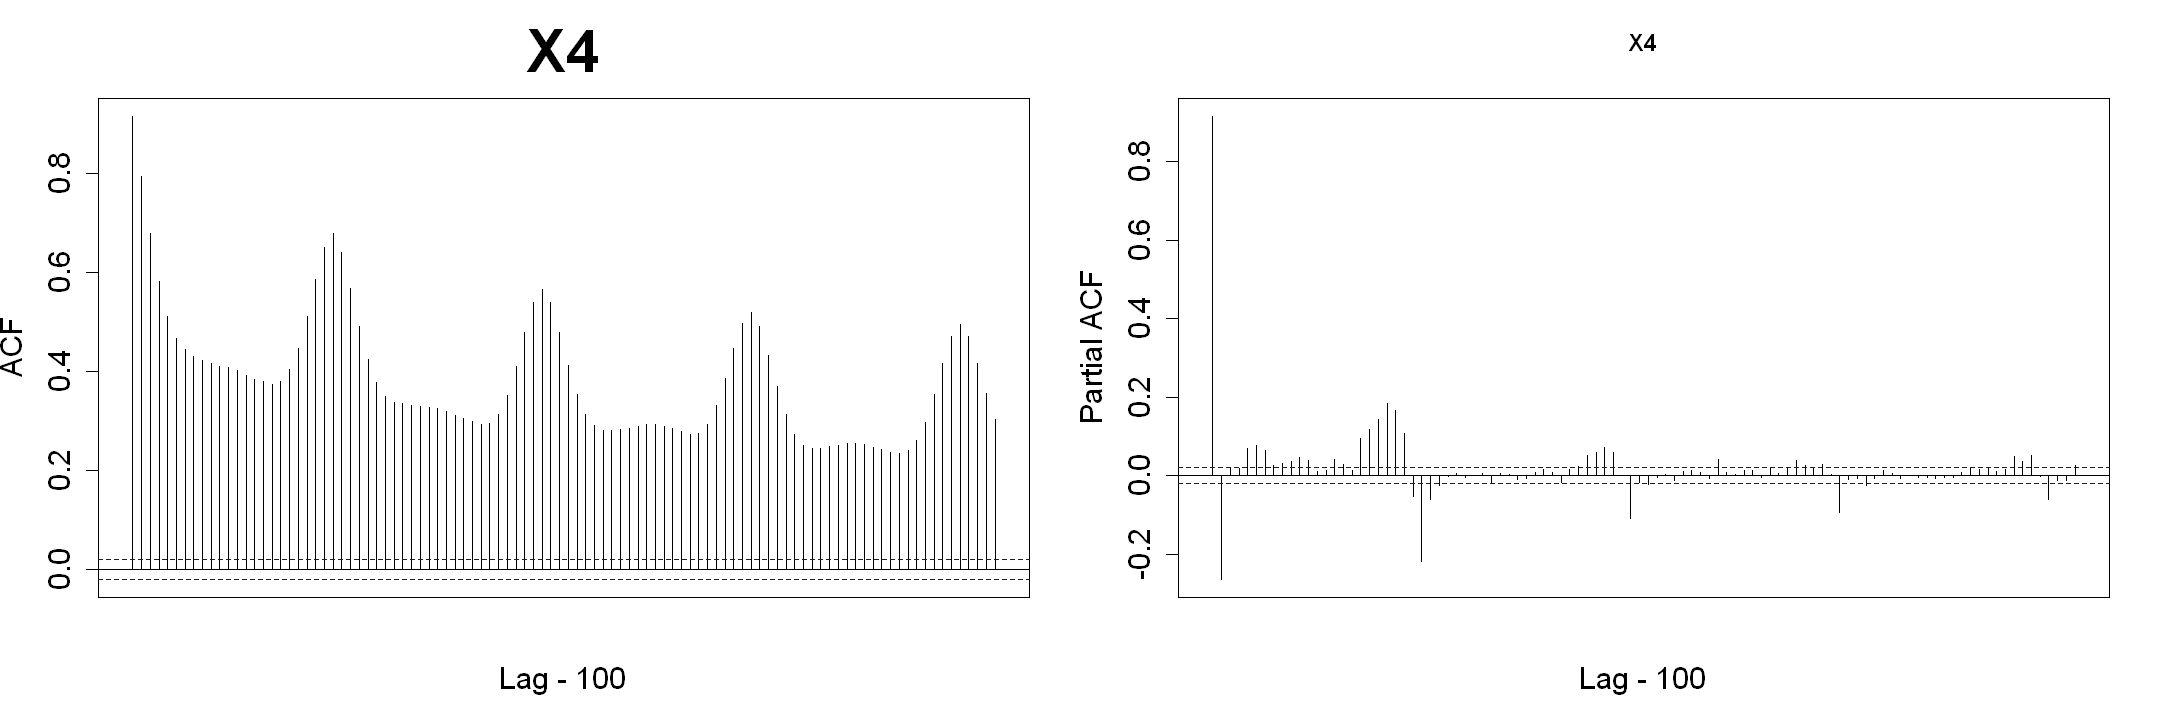

In [41]:
TS_X4 = ts(DF_STUDY_HORA[,6],start=c(1,19), frequency=24)

options(repr.plot.width=18, repr.plot.height=6) #pacote repr
par(mfrow=c(1,2))
acf(TS_X4, cex.lab=1.5, cex.axis=1.5, cex.main=3, main='X4', lag.max=100, xaxt='n', xlab='Lag - 100')
pacf(TS_X4, cex.lab=1.5, cex.axis=1.5, cex.main=3, main='X4', lag.max=100, xaxt='n', xlab='Lag - 100')

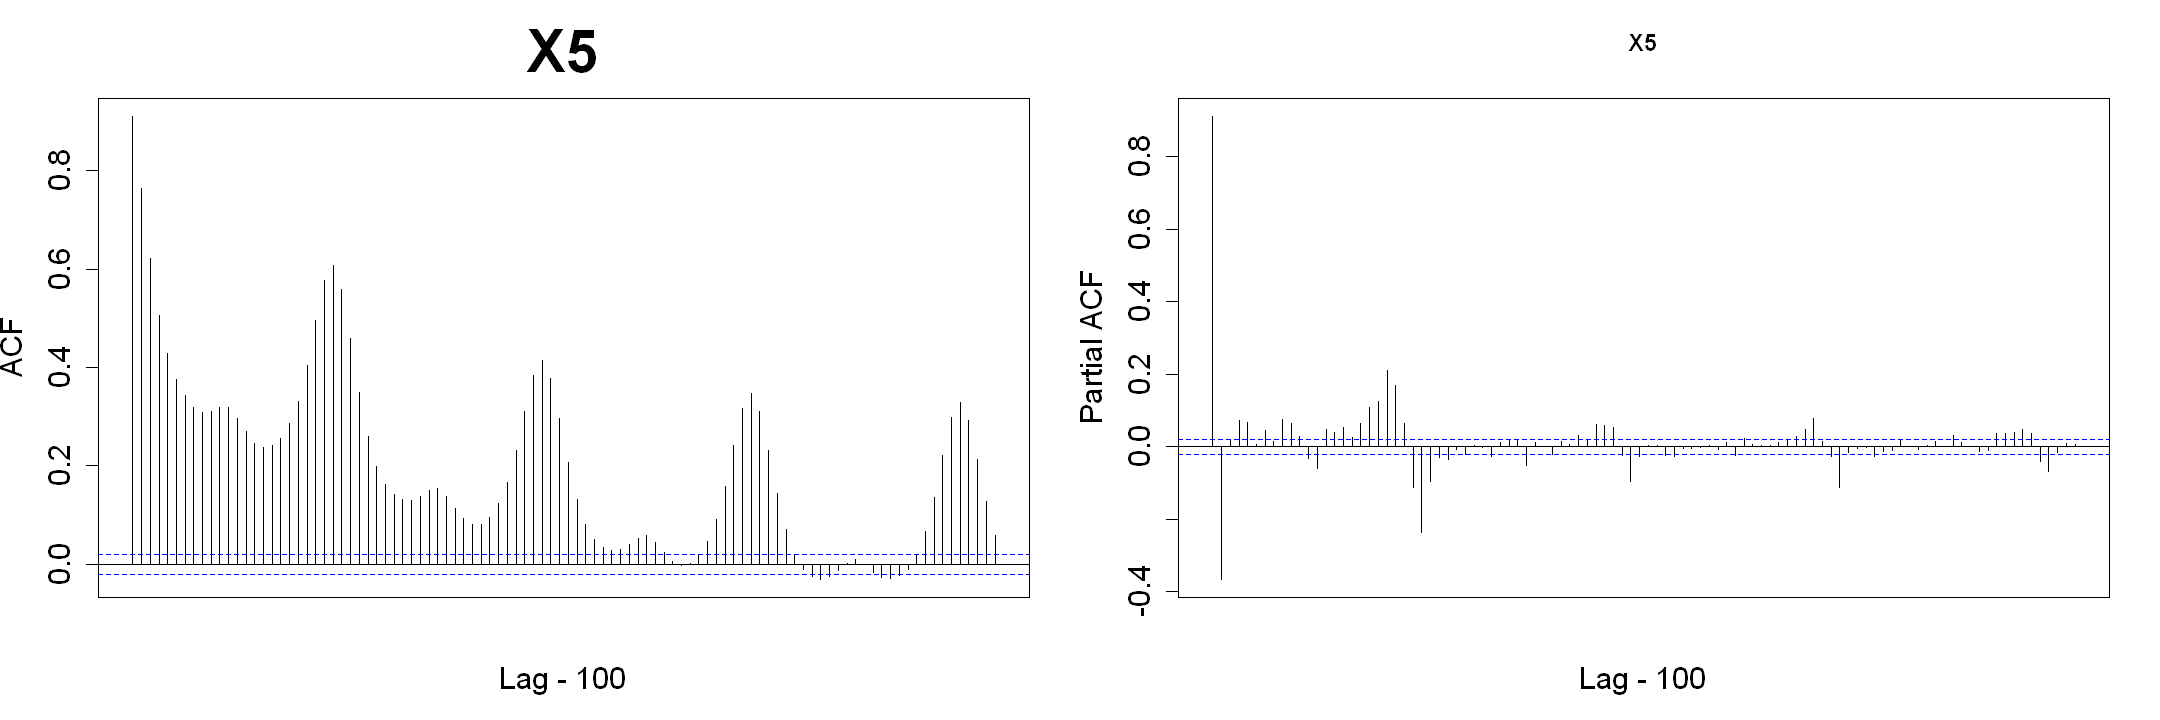

In [42]:
TS_X5 = ts(DF_STUDY_HORA[,7],start=c(1,19), frequency=24)

options(repr.plot.width=18, repr.plot.height=6) #pacote repr
par(mfrow=c(1,2))
acf(TS_X5, cex.lab=1.5, cex.axis=1.5, cex.main=3, main='X5', lag.max=100, xaxt='n', xlab='Lag - 100')
pacf(TS_X5, cex.lab=1.5, cex.axis=1.5, cex.main=3, main='X5', lag.max=100, xaxt='n', xlab='Lag - 100')

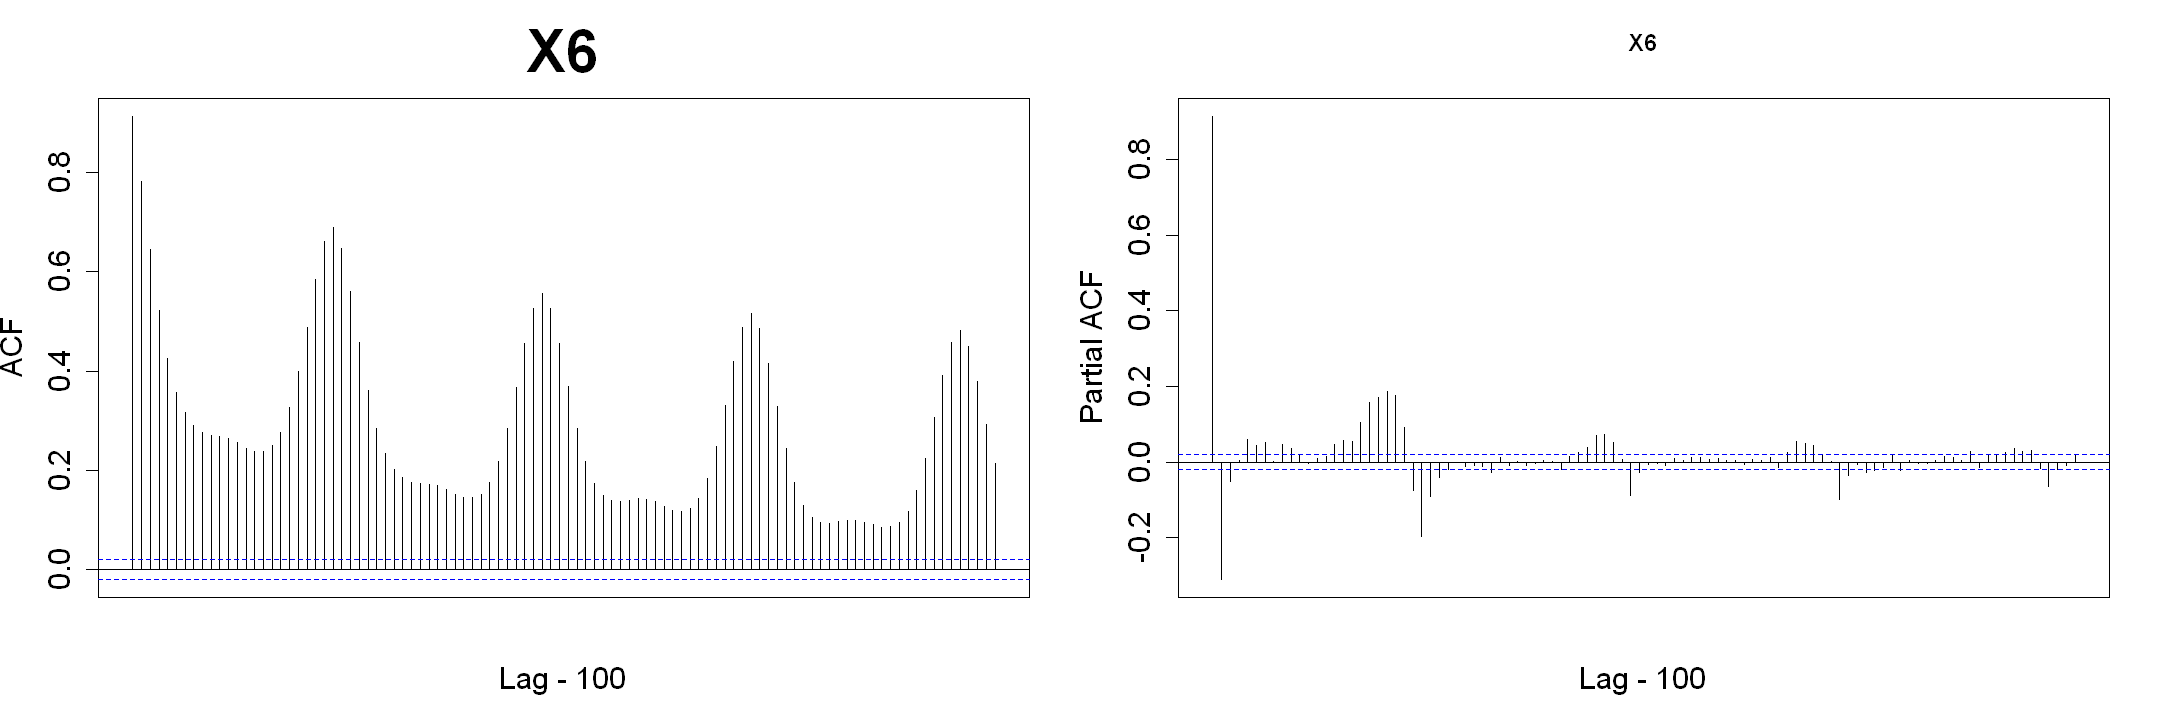

In [43]:
TS_X6 = ts(DF_STUDY_HORA[,8],start=c(1,19), frequency=24)

options(repr.plot.width=18, repr.plot.height=6) #pacote repr
par(mfrow=c(1,2))
acf(TS_X6, cex.lab=1.5, cex.axis=1.5, cex.main=3, main='X6', lag.max=100, xaxt='n', xlab='Lag - 100')
pacf(TS_X6, cex.lab=1.5, cex.axis=1.5, cex.main=3, main='X6', lag.max=100, xaxt='n', xlab='Lag - 100')

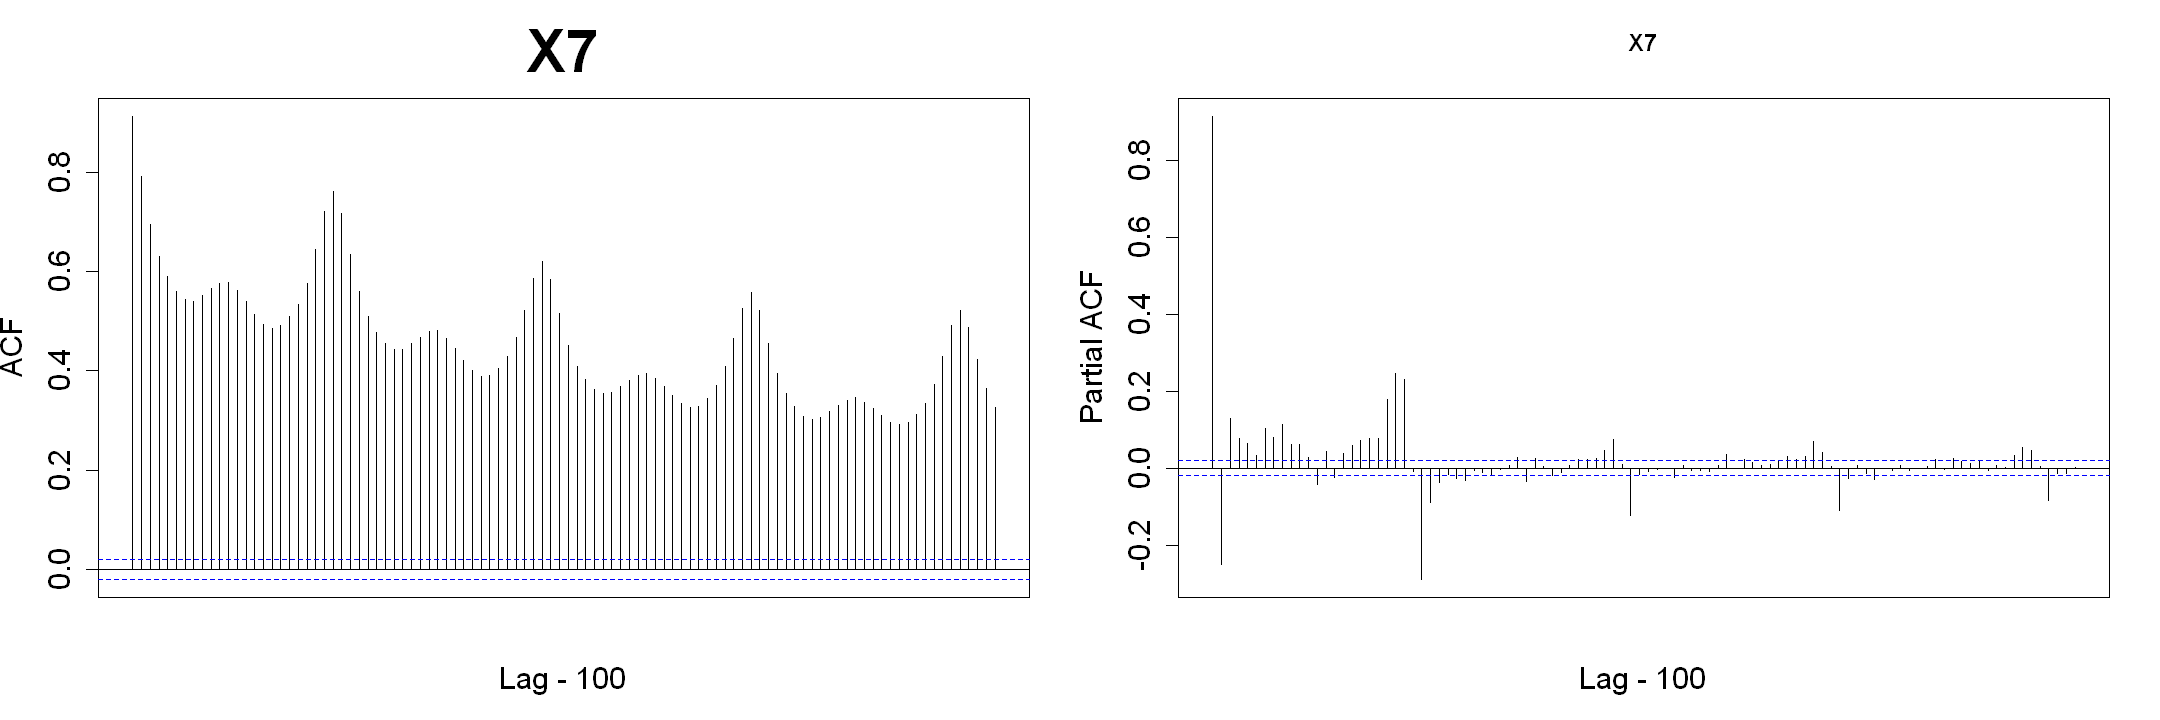

In [44]:
TS_X7 = ts(DF_STUDY_HORA[,9],start=c(1,19), frequency=24)

options(repr.plot.width=18, repr.plot.height=6) #pacote repr
par(mfrow=c(1,2))
acf(TS_X7, cex.lab=1.5, cex.axis=1.5, cex.main=3, main='X7', lag.max=100,xaxt='n', xlab='Lag - 100')
pacf(TS_X7, cex.lab=1.5, cex.axis=1.5, cex.main=3, main='X7', lag.max=100,xaxt='n', xlab='Lag - 100')

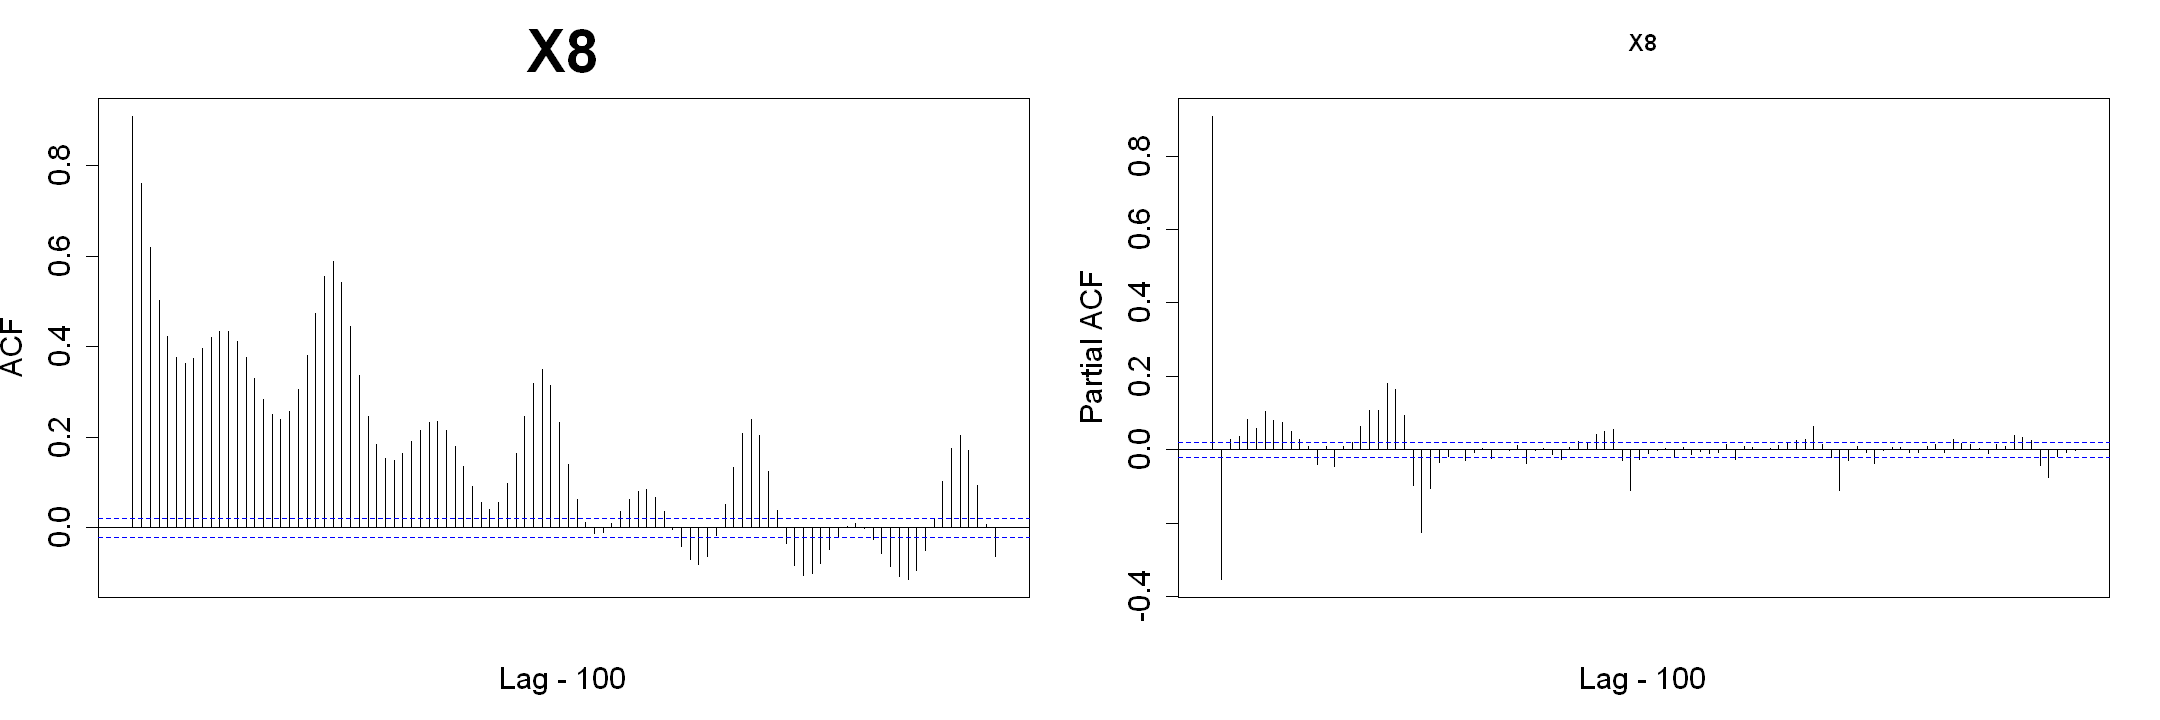

In [45]:
TS_X8 = ts(DF_STUDY_HORA[,10],start=c(1,19), frequency=24)

options(repr.plot.width=18, repr.plot.height=6) #pacote repr
par(mfrow=c(1,2))
acf(TS_X8, cex.lab=1.5, cex.axis=1.5, cex.main=3, main='X8', lag.max=100,xaxt='n', xlab='Lag - 100')
pacf(TS_X8, cex.lab=1.5, cex.axis=1.5, cex.main=3, main='X8', lag.max=100,xaxt='n', xlab='Lag - 100')

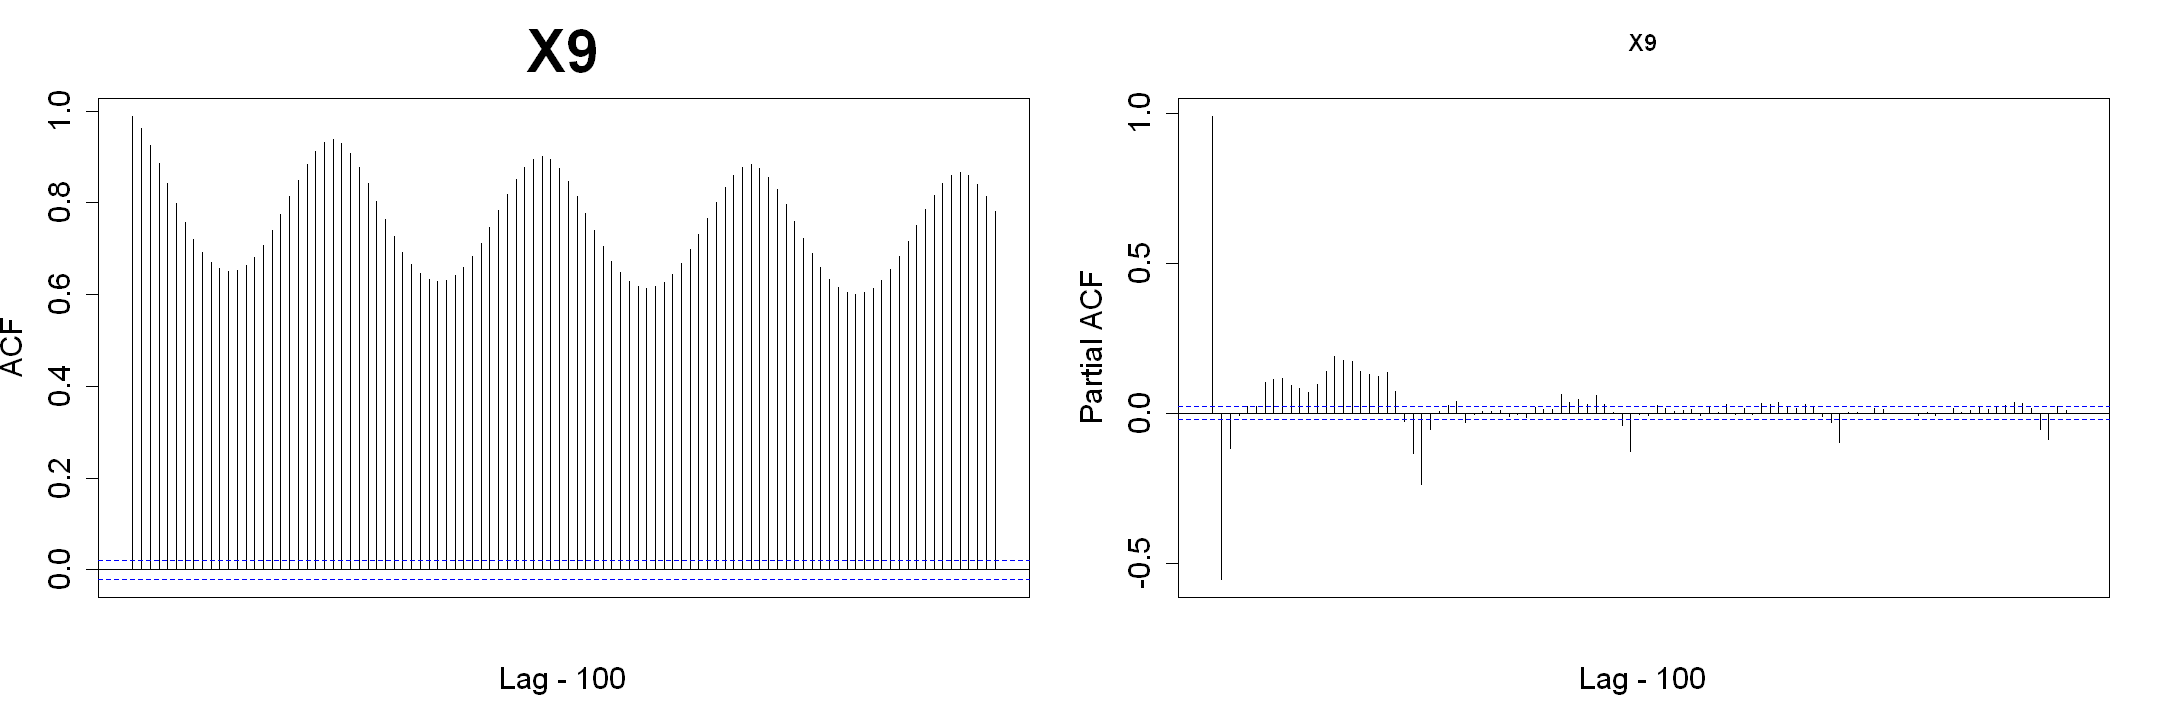

In [46]:
TS_X9 = ts(DF_STUDY_HORA[,11],start=c(1,19), frequency=24)

options(repr.plot.width=18, repr.plot.height=6) #pacote repr
par(mfrow=c(1,2))
acf(TS_X9, cex.lab=1.5, cex.axis=1.5, cex.main=3, main='X9', lag.max=100,xaxt='n', xlab='Lag - 100')
pacf(TS_X9, cex.lab=1.5, cex.axis=1.5, cex.main=3, main='X9', lag.max=100,xaxt='n', xlab='Lag - 100')

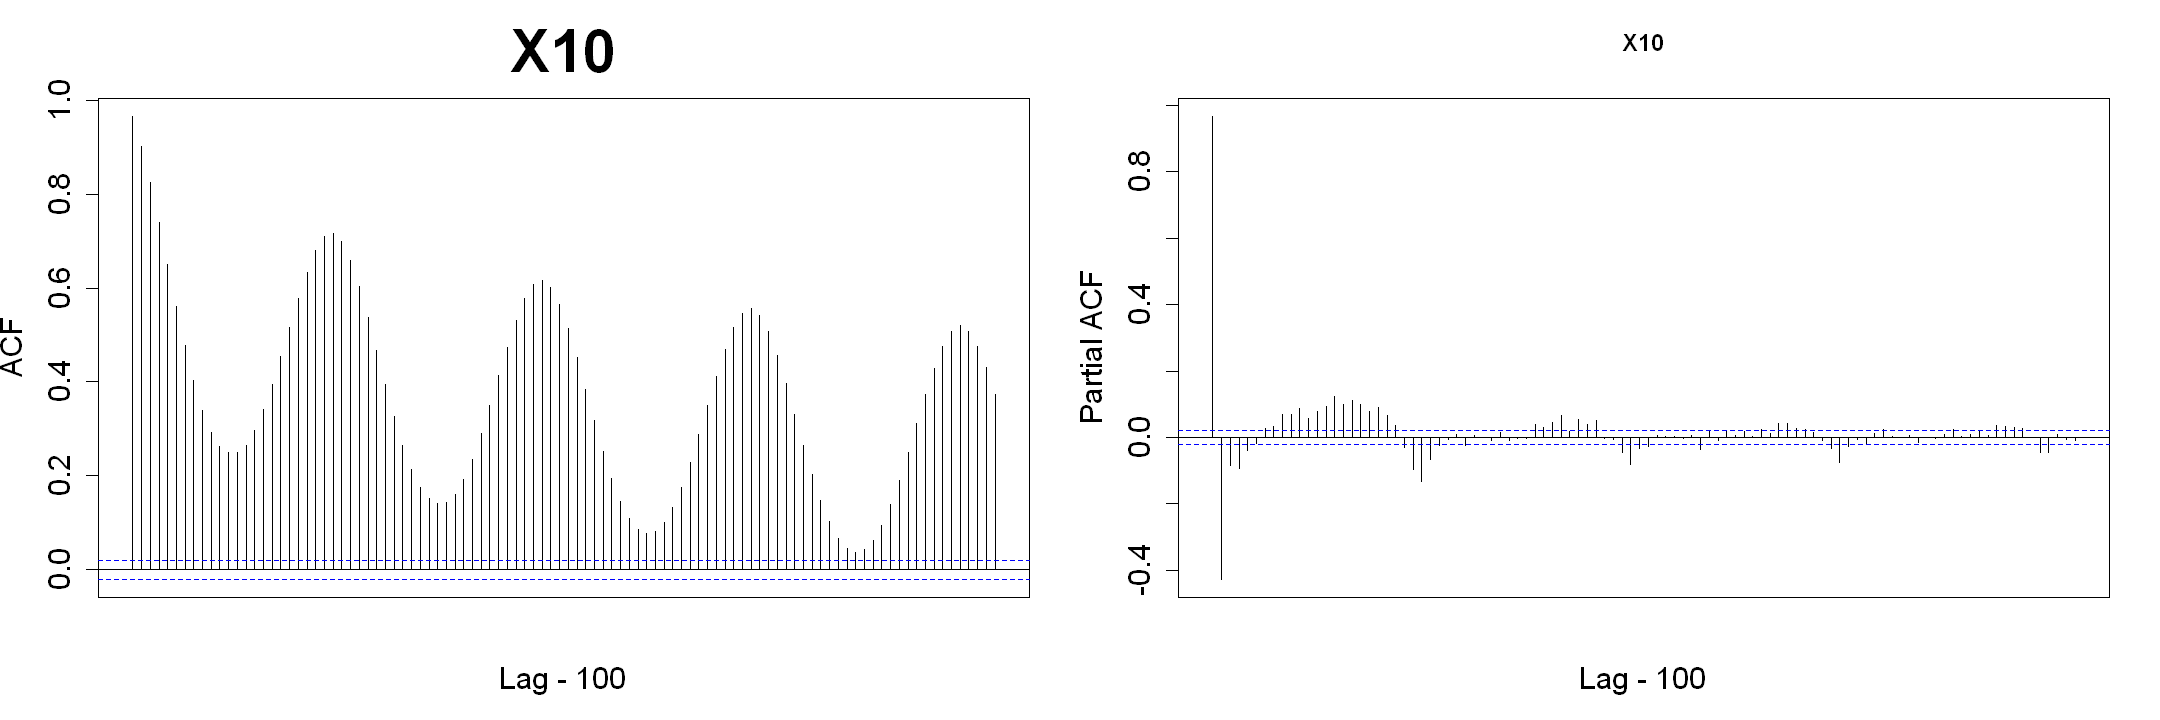

In [47]:
TS_X10 = ts(DF_STUDY_HORA[,12],start=c(1,19), frequency=24)

options(repr.plot.width=18, repr.plot.height=6) #pacote repr
par(mfrow=c(1,2))
acf(TS_X10, cex.lab=1.5, cex.axis=1.5, cex.main=3, main='X10', lag.max=100,xaxt='n', xlab='Lag - 100')
pacf(TS_X10, cex.lab=1.5, cex.axis=1.5, cex.main=3, main='X10', lag.max=100,xaxt='n', xlab='Lag - 100')

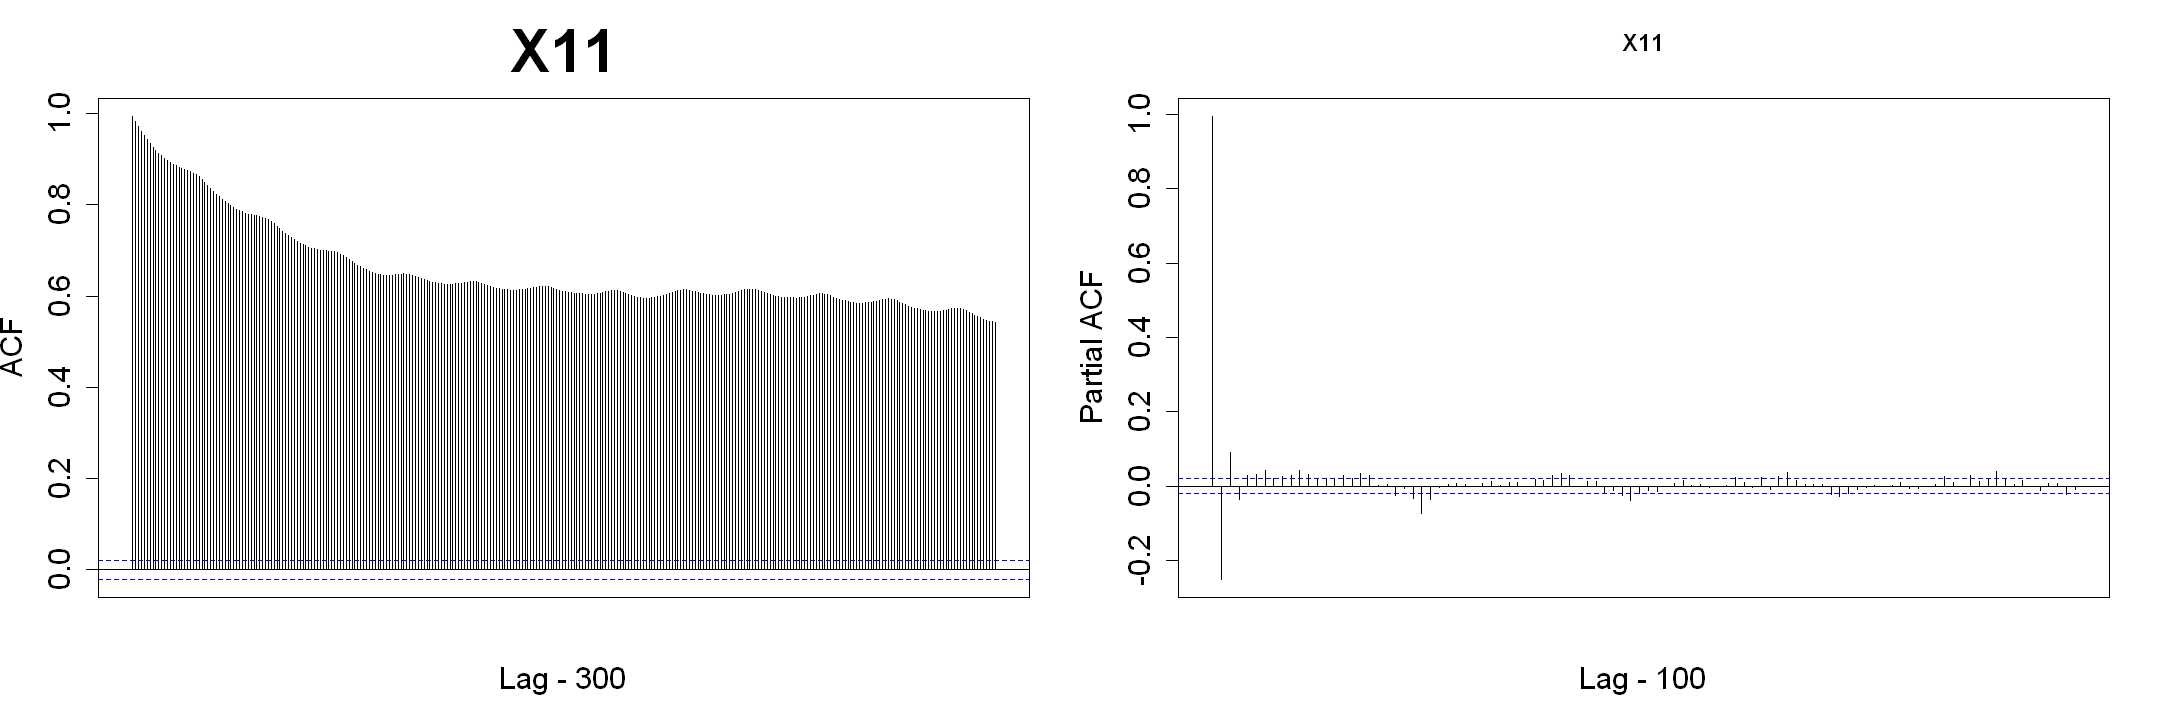

In [48]:
TS_X11 = ts(DF_STUDY_HORA[,13],start=c(1,19), frequency=24)

options(repr.plot.width=18, repr.plot.height=6) #pacote repr
par(mfrow=c(1,2))
acf(TS_X11, cex.lab=1.5, cex.axis=1.5, cex.main=3, main='X11', lag.max=300,xaxt='n', xlab='Lag - 300')
pacf(TS_X11, cex.lab=1.5, cex.axis=1.5, cex.main=3, main='X11', lag.max=100,xaxt='n', xlab='Lag - 100')

#Obs: Coloquei mais lags no ACF para poder ver o efeito de sazonalidade.

## Seção 13 - Ajustando modelos aos dados (informação hora a hora)

### Seção 13.1 - Ajustando modelo de regressão linear múltiplo

In [49]:
# Dados com formato hora - Base completa
DF_REG_FULL = data.frame(DF_STUDY_HORA, HORA=as.factor(substr(DF_STUDY_HORA[,1],12,13)))

# Divisão das bases

# Base para estimação dos modelos (TRAIN DATASET) - Dias 2004-03-10 a 2005-04-02
DF_REG = DF_REG_FULL[!(substr(DF_REG_FULL$DATE_TIME,1,10)=='2005-04-03' | substr(DF_REG_FULL$DATE_TIME,1,10)=='2005-04-04'), ]

# Base para predição dos modelos (TEST DATASET) - Dias 2005-04-03
DF_TEST = DF_REG_FULL[(substr(DF_REG_FULL$DATE_TIME,1,10)=='2005-04-03' | DF_REG_FULL$DATE_TIME == '2005-04-02 23:00:00'), ]

# Obs: Dividi o conjunto de dados em 2 partes, conjunto de estimação (train dataset) e o conjunto de teste 
# dos modelos (test dataset), pois preciso mostrar a precisão (acurácia) dos modelos.

# Obs: No conjunto para predição, adicionei a hora 23 do dia 2005-04-02, pois vou precisar dela para alguns modelo que
# solicitam o uso de diferença para transformar as variáveis. Contudo, ainda sim será feita a predição somente
# para as 24 do dia 2005-04-03.

In [50]:
# Modelo 1 - Apenas as variáveis numéricas e sem transformação da resposta

formula1 = paste('Y',paste(paste('X',2:11,sep='') ,collapse='+'),sep='~') #formula para o modelo

m1 = lm(formula1, data = DF_REG) #modelo de regressão

# Significância dos parâmetros
summary(m1)



Call:
lm(formula = formula1, data = DF_REG)

Residuals:
    Min      1Q  Median      3Q     Max 
-454.47  -49.35   -3.01   45.79  369.96 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 626.281361  18.808747  33.297   <2e-16 ***
X2            5.894500   0.672794   8.761   <2e-16 ***
X3           -0.004816   0.023803  -0.202    0.840    
X4            0.006872   0.008510   0.807    0.419    
X5           -0.122755   0.007034 -17.451   <2e-16 ***
X6            0.323082   0.034094   9.476   <2e-16 ***
X7            0.212896   0.007900  26.949   <2e-16 ***
X8            0.199476   0.005217  38.238   <2e-16 ***
X9           -0.335824   0.339419  -0.989    0.322    
X10           1.337809   0.129456  10.334   <2e-16 ***
X11         -87.094337   6.297086 -13.831   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 75.17 on 9307 degrees of freedom
Multiple R-squared:  0.8816,	Adjusted R-squared:  0.8815 
F-

In [51]:
# Diagnósticos do modelo m1

# Resíduos
RES_m1 = m1$res

# Teste de Durbin-Watson para autocorrelação dos resíduos
car::durbinWatsonTest(m1) #versão 1
lmtest::dwtest(RES_m1~1) # versão 2

# Outros testes para autocorrelação dos resíduos
stats::Box.test(RES_m1, lag = 1, type = "Ljung-Box") #teste de Ljung-Box
lmtest::bgtest(RES_m1~1) #teste de Breusch-Godfrey

# Tetes para estacionáridade da série
tseries::kpss.test(RES_m1) #Teste de Kwiatkowski-Phillips-Schmidt-Shin
tseries::adf.test(RES_m1) #Teste de Dickey-Fuller 

# Teste de Kolmogorov-Smirnov para normalidade dos resíduos.
ks.test(RES_m1, pnorm, 0, sd(RES_m1)) # Veja que o teste foi significativo e com isso o modelo não é adequado.


 lag Autocorrelation D-W Statistic p-value
   1        0.913815     0.1718005       0
 Alternative hypothesis: rho != 0


	Durbin-Watson test

data:  RES_m1 ~ 1
DW = 0.1718, p-value < 2.2e-16
alternative hypothesis: true autocorrelation is greater than 0



	Box-Ljung test

data:  RES_m1
X-squared = 7783.6, df = 1, p-value < 2.2e-16



	Breusch-Godfrey test for serial correlation of order up to 1

data:  RES_m1 ~ 1
LM test = 7782.1, df = 1, p-value < 2.2e-16


Warning message in tseries::kpss.test(RES_m1):
"p-value smaller than printed p-value"



	KPSS Test for Level Stationarity

data:  RES_m1
KPSS Level = 3.7082, Truncation lag parameter = 12, p-value = 0.01


Warning message in tseries::adf.test(RES_m1):
"p-value smaller than printed p-value"



	Augmented Dickey-Fuller Test

data:  RES_m1
Dickey-Fuller = -7.2, Lag order = 21, p-value = 0.01
alternative hypothesis: stationary



	One-sample Kolmogorov-Smirnov test

data:  RES_m1
D = 0.027135, p-value = 2.196e-06
alternative hypothesis: two-sided


[1] 6161   98

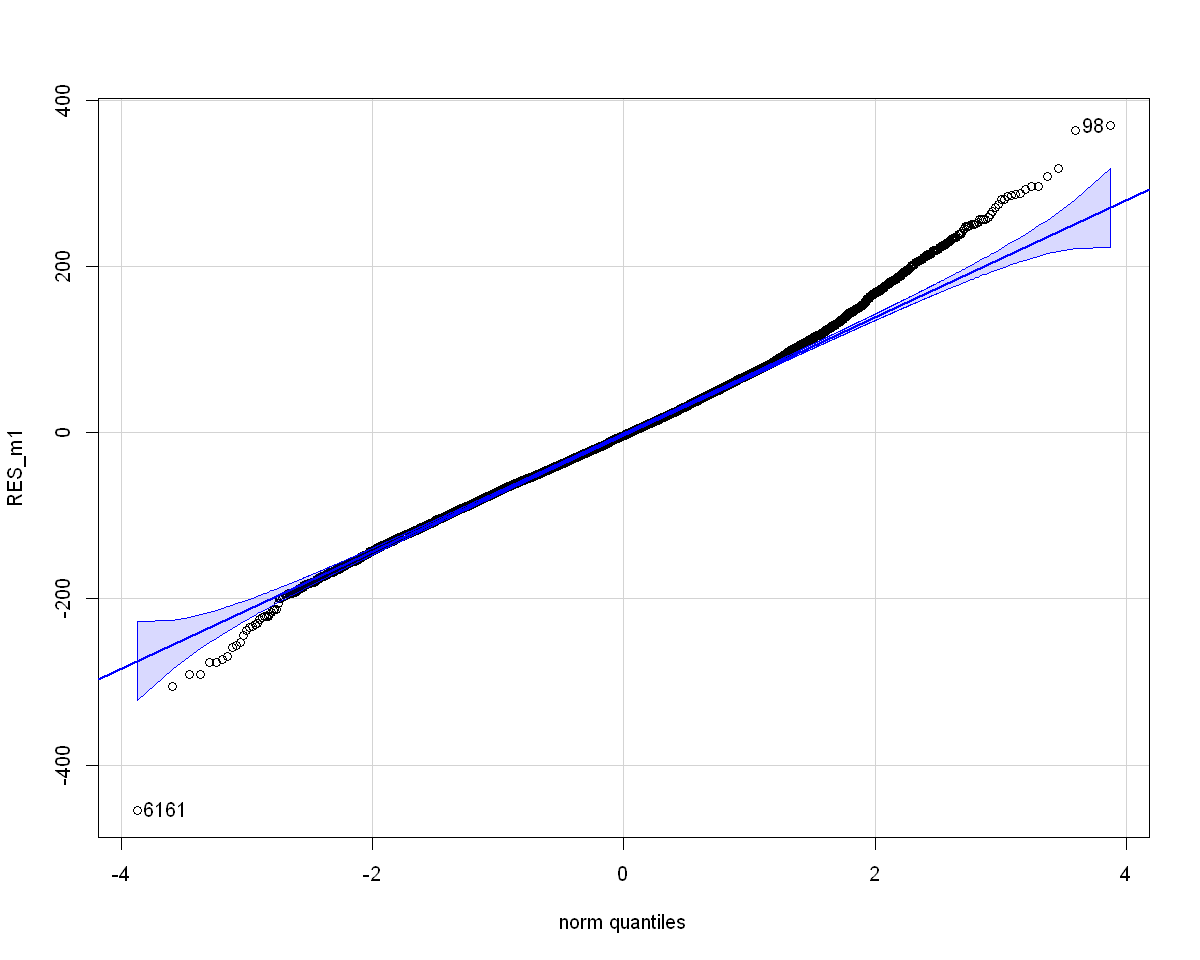

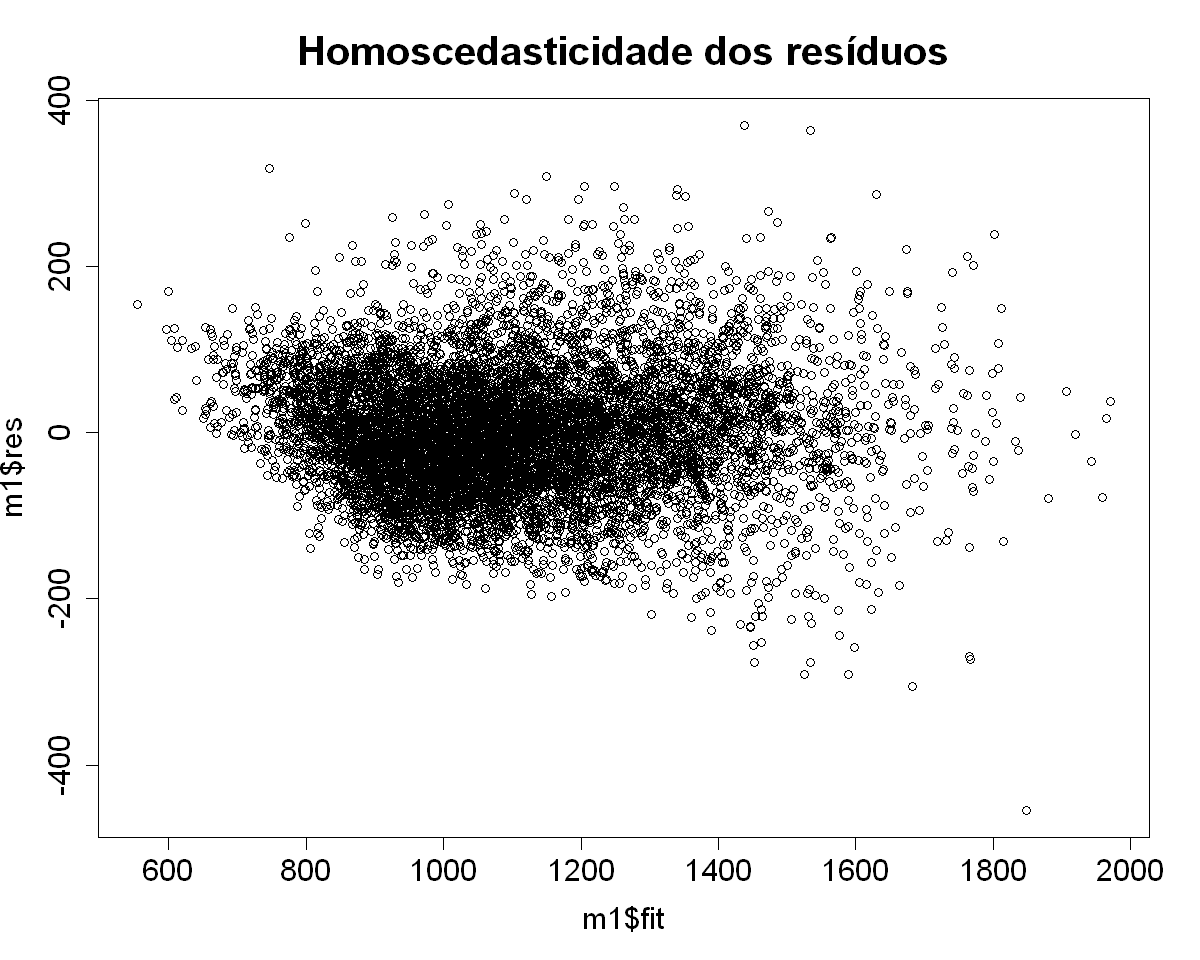

In [52]:
# Gráfico de normalidade dos resíduos com envelope simulado
options(repr.plot.width=10, repr.plot.height=8) #pacote repr
car::qqPlot(RES_m1)

# Gráfico para verificar Homocedasticidade dos Resíduos
options(repr.plot.width=10, repr.plot.height=8) #pacote repr
plot(m1$fit, m1$res, main = 'Homoscedasticidade dos resíduos', cex.lab=1.5, cex.axis=1.5, cex.main=2)

#Gráfico meio-normal
#options(repr.plot.width=10, repr.plot.height=8) #pacote repr
#hnp::hnp(m1, main='Gráfico meio normal', cex.lab=1.5, cex.axis=1.5, cex.main=2)


In [53]:
# Modelo 2 - Apenas as variáveis numéricas e transformação da resposta

formula2 = paste('log(Y)',paste(paste('X',2:11,sep='') ,collapse='+'),sep='~') #formula para o modelo

m2 = lm(formula2, data = DF_REG) #modelo de regressão

# Significância dos parâmetros
summary(m2)


Call:
lm(formula = formula2, data = DF_REG)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.23470 -0.04331 -0.00151  0.04197  0.34406 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.401e+00  1.651e-02 387.755  < 2e-16 ***
X2          -5.179e-03  5.905e-04  -8.771  < 2e-16 ***
X3           3.298e-04  2.089e-05  15.789  < 2e-16 ***
X4          -4.034e-05  7.469e-06  -5.401  6.8e-08 ***
X5          -1.216e-04  6.174e-06 -19.702  < 2e-16 ***
X6           3.859e-04  2.992e-05  12.897  < 2e-16 ***
X7           1.567e-04  6.933e-06  22.597  < 2e-16 ***
X8           1.611e-04  4.579e-06  35.193  < 2e-16 ***
X9           1.341e-04  2.979e-04   0.450    0.653    
X10          1.541e-03  1.136e-04  13.564  < 2e-16 ***
X11         -7.420e-02  5.527e-03 -13.425  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.06598 on 9307 degrees of freedom
Multiple R-squared:  0.8823,	Adjusted R-squared:

In [54]:
# Diagnósticos do modelo m2

# Resíduos
RES_m2 = m2$res

# Teste de Durbin-Watson para autocorrelação dos resíduos
car::durbinWatsonTest(m2) #versão 1
lmtest::dwtest(RES_m2~1) # versão 2

# Outros testes para autocorrelação dos resíduos
stats::Box.test(RES_m2, lag = 1, type = "Ljung-Box") #teste de Ljung-Box
lmtest::bgtest(RES_m2~1) #teste de Breusch-Godfrey

# Tetes para estacionáridade da série
tseries::kpss.test(RES_m2) #Teste de Kwiatkowski-Phillips-Schmidt-Shin
tseries::adf.test(RES_m2) #Teste de Dickey-Fuller 

# Teste de Kolmogorov-Smirnov para normalidade dos resíduos.
ks.test(RES_m2, pnorm, 0, sd(RES_m2)) # Veja que o teste foi significativo e com isso o modelo não é adequado.


 lag Autocorrelation D-W Statistic p-value
   1       0.9259312     0.1475476       0
 Alternative hypothesis: rho != 0


	Durbin-Watson test

data:  RES_m2 ~ 1
DW = 0.14755, p-value < 2.2e-16
alternative hypothesis: true autocorrelation is greater than 0



	Box-Ljung test

data:  RES_m2
X-squared = 7991.3, df = 1, p-value < 2.2e-16



	Breusch-Godfrey test for serial correlation of order up to 1

data:  RES_m2 ~ 1
LM test = 7990, df = 1, p-value < 2.2e-16


Warning message in tseries::kpss.test(RES_m2):
"p-value smaller than printed p-value"



	KPSS Test for Level Stationarity

data:  RES_m2
KPSS Level = 3.8264, Truncation lag parameter = 12, p-value = 0.01


Warning message in tseries::adf.test(RES_m2):
"p-value smaller than printed p-value"



	Augmented Dickey-Fuller Test

data:  RES_m2
Dickey-Fuller = -7.1798, Lag order = 21, p-value = 0.01
alternative hypothesis: stationary



	One-sample Kolmogorov-Smirnov test

data:  RES_m2
D = 0.014985, p-value = 0.03046
alternative hypothesis: two-sided


[1] 12 13

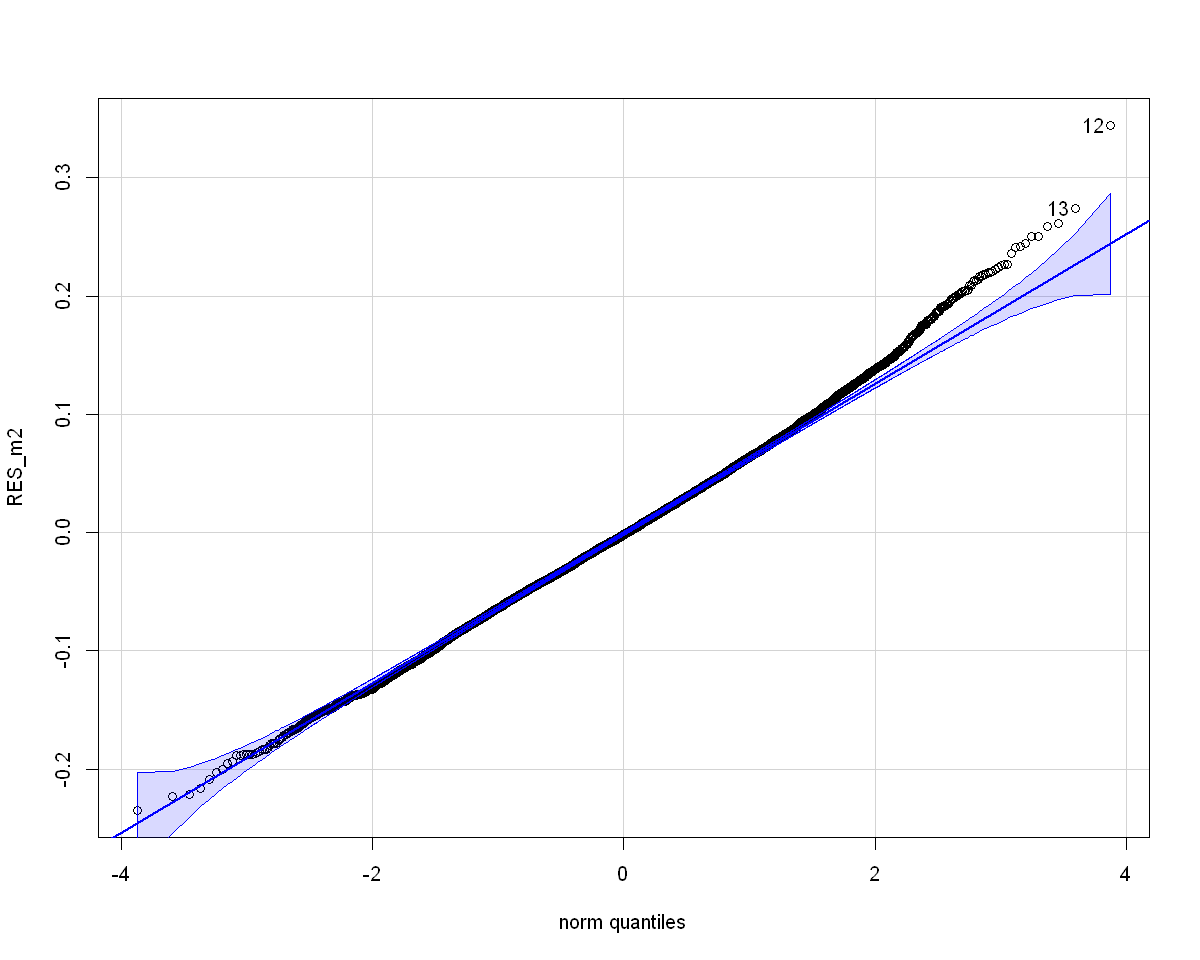

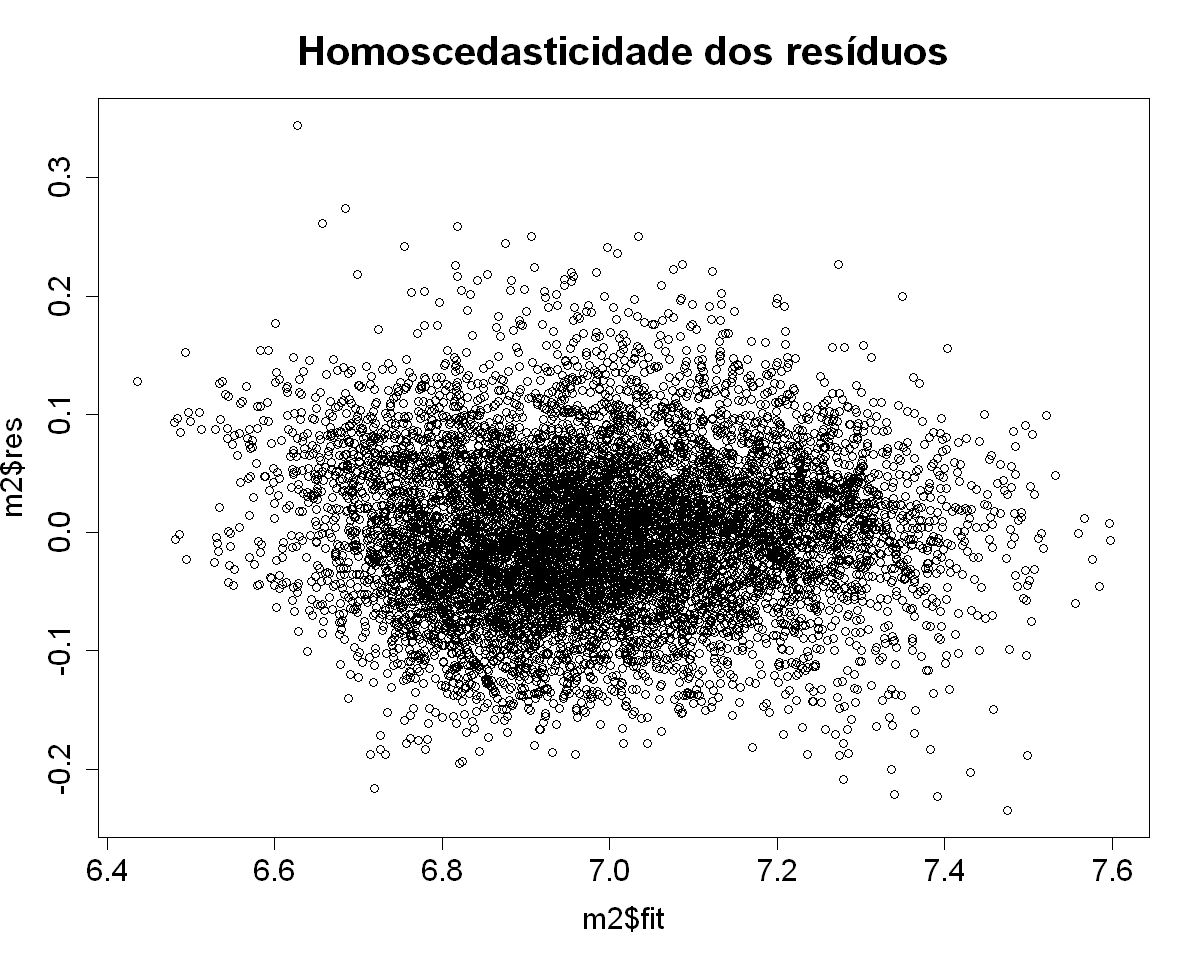

In [55]:
# Gráfico de normalidade dos resíduos com envelope simulado
options(repr.plot.width=10, repr.plot.height=8) #pacote repr
car::qqPlot(RES_m2)

# Gráfico para verificar Homocedasticidade dos Resíduos
options(repr.plot.width=10, repr.plot.height=8) #pacote repr
plot(m2$fit, m2$res, main = 'Homoscedasticidade dos resíduos', cex.lab=1.5, cex.axis=1.5, cex.main=2)

#Gráfico meio-normal
#options(repr.plot.width=10, repr.plot.height=8) #pacote repr
#hnp::hnp(m2, main='Gráfico meio normal', cex.lab=1.5, cex.axis=1.5, cex.main=2)


In [56]:
# Modelo 3 - Apenas as variáveis numéricas, inclusão da variável hora e sem transformação da resposta

formula3 = paste('Y',paste(paste(paste('X',2:11,sep=''), collapse='+'),'HORA',sep='+'),sep='~') #formula para o modelo

m3 = lm(formula3, data = DF_REG) #modelo de regressão

# Significância dos parâmetros
summary(m3)



Call:
lm(formula = formula3, data = DF_REG)

Residuals:
    Min      1Q  Median      3Q     Max 
-462.55  -46.54   -4.04   41.78  343.43 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 726.010356  18.459673  39.330  < 2e-16 ***
X2           11.911170   0.672307  17.717  < 2e-16 ***
X3           -0.304927   0.024198 -12.601  < 2e-16 ***
X4           -0.029537   0.008081  -3.655 0.000259 ***
X5           -0.112280   0.006577 -17.072  < 2e-16 ***
X6            0.159374   0.032501   4.904 9.57e-07 ***
X7            0.238124   0.007447  31.974  < 2e-16 ***
X8            0.270758   0.005335  50.755  < 2e-16 ***
X9           -1.351878   0.324905  -4.161 3.20e-05 ***
X10           1.809639   0.122799  14.737  < 2e-16 ***
X11         -77.943663   5.943098 -13.115  < 2e-16 ***
HORA01      -17.358195   5.021148  -3.457 0.000549 ***
HORA02      -33.836003   5.086246  -6.652 3.05e-11 ***
HORA03      -44.625740   5.178985  -8.617  < 2e-16 ***
HORA04      -51.38388

In [57]:
# Diagnósticos do modelo m3

# Resíduos
RES_m3 = m3$res

# Teste de Durbin-Watson para autocorrelação dos resíduos
car::durbinWatsonTest(m3) #versão 1
lmtest::dwtest(RES_m3~1) # versão 2

# Outros testes para autocorrelação dos resíduos
stats::Box.test(RES_m3, lag = 1, type = "Ljung-Box") #teste de Ljung-Box
lmtest::bgtest(RES_m3~1) #teste de Breusch-Godfrey

# Tetes para estacionáridade da série
tseries::kpss.test(RES_m3) #Teste de Kwiatkowski-Phillips-Schmidt-Shin
tseries::adf.test(RES_m3) #Teste de Dickey-Fuller 

# Teste de Kolmogorov-Smirnov para normalidade dos resíduos.
ks.test(RES_m3, pnorm, 0, sd(RES_m3)) # Veja que o teste foi significativo e com isso o modelo não é adequado.


 lag Autocorrelation D-W Statistic p-value
   1       0.8942438     0.2111245       0
 Alternative hypothesis: rho != 0


	Durbin-Watson test

data:  RES_m3 ~ 1
DW = 0.21112, p-value < 2.2e-16
alternative hypothesis: true autocorrelation is greater than 0



	Box-Ljung test

data:  RES_m3
X-squared = 7453.7, df = 1, p-value < 2.2e-16



	Breusch-Godfrey test for serial correlation of order up to 1

data:  RES_m3 ~ 1
LM test = 7452.4, df = 1, p-value < 2.2e-16


Warning message in tseries::kpss.test(RES_m3):
"p-value smaller than printed p-value"



	KPSS Test for Level Stationarity

data:  RES_m3
KPSS Level = 2.9715, Truncation lag parameter = 12, p-value = 0.01


Warning message in tseries::adf.test(RES_m3):
"p-value smaller than printed p-value"



	Augmented Dickey-Fuller Test

data:  RES_m3
Dickey-Fuller = -7.6301, Lag order = 21, p-value = 0.01
alternative hypothesis: stationary



	One-sample Kolmogorov-Smirnov test

data:  RES_m3
D = 0.029177, p-value = 2.577e-07
alternative hypothesis: two-sided


[1] 6161   98

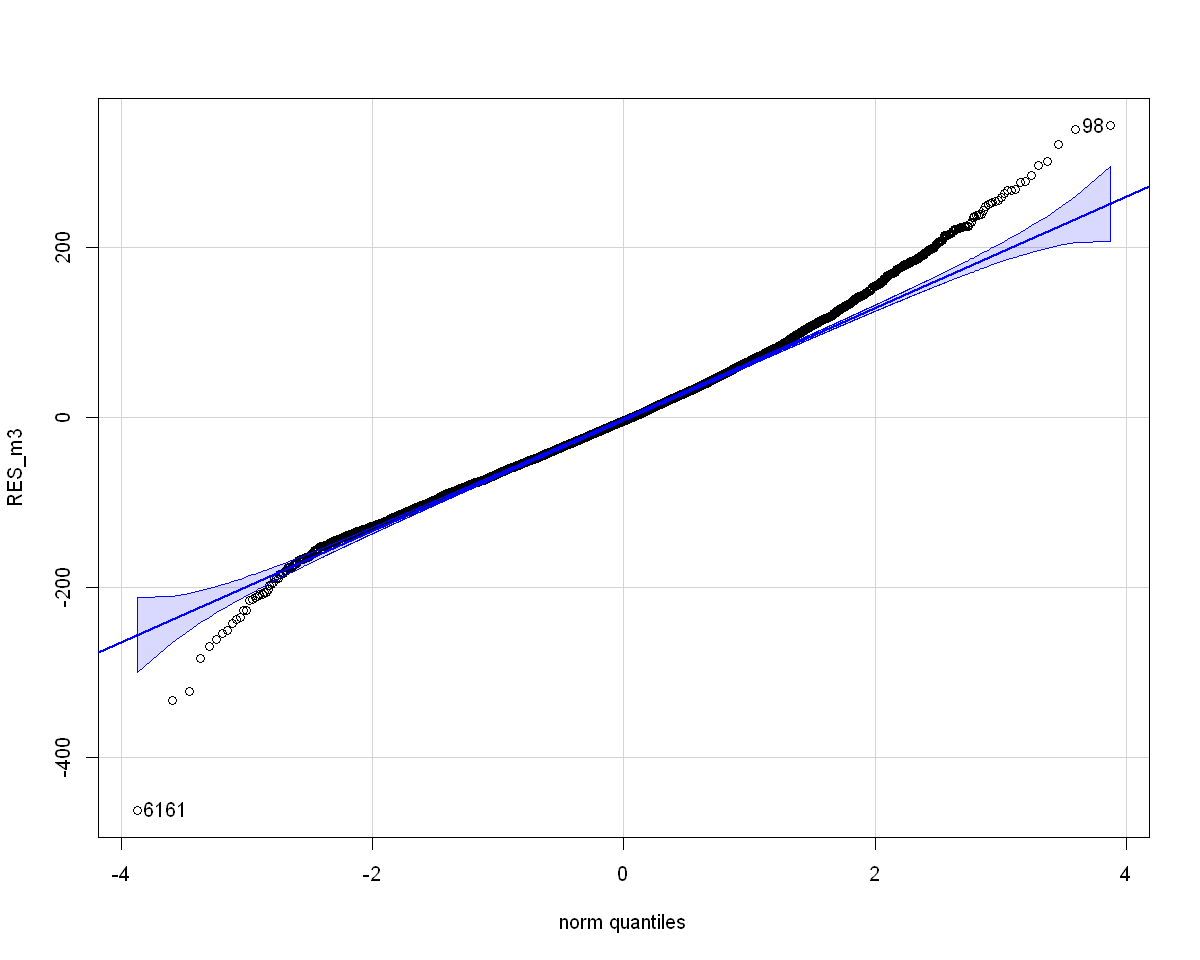

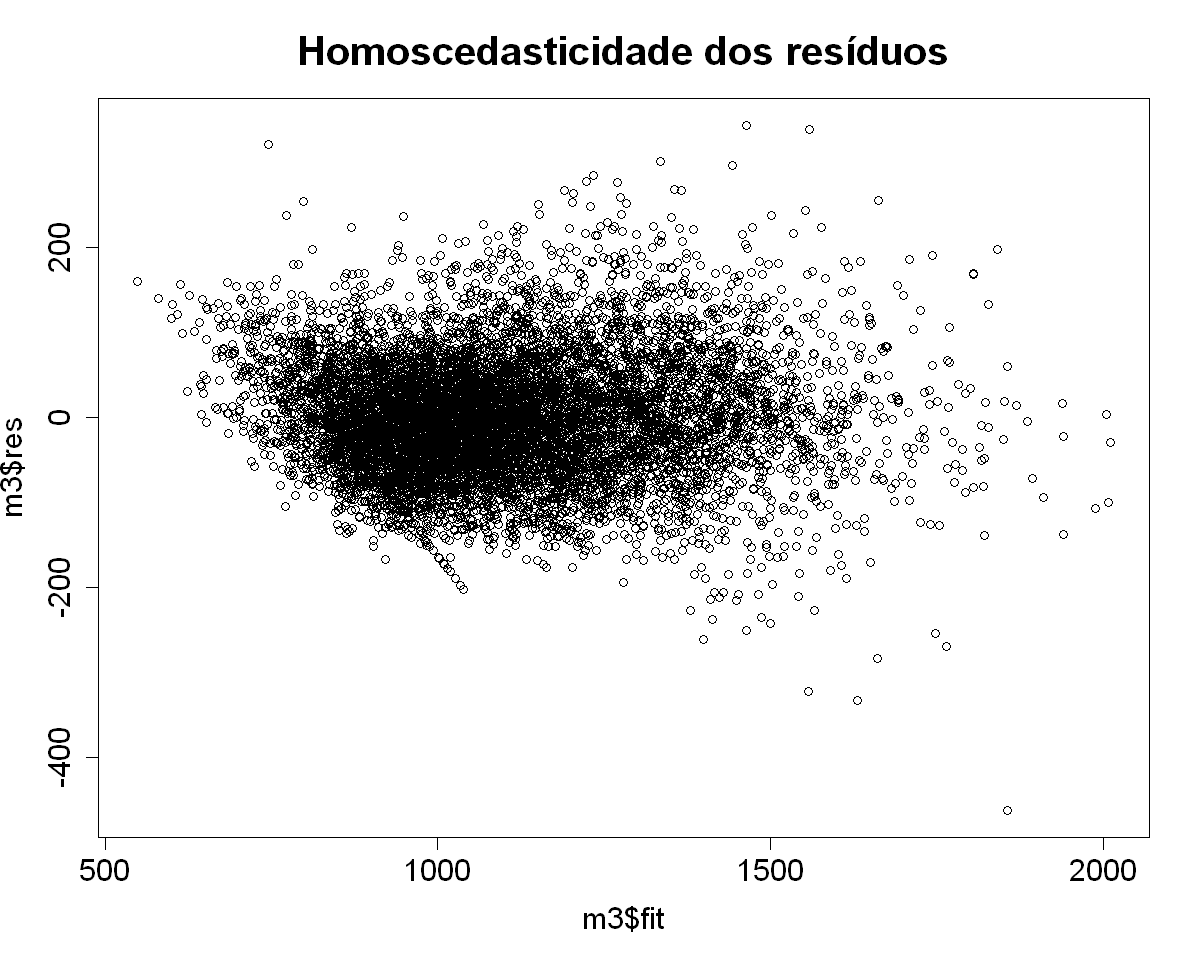

In [58]:
# Gráfico de normalidade dos resíduos com envelope simulado
options(repr.plot.width=10, repr.plot.height=8) #pacote repr
car::qqPlot(RES_m3)

# Gráfico para verificar Homocedasticidade dos Resíduos
options(repr.plot.width=10, repr.plot.height=8) #pacote repr
plot(m3$fit, m3$res, main = 'Homoscedasticidade dos resíduos', cex.lab=1.5, cex.axis=1.5, cex.main=2)

#Gráfico meio-normal
#options(repr.plot.width=10, repr.plot.height=8) #pacote repr
#hnp::hnp(m3, main='Gráfico meio normal', cex.lab=1.5, cex.axis=1.5, cex.main=2)


In [59]:
# Modelo 4 - Apenas as variáveis numéricas, inclusão da variável hora e sem transformação da resposta

formula4 = paste('log(Y)',paste(paste(paste('X',2:11,sep=''), collapse='+'),'HORA',sep='+'),sep='~') #formula para o modelo

m4 = lm(formula4, data = DF_REG) #modelo de regressão

# Significância dos parâmetros
summary(m4)



Call:
lm(formula = formula4, data = DF_REG)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.25765 -0.04100 -0.00232  0.03939  0.34601 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.485e+00  1.634e-02 396.984  < 2e-16 ***
X2          -3.800e-05  5.949e-04  -0.064 0.949067    
X3           7.761e-05  2.141e-05   3.624 0.000291 ***
X4          -7.248e-05  7.151e-06 -10.135  < 2e-16 ***
X5          -1.124e-04  5.820e-06 -19.310  < 2e-16 ***
X6           2.566e-04  2.876e-05   8.921  < 2e-16 ***
X7           1.763e-04  6.590e-06  26.747  < 2e-16 ***
X8           2.205e-04  4.721e-06  46.704  < 2e-16 ***
X9          -6.892e-04  2.875e-04  -2.397 0.016549 *  
X10          1.944e-03  1.087e-04  17.890  < 2e-16 ***
X11         -6.610e-02  5.259e-03 -12.568  < 2e-16 ***
HORA01      -1.544e-02  4.443e-03  -3.475 0.000513 ***
HORA02      -2.995e-02  4.501e-03  -6.654 3.01e-11 ***
HORA03      -3.868e-02  4.583e-03  -8.439  < 2e-16 ***
HORA04     

In [60]:
# Diagnósticos do modelo m4

# Resíduos
RES_m4 = m4$res

# Teste de Durbin-Watson para autocorrelação dos resíduos
car::durbinWatsonTest(m4) #versão 1
lmtest::dwtest(RES_m4~1) # versão 2

# Outros testes para autocorrelação dos resíduos
stats::Box.test(RES_m4, lag = 1, type = "Ljung-Box") #teste de Ljung-Box
lmtest::bgtest(RES_m4~1) #teste de Breusch-Godfrey

# Tetes para estacionáridade da série
tseries::kpss.test(RES_m4) #Teste de Kwiatkowski-Phillips-Schmidt-Shin
tseries::adf.test(RES_m4) #Teste de Dickey-Fuller 

# Teste de Kolmogorov-Smirnov para normalidade dos resíduos.
ks.test(RES_m4, pnorm, 0, sd(RES_m4)) # Veja que o teste foi significativo e com isso o modelo não é adequado.


 lag Autocorrelation D-W Statistic p-value
   1       0.9109021     0.1777736       0
 Alternative hypothesis: rho != 0


	Durbin-Watson test

data:  RES_m4 ~ 1
DW = 0.17777, p-value < 2.2e-16
alternative hypothesis: true autocorrelation is greater than 0



	Box-Ljung test

data:  RES_m4
X-squared = 7734, df = 1, p-value < 2.2e-16



	Breusch-Godfrey test for serial correlation of order up to 1

data:  RES_m4 ~ 1
LM test = 7732.9, df = 1, p-value < 2.2e-16


Warning message in tseries::kpss.test(RES_m4):
"p-value smaller than printed p-value"



	KPSS Test for Level Stationarity

data:  RES_m4
KPSS Level = 3.1283, Truncation lag parameter = 12, p-value = 0.01


Warning message in tseries::adf.test(RES_m4):
"p-value smaller than printed p-value"



	Augmented Dickey-Fuller Test

data:  RES_m4
Dickey-Fuller = -7.5617, Lag order = 21, p-value = 0.01
alternative hypothesis: stationary



	One-sample Kolmogorov-Smirnov test

data:  RES_m4
D = 0.017376, p-value = 0.007202
alternative hypothesis: two-sided


[1] 12 13

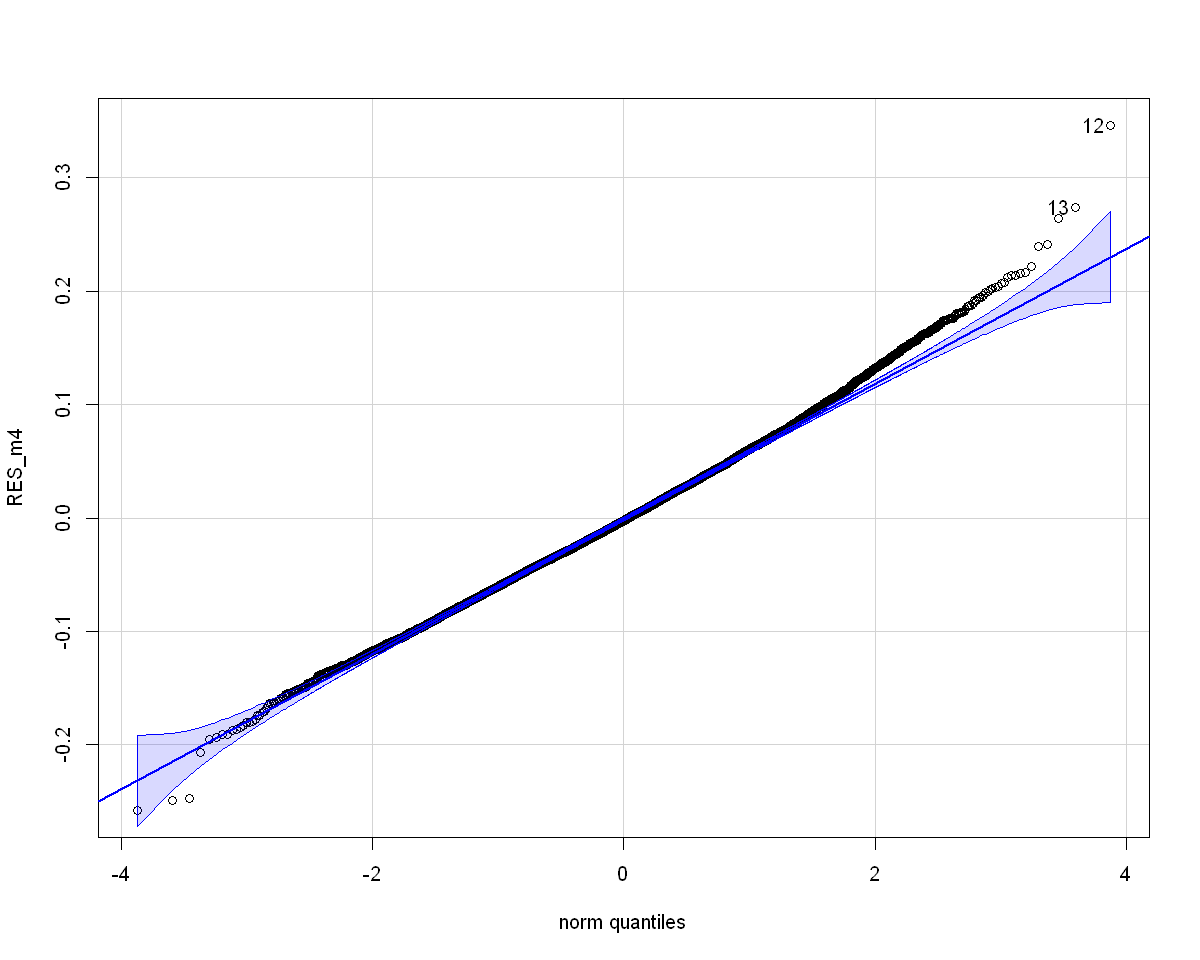

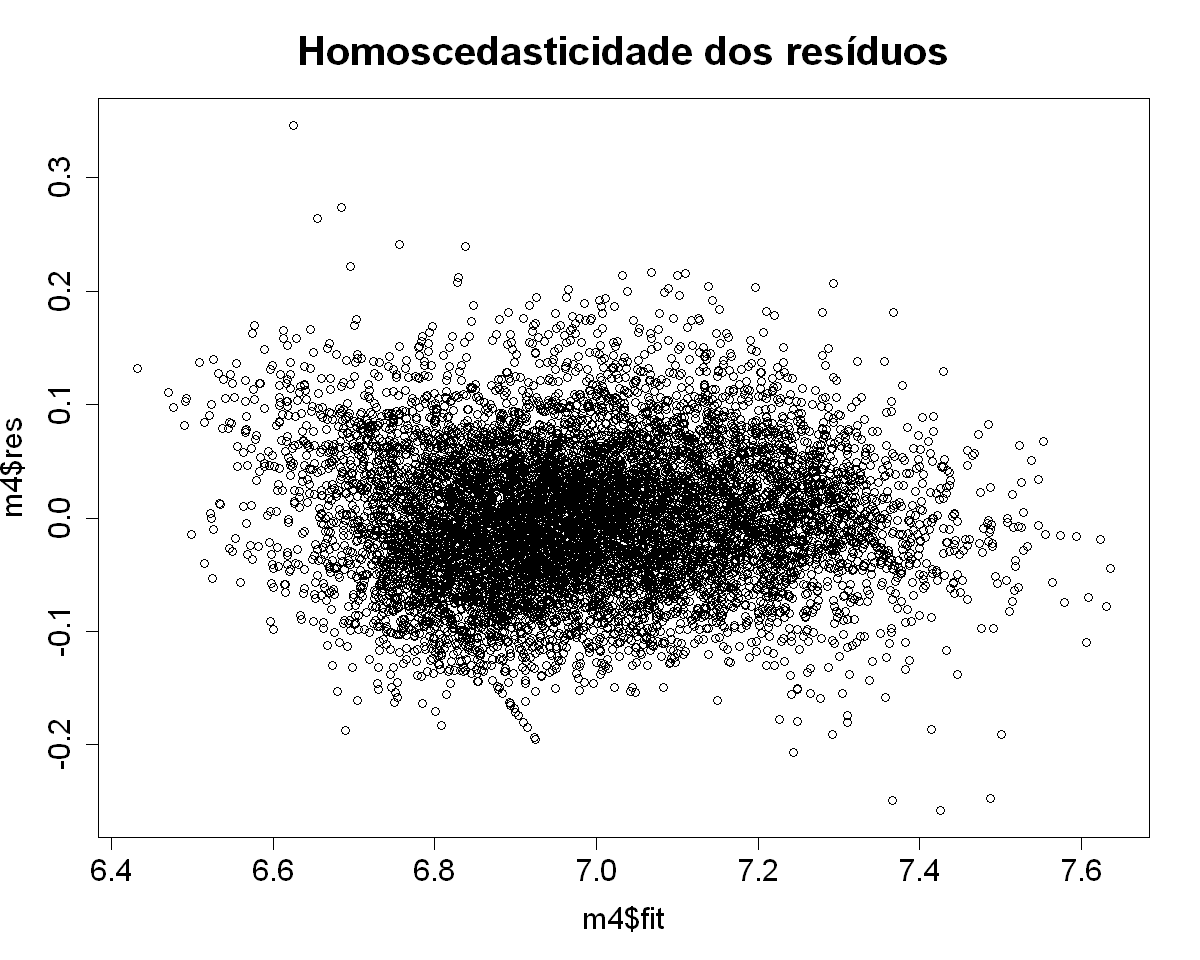

In [61]:
# Gráfico de normalidade dos resíduos com envelope simulado
options(repr.plot.width=10, repr.plot.height=8) #pacote repr
car::qqPlot(RES_m4)

# Gráfico para verificar Homocedasticidade dos Resíduos
options(repr.plot.width=10, repr.plot.height=8) #pacote repr
plot(m4$fit, m4$res, main = 'Homoscedasticidade dos resíduos', cex.lab=1.5, cex.axis=1.5, cex.main=2)

#Gráfico meio-normal
#options(repr.plot.width=10, repr.plot.height=8) #pacote repr
#hnp::hnp(m4, main='Gráfico meio normal', cex.lab=1.5, cex.axis=1.5, cex.main=2)


### Seção 13.2 - Ajustando modelo de regressão linear generalizado Gamma

Dado que observou-se uma certa relação logarítmica das variáveis e que temos grande dispersão. Então vamos tentar ajustar também um modelo linear generalizado com distribuição de probabilidade Gamma.

In [62]:
# Modelo 5 - Apenas as variáveis numéricas, sem variável HORA e função de ligação logarítimica

formula5 = paste('Y',paste(paste('X',2:11,sep='') ,collapse='+'),sep='~') #formula para o modelo

m5 = glm(formula5, family = Gamma(log), data = DF_REG) #MLG GAMMA

# Significância dos parâmetros
summary(m5)



Call:
glm(formula = formula5, family = Gamma(log), data = DF_REG)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.22292  -0.04514  -0.00363   0.04012   0.35960  

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.397e+00  1.663e-02 384.772  < 2e-16 ***
X2          -5.322e-03  5.947e-04  -8.949  < 2e-16 ***
X3           3.305e-04  2.104e-05  15.708  < 2e-16 ***
X4          -3.954e-05  7.523e-06  -5.256 1.51e-07 ***
X5          -1.191e-04  6.218e-06 -19.147  < 2e-16 ***
X6           3.872e-04  3.014e-05  12.846  < 2e-16 ***
X7           1.614e-04  6.983e-06  23.117  < 2e-16 ***
X8           1.612e-04  4.611e-06  34.961  < 2e-16 ***
X9           9.507e-05  3.000e-04   0.317    0.751    
X10          1.518e-03  1.144e-04  13.263  < 2e-16 ***
X11         -7.530e-02  5.567e-03 -13.527  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for Gamma family taken to be 0.004415805)

 

 lag Autocorrelation D-W Statistic p-value
   1       0.9262365     0.1469504       0
 Alternative hypothesis: rho != 0


	Durbin-Watson test

data:  RES_m5 ~ 1
DW = 0.14661, p-value < 2.2e-16
alternative hypothesis: true autocorrelation is greater than 0



	Box-Ljung test

data:  RES_m5
X-squared = 7999.2, df = 1, p-value < 2.2e-16



	Breusch-Godfrey test for serial correlation of order up to 1

data:  RES_m5 ~ 1
LM test = 7997.9, df = 1, p-value < 2.2e-16


Warning message in tseries::kpss.test(RES_m5):
"p-value smaller than printed p-value"



	KPSS Test for Level Stationarity

data:  RES_m5
KPSS Level = 3.8142, Truncation lag parameter = 12, p-value = 0.01


Warning message in tseries::adf.test(RES_m5):
"p-value smaller than printed p-value"



	Augmented Dickey-Fuller Test

data:  RES_m5
Dickey-Fuller = -7.2751, Lag order = 21, p-value = 0.01
alternative hypothesis: stationary


Gamma model 


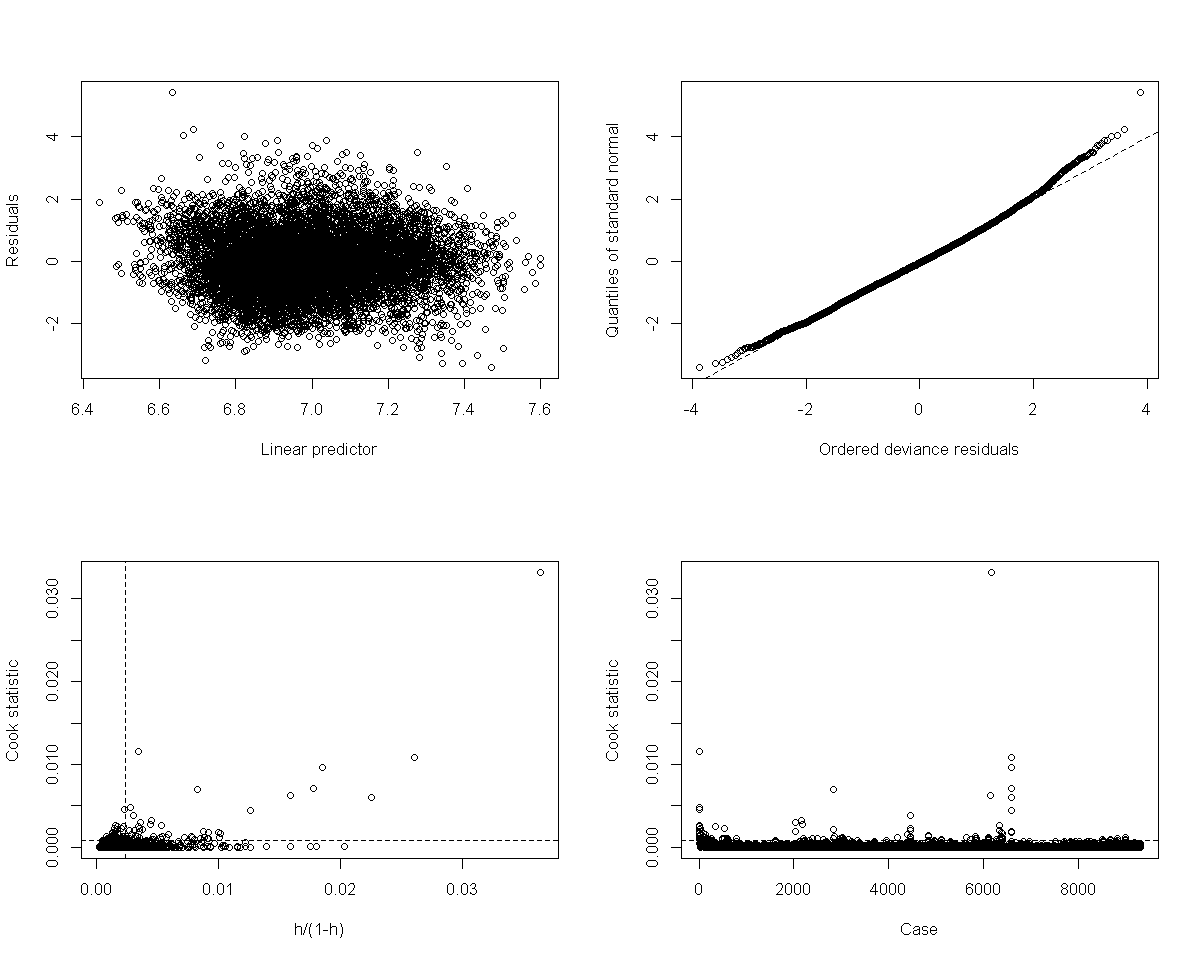

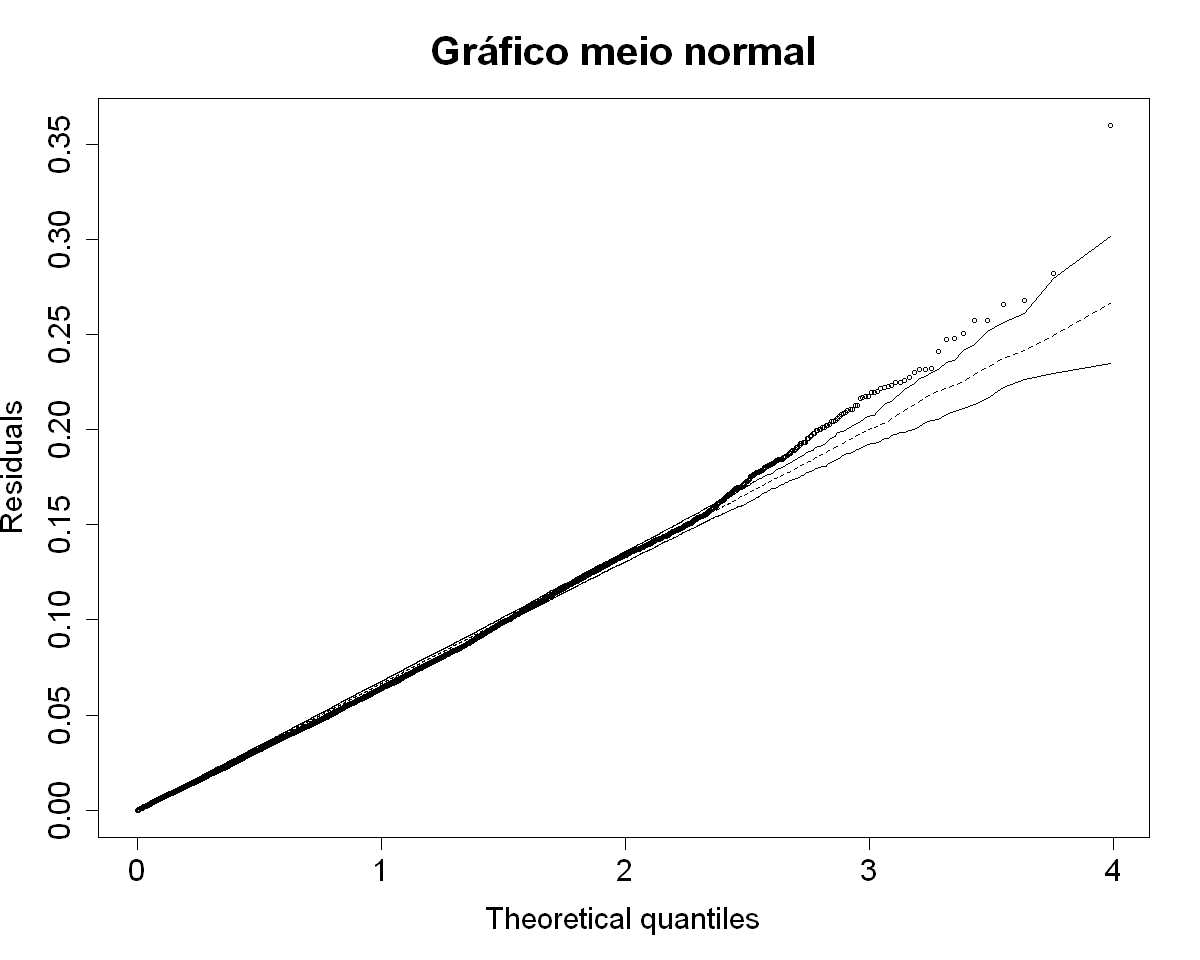

In [63]:
# Diagnósticos do modelo m5

# Resíduos
RES_m5 = m5$res

# Teste de Durbin-Watson para autocorrelação dos resíduos
car::durbinWatsonTest(m5) #versão 1
lmtest::dwtest(RES_m5~1) # versão 2

# Outros testes para autocorrelação dos resíduos
stats::Box.test(RES_m5, lag = 1, type = "Ljung-Box") #teste de Ljung-Box
lmtest::bgtest(RES_m5~1) #teste de Breusch-Godfrey

# Tetes para estacionáridade da série
tseries::kpss.test(RES_m5) #Teste de Kwiatkowski-Phillips-Schmidt-Shin
tseries::adf.test(RES_m5) #Teste de Dickey-Fuller 

# Alguns diagnósticos gráficos
options(repr.plot.width=10, repr.plot.height=8) #pacote repr
boot::glm.diag.plots(m5)

# Gráfico meio-normal
options(repr.plot.width=10, repr.plot.height=8) #pacote repr
hnp::hnp(m5, main='Gráfico meio normal', cex.lab=1.5, cex.axis=1.5, cex.main=2)

#Obs: Veja que o gráfico meio normal indica possível não adequação do modelo.



In [64]:
# Modelo 6 - Apenas as variáveis numéricas, com variável HORA e função de ligação logarítimica

formula6 = paste('Y',paste(paste(paste('X',2:11,sep=''), collapse='+'),'HORA',sep='+'),sep='~') #formula para o modelo

m6 = glm(formula6, family = Gamma(log), data = DF_REG) #MLG GAMMA

# Significância dos parâmetros
summary(m6)




Call:
glm(formula = formula6, family = Gamma(log), data = DF_REG)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.24981  -0.04275  -0.00393   0.03768   0.36168  

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.481e+00  1.646e-02 393.735  < 2e-16 ***
X2          -1.374e-04  5.995e-04  -0.229 0.818686    
X3           7.916e-05  2.158e-05   3.668 0.000245 ***
X4          -7.236e-05  7.206e-06 -10.042  < 2e-16 ***
X5          -1.095e-04  5.865e-06 -18.664  < 2e-16 ***
X6           2.567e-04  2.898e-05   8.857  < 2e-16 ***
X7           1.788e-04  6.641e-06  26.927  < 2e-16 ***
X8           2.209e-04  4.757e-06  46.445  < 2e-16 ***
X9          -6.990e-04  2.897e-04  -2.413 0.015854 *  
X10          1.939e-03  1.095e-04  17.704  < 2e-16 ***
X11         -6.708e-02  5.300e-03 -12.659  < 2e-16 ***
HORA01      -1.552e-02  4.477e-03  -3.467 0.000529 ***
HORA02      -2.995e-02  4.535e-03  -6.603 4.25e-11 ***
HORA03      -3.862e-02  

 lag Autocorrelation D-W Statistic p-value
   1       0.9111922     0.1772093       0
 Alternative hypothesis: rho != 0


	Durbin-Watson test

data:  RES_m6 ~ 1
DW = 0.1766, p-value < 2.2e-16
alternative hypothesis: true autocorrelation is greater than 0



	Box-Ljung test

data:  RES_m6
X-squared = 7744, df = 1, p-value < 2.2e-16



	Breusch-Godfrey test for serial correlation of order up to 1

data:  RES_m6 ~ 1
LM test = 7743, df = 1, p-value < 2.2e-16



	KPSS Test for Level Stationarity

data:  RES_m6
KPSS Level = 3.1261, Truncation lag parameter = 12, p-value = 0.01



	Augmented Dickey-Fuller Test

data:  RES_m6
Dickey-Fuller = -7.6177, Lag order = 21, p-value = 0.01
alternative hypothesis: stationary


Gamma model 


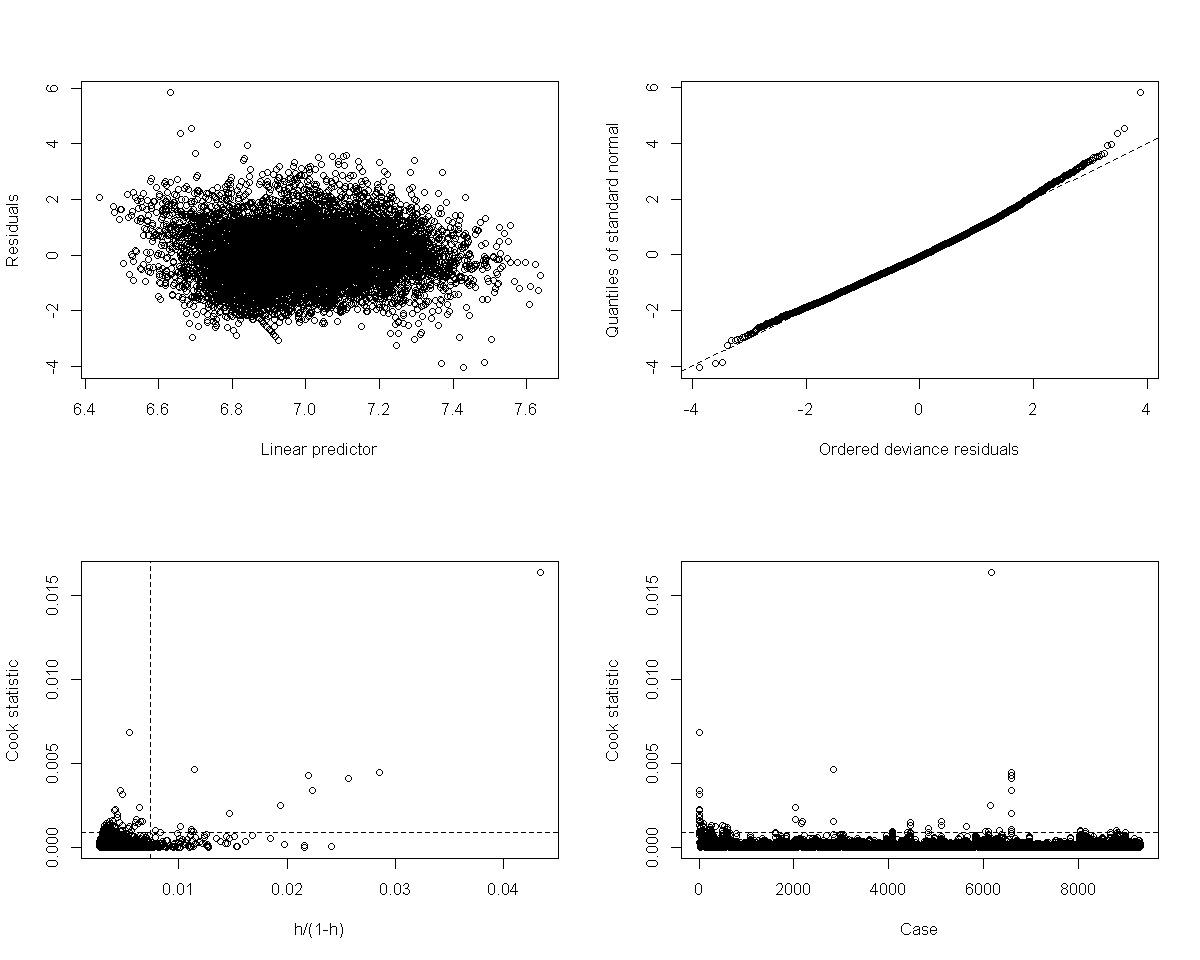

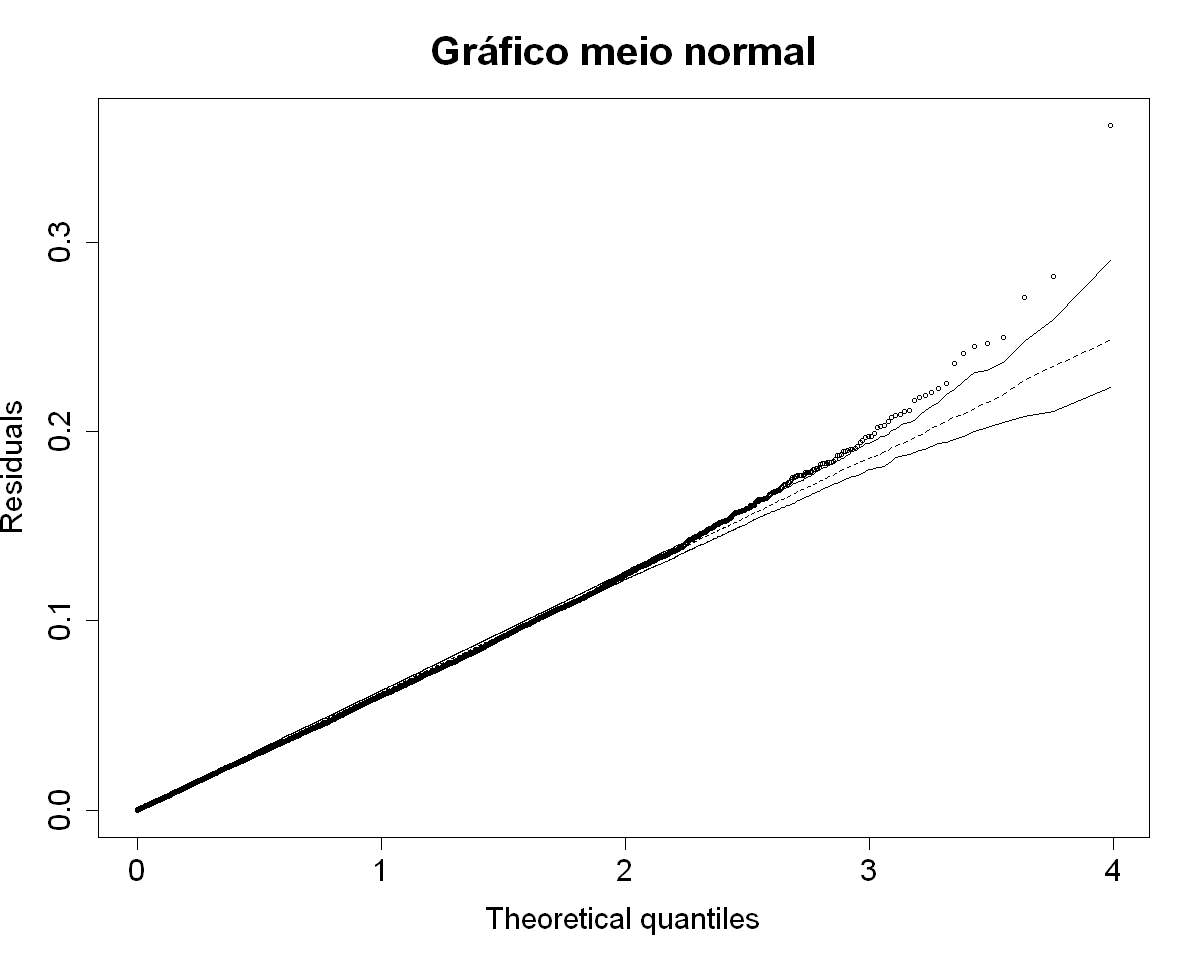

In [65]:
# Diagnósticos do modelo m6

# Resíduos
RES_m6 = m6$res

# Teste de Durbin-Watson para autocorrelação dos resíduos
car::durbinWatsonTest(m6) #versão 1
lmtest::dwtest(RES_m6~1) # versão 2

# Outros testes para autocorrelação dos resíduos
stats::Box.test(RES_m6, lag = 1, type = "Ljung-Box") #teste de Ljung-Box
lmtest::bgtest(RES_m6~1) #teste de Breusch-Godfrey

# Tetes para estacionáridade da série
tseries::kpss.test(RES_m6) #Teste de Kwiatkowski-Phillips-Schmidt-Shin
tseries::adf.test(RES_m6) #Teste de Dickey-Fuller 

# Alguns diagnósticos gráficos
options(repr.plot.width=10, repr.plot.height=8) #pacote repr
boot::glm.diag.plots(m6)

# Gráfico meio-normal
options(repr.plot.width=10, repr.plot.height=8) #pacote repr
hnp::hnp(m6, main='Gráfico meio normal', cex.lab=1.5, cex.axis=1.5, cex.main=2)

#Obs: Veja que o gráfico meio normal indica possível não adequação do modelo.


In [66]:
# Modelo 7 - Apenas as variáveis numéricas, sem variável HORA e função de ligação inversa

formula7 = paste('Y',paste(paste('X',2:11,sep='') ,collapse='+'),sep='~') #formula para o modelo

m7 = glm(formula7, family = Gamma(inverse), data = DF_REG) #MLG GAMMA

# Significância dos parâmetros
summary(m7)



Call:
glm(formula = formula7, family = Gamma(inverse), data = DF_REG)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.25391  -0.04543  -0.00370   0.03927   0.34485  

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.631e-03  1.553e-05 105.001   <2e-16 ***
X2           1.505e-05  4.867e-07  30.927   <2e-16 ***
X3          -6.051e-07  1.821e-08 -33.228   <2e-16 ***
X4           5.784e-08  5.913e-09   9.781   <2e-16 ***
X5           1.208e-07  6.145e-09  19.654   <2e-16 ***
X6          -3.457e-07  2.492e-08 -13.875   <2e-16 ***
X7          -1.265e-07  5.831e-09 -21.689   <2e-16 ***
X8          -1.400e-07  3.780e-09 -37.035   <2e-16 ***
X9          -6.211e-07  2.779e-07  -2.235   0.0254 *  
X10         -1.697e-06  1.050e-07 -16.159   <2e-16 ***
X11          6.775e-05  5.057e-06  13.396   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for Gamma family taken to be 0.004347744

 lag Autocorrelation D-W Statistic p-value
   1       0.9266831     0.1460051       0
 Alternative hypothesis: rho != 0


	Durbin-Watson test

data:  RES_m7 ~ 1
DW = 0.13616, p-value < 2.2e-16
alternative hypothesis: true autocorrelation is greater than 0



	Box-Ljung test

data:  RES_m7
X-squared = 8089.6, df = 1, p-value < 2.2e-16



	Breusch-Godfrey test for serial correlation of order up to 1

data:  RES_m7 ~ 1
LM test = 8088.7, df = 1, p-value < 2.2e-16



	KPSS Test for Level Stationarity

data:  RES_m7
KPSS Level = 4.1998, Truncation lag parameter = 12, p-value = 0.01



	Augmented Dickey-Fuller Test

data:  RES_m7
Dickey-Fuller = -7.332, Lag order = 21, p-value = 0.01
alternative hypothesis: stationary


Gamma model 


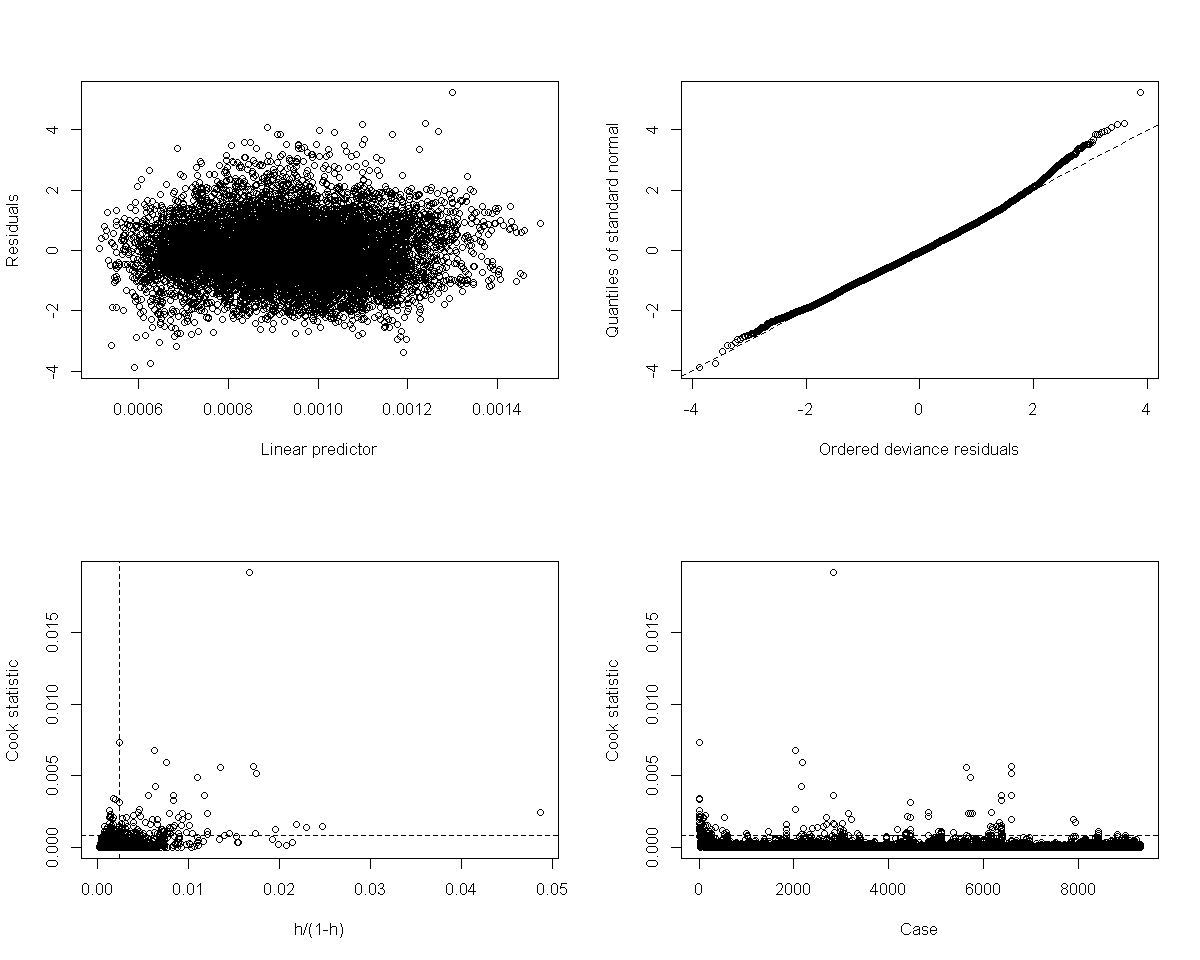

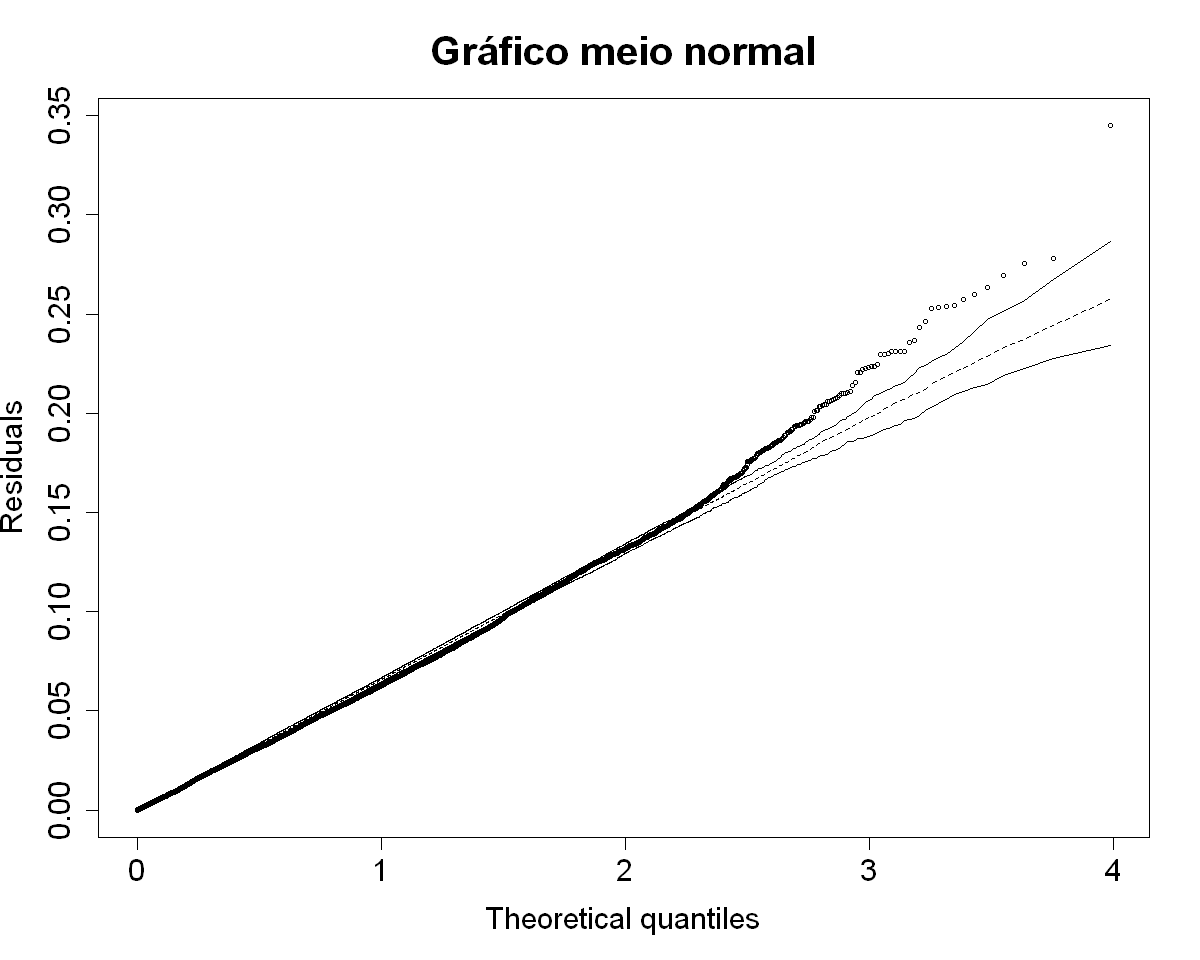

In [67]:
# Diagnósticos do modelo m7

# Resíduos
RES_m7 = m7$res

# Teste de Durbin-Watson para autocorrelação dos resíduos
car::durbinWatsonTest(m7) #versão 1
lmtest::dwtest(RES_m7~1) # versão 2

# Outros testes para autocorrelação dos resíduos
stats::Box.test(RES_m7, lag = 1, type = "Ljung-Box") #teste de Ljung-Box
lmtest::bgtest(RES_m7~1) #teste de Breusch-Godfrey

# Tetes para estacionáridade da série
tseries::kpss.test(RES_m7) #Teste de Kwiatkowski-Phillips-Schmidt-Shin
tseries::adf.test(RES_m7) #Teste de Dickey-Fuller 

# Alguns diagnósticos gráficos
options(repr.plot.width=10, repr.plot.height=8) #pacote repr
boot::glm.diag.plots(m7)

# Gráfico meio-normal
options(repr.plot.width=10, repr.plot.height=8) #pacote repr
hnp::hnp(m7, main='Gráfico meio normal', cex.lab=1.5, cex.axis=1.5, cex.main=2)

#Obs: Veja que o gráfico meio normal indica possível não adequação do modelo.


In [68]:
# Modelo 8 - Apenas as variáveis numéricas, com variável HORA e função de ligação inversa

formula8 = paste('Y',paste(paste(paste('X',2:11,sep=''), collapse='+'),'HORA',sep='+'),sep='~') #formula para o modelo

m8 = glm(formula8, family = Gamma(inverse), data = DF_REG) #MLG GAMMA

# Significância dos parâmetros
summary(m8)




Call:
glm(formula = formula8, family = Gamma(inverse), data = DF_REG)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.28486  -0.04359  -0.00402   0.03765   0.34861  

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.565e-03  1.532e-05 102.096  < 2e-16 ***
X2           1.125e-05  4.936e-07  22.791  < 2e-16 ***
X3          -4.210e-07  1.861e-08 -22.622  < 2e-16 ***
X4           8.389e-08  5.763e-09  14.557  < 2e-16 ***
X5           1.144e-07  5.854e-09  19.546  < 2e-16 ***
X6          -2.402e-07  2.429e-08  -9.886  < 2e-16 ***
X7          -1.422e-07  5.682e-09 -25.027  < 2e-16 ***
X8          -1.789e-07  3.897e-09 -45.916  < 2e-16 ***
X9           2.374e-08  2.696e-07   0.088   0.9298    
X10         -2.047e-06  1.014e-07 -20.191  < 2e-16 ***
X11          6.450e-05  4.830e-06  13.354  < 2e-16 ***
HORA01       1.368e-05  4.280e-06   3.195   0.0014 ** 
HORA02       2.585e-05  4.468e-06   5.786 7.45e-09 ***
HORA03       3.453e-

 lag Autocorrelation D-W Statistic p-value
   1        0.915724      0.168131       0
 Alternative hypothesis: rho != 0


	Durbin-Watson test

data:  RES_m8 ~ 1
DW = 0.15224, p-value < 2.2e-16
alternative hypothesis: true autocorrelation is greater than 0



	Box-Ljung test

data:  RES_m8
X-squared = 7952.3, df = 1, p-value < 2.2e-16



	Breusch-Godfrey test for serial correlation of order up to 1

data:  RES_m8 ~ 1
LM test = 7951.4, df = 1, p-value < 2.2e-16



	KPSS Test for Level Stationarity

data:  RES_m8
KPSS Level = 3.5355, Truncation lag parameter = 12, p-value = 0.01



	Augmented Dickey-Fuller Test

data:  RES_m8
Dickey-Fuller = -7.5734, Lag order = 21, p-value = 0.01
alternative hypothesis: stationary


Gamma model 


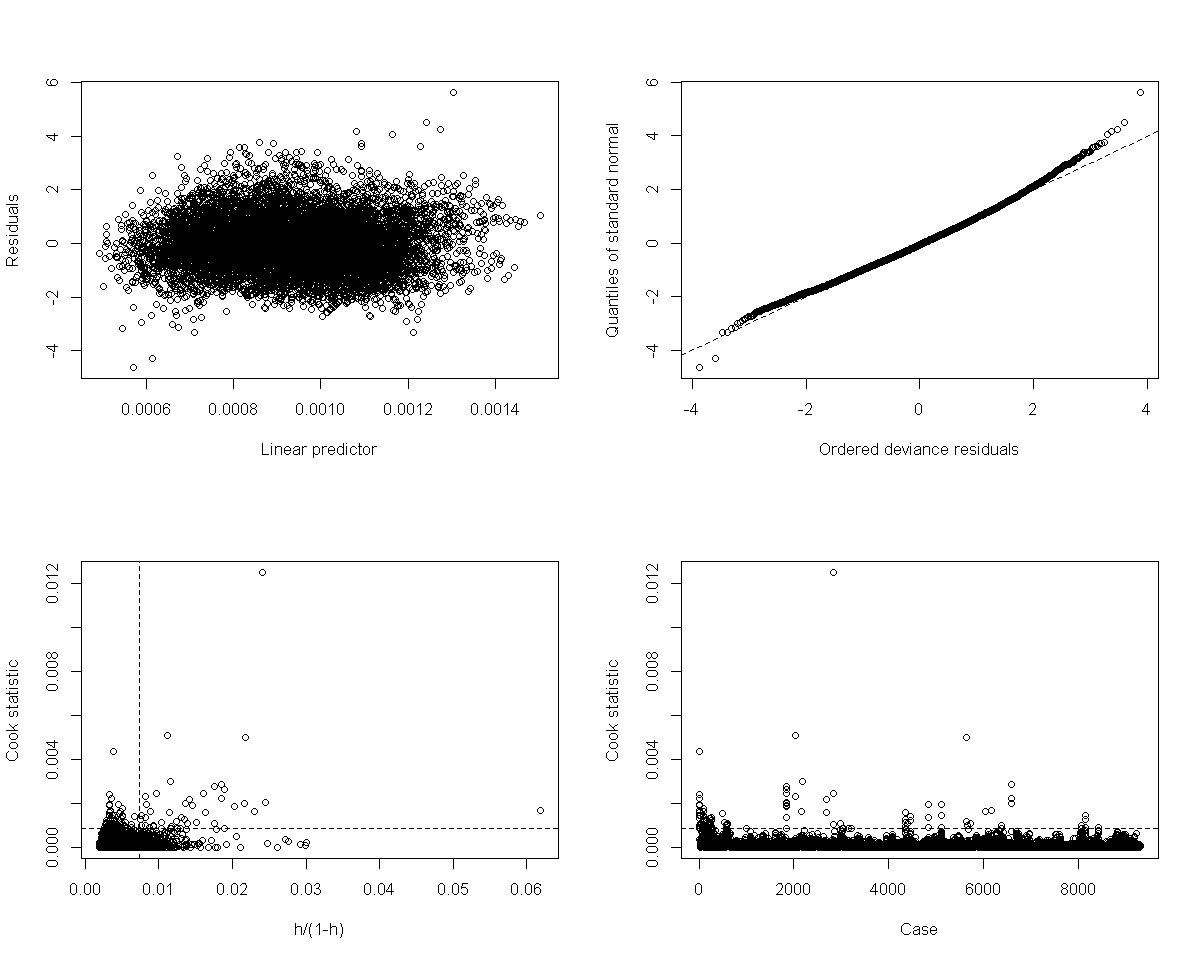

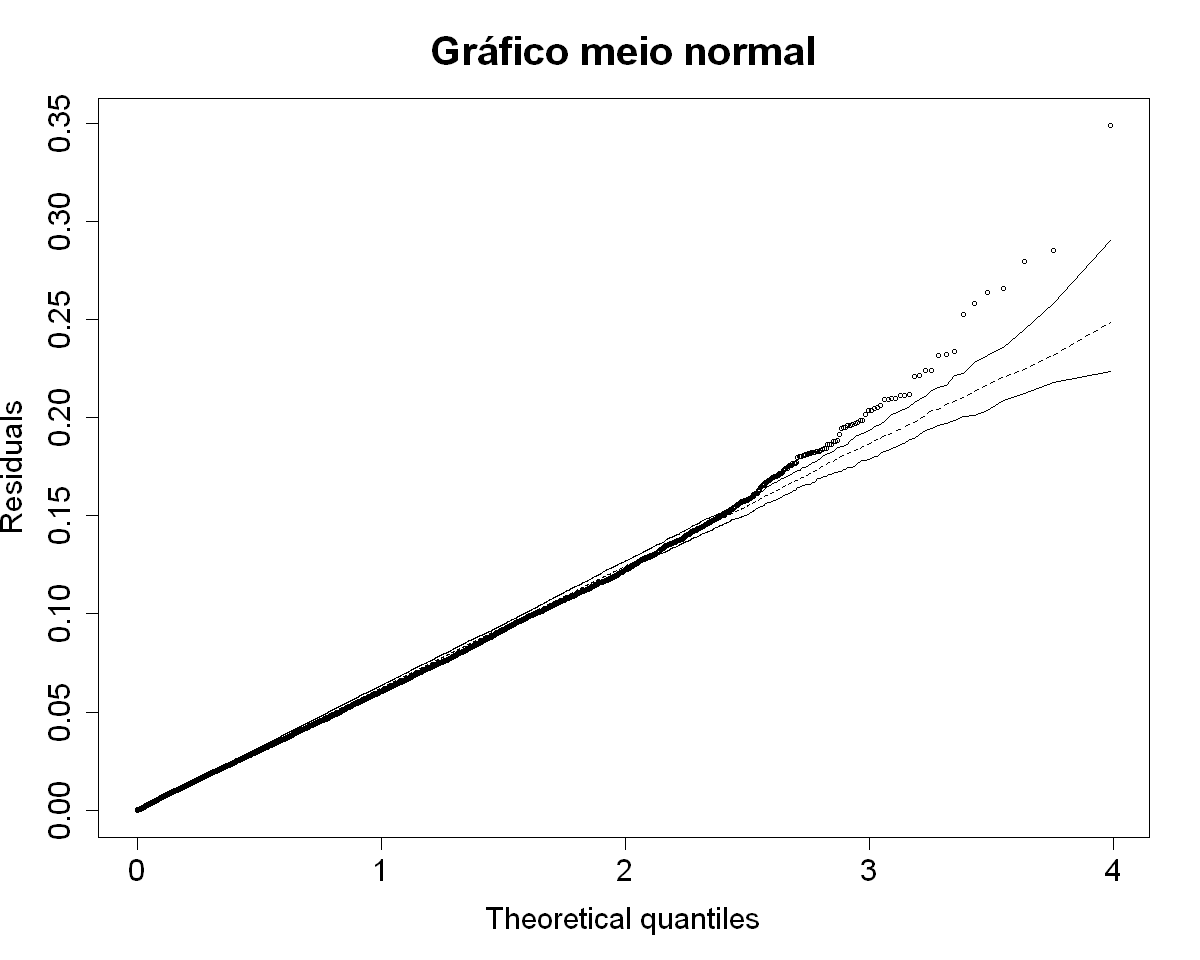

In [69]:
# Diagnósticos do modelo m8

# Resíduos
RES_m8 = m8$res

# Teste de Durbin-Watson para autocorrelação dos resíduos
car::durbinWatsonTest(m8) #versão 1
lmtest::dwtest(RES_m8~1) # versão 2

# Outros testes para autocorrelação dos resíduos
stats::Box.test(RES_m8, lag = 1, type = "Ljung-Box") #teste de Ljung-Box
lmtest::bgtest(RES_m8~1) #teste de Breusch-Godfrey

# Tetes para estacionáridade da série
tseries::kpss.test(RES_m8) #Teste de Kwiatkowski-Phillips-Schmidt-Shin
tseries::adf.test(RES_m8) #Teste de Dickey-Fuller 

# Alguns diagnósticos gráficos
options(repr.plot.width=10, repr.plot.height=8) #pacote repr
boot::glm.diag.plots(m8)

# Gráfico meio-normal
options(repr.plot.width=10, repr.plot.height=8) #pacote repr
hnp::hnp(m8, main='Gráfico meio normal', cex.lab=1.5, cex.axis=1.5, cex.main=2)

#Obs: Veja que o gráfico meio normal indica possível não adequação do modelo.



### Seção 13.3 - Ajustando modelo da classe ARIMA

In [70]:
# Vamos utilizar o modelo arima para trabalhar o lorítmo natural da variável resposta

# MODELO SARIMA SEM COVARIÁVEIS
Temp_ini=Sys.time()
TS_Y = ts(log(DF_REG$Y),start=c(1,18), frequency=24) #logarítimo da variável resposta
m9 = forecast::auto.arima(y = TS_Y); m9 #Aqui temos um modelo do tipo SARIMA
Temp_fin=Sys.time()

# Tempo de processamento do modelo
Temp_fin-Temp_ini #m9 leva ~15min para ser feito

# Teste para coeficientes do modelo
lmtest::coeftest(m9)


Series: TS_Y 
ARIMA(4,0,4)(2,1,0)[24] 

Coefficients:
         ar1     ar2     ar3      ar4     ma1     ma2      ma3      ma4
      0.4346  0.3444  0.8122  -0.6345  0.5306  0.0043  -0.8408  -0.1653
s.e.  0.0267  0.0215  0.0125   0.0246  0.0274  0.0298   0.0238   0.0122
         sar1     sar2
      -0.5496  -0.3056
s.e.   0.0101   0.0100

sigma^2 estimated as 0.0052:  log likelihood=11250.89
AIC=-22479.79   AICc=-22479.76   BIC=-22401.28

Time difference of 13.97585 mins


z test of coefficients:

       Estimate Std. Error  z value Pr(>|z|)    
ar1   0.4345934  0.0266617  16.3003   <2e-16 ***
ar2   0.3443759  0.0214864  16.0276   <2e-16 ***
ar3   0.8122376  0.0125424  64.7595   <2e-16 ***
ar4  -0.6345142  0.0246342 -25.7575   <2e-16 ***
ma1   0.5305741  0.0274313  19.3419   <2e-16 ***
ma2   0.0042517  0.0298483   0.1424   0.8867    
ma3  -0.8408402  0.0237768 -35.3638   <2e-16 ***
ma4  -0.1652628  0.0121591 -13.5917   <2e-16 ***
sar1 -0.5496413  0.0101431 -54.1885   <2e-16 ***
sar2 -0.3056035  0.0100053 -30.5442   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



	Durbin-Watson test

data:  RES_m9 ~ 1
DW = 1.9969, p-value = 0.4398
alternative hypothesis: true autocorrelation is greater than 0



	Box-Ljung test

data:  RES_m9
X-squared = 0.022805, df = 1, p-value = 0.88



	Breusch-Godfrey test for serial correlation of order up to 1

data:  RES_m9 ~ 1
LM test = 0.022798, df = 1, p-value = 0.88



	KPSS Test for Level Stationarity

data:  RES_m9
KPSS Level = 0.0078077, Truncation lag parameter = 12, p-value = 0.1



	Augmented Dickey-Fuller Test

data:  RES_m9
Dickey-Fuller = -20.437, Lag order = 21, p-value = 0.01
alternative hypothesis: stationary



	One-sample Kolmogorov-Smirnov test

data:  RES_m9
D = 0.031819, p-value = 1.278e-08
alternative hypothesis: two-sided


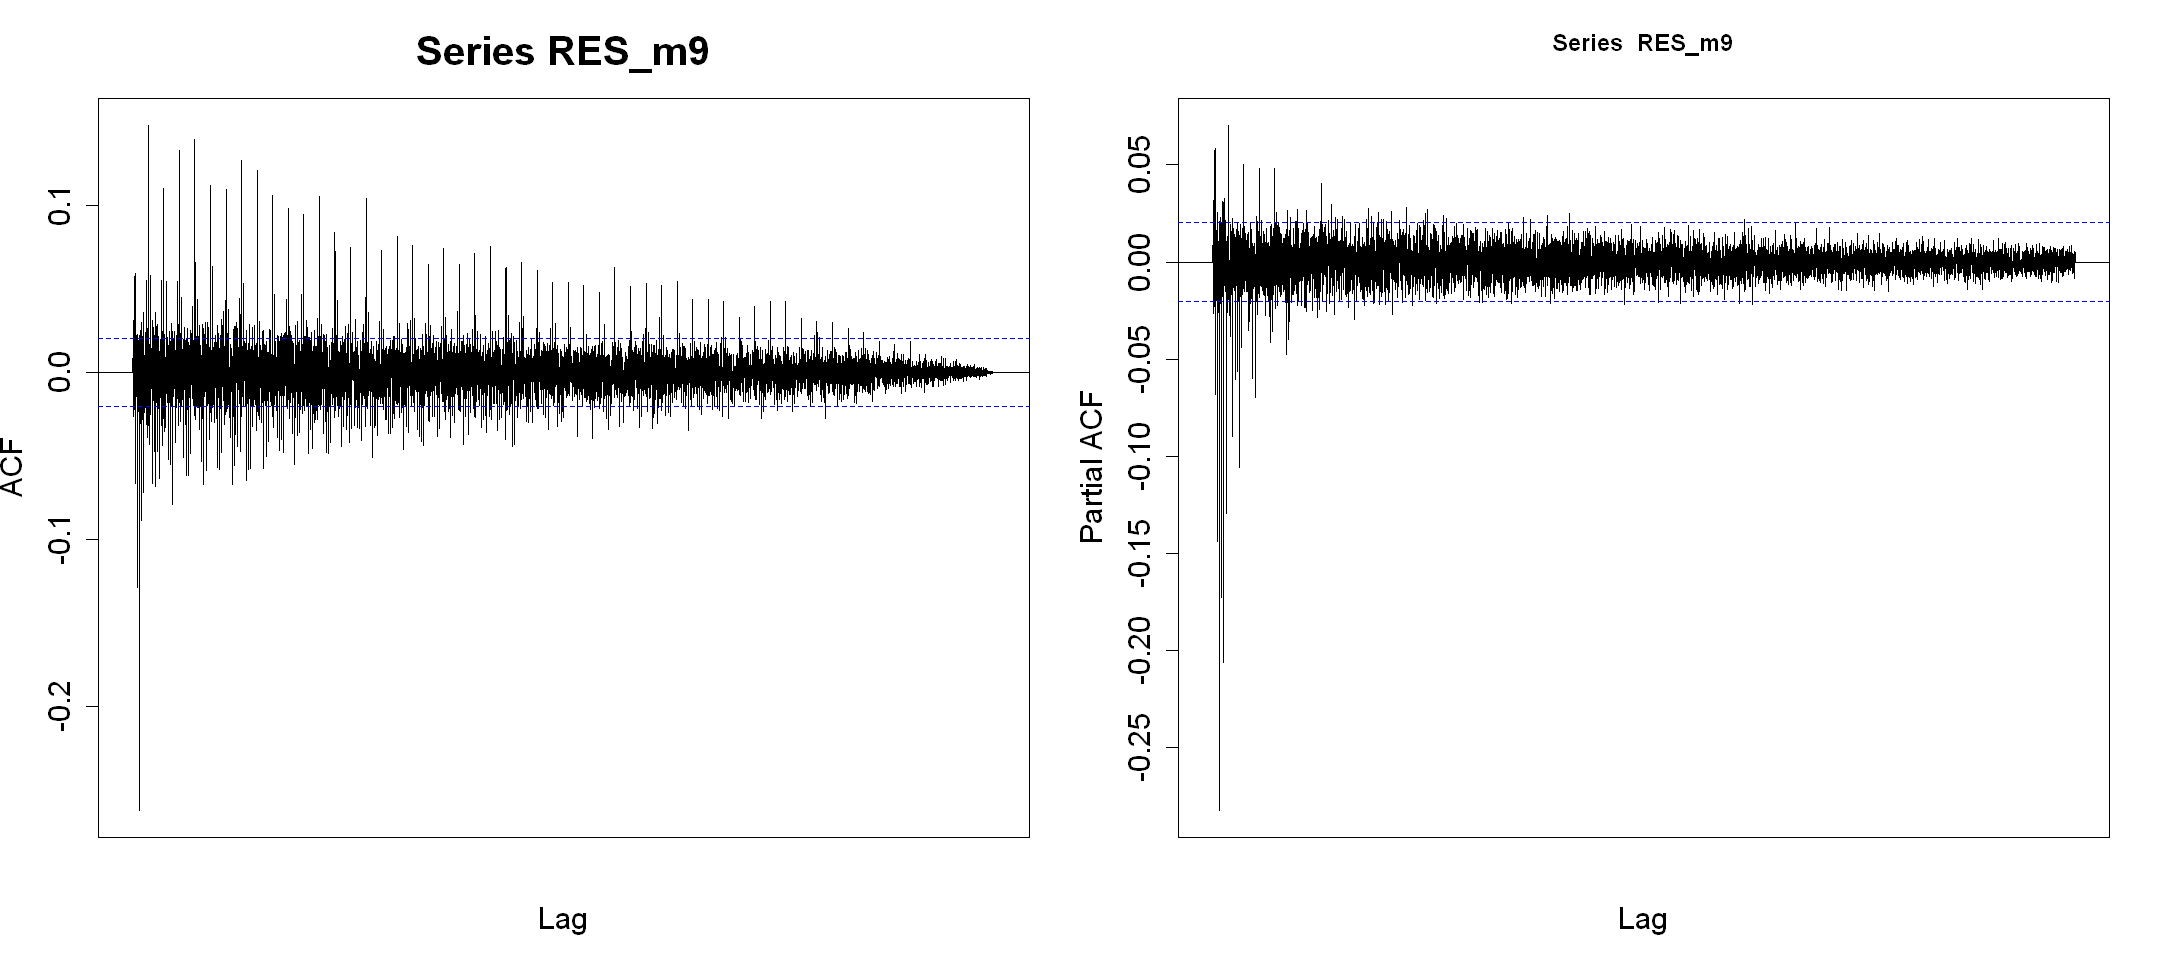

In [71]:
# Diagnósticos do modelo m9

# Resíduos
RES_m9 = m9$res

# Teste de Durbin-Watson para autocorrelação dos resíduos
lmtest::dwtest(RES_m9~1) # versão 2

# Outros testes para autocorrelação dos resíduos
stats::Box.test(RES_m9, lag = 1, type = "Ljung-Box") #teste de Ljung-Box
lmtest::bgtest(RES_m9~1) #teste de Breusch-Godfrey

# Tetes para estacionáridade da série
tseries::kpss.test(RES_m9) #Teste de Kwiatkowski-Phillips-Schmidt-Shin
tseries::adf.test(RES_m9) #Teste de Dickey-Fuller 

# Tetes de normalidade dos resíduos
ks.test(RES_m9, pnorm, 0, sd(m9$res))

# Gráfico de auto-correlação e auto-correlação parcial
options(repr.plot.width=18, repr.plot.height=8) #pacote repr
par(mfrow=c(1,2))
acf(RES_m9, cex.lab=1.5, cex.axis=1.5, cex.main=2, xaxt='n', lag.max=10000) #lag 10000
pacf(RES_m9, cex.lab=1.5, cex.axis=1.5, cex.main=2, xaxt='n', lag.max=10000) #lag 10000


In [72]:
# MODELO SARIMA COM COVARIÁVEIS (MODELO DE REGRESSÃO DINÂMICO)

# Obs: Outros nomes para este tipo de modelo é Arimax, Sarimax ou modelo de 
# regressão com resíduo modelado por modelos da classe Arima. 

# Obs: Esse tipo de modelo precisa que as covariáveis sejam estacionárias. Para obter
# essa propriedade, irei utilizar a transformação box-cox na variável e depois
# irei aplicar a função diferença para que assim a variável fique estacionária e reduza um pouco da variância.

# Ajustando as covariáveis

T_STAT_fun = function(X_){
    TS_X = ts(X_,start=c(1,18), frequency=24)
    V = forecast::BoxCox.lambda(TS_X)
    TDF = as.vector(diff((((TS_X^V)/V) - 1)))
    if(sum(is.na(TDF))>0){
        TDF[is.na(TDF)]=NA  
        TDF2 = imputeTS::na_interpolation(TDF, option = "linear")
        return(TDF2)
    }else{
        return(TDF)
    }     
}

# BASE COM AS COVARIÁVEIS TRANSFORMADAS E ESTACIONÁRIAS (X2 a X11) - TRAIN DATASET
DF_X_STAT = apply(DF_REG[, 4:13], 2, T_STAT_fun)

# BASE COM AS COVARIÁVEIS TRANSFORMADAS E ESTACIONÁRIAS (X2 a X11) - TEST DATASET
DF_X_STAT_TEST = apply(DF_TEST[, 4:13], 2, T_STAT_fun) #BASE COM AS COVARIÁVEIS TRANSFORMADAS E ESTACIONÁRIAS (X2 a X11) 
for(i in 4:13){
    TS_X = ts(DF_REG[,i],start=c(1,18), frequency=24)
    V = forecast::BoxCox.lambda(TS_X)
    TDF = as.vector(diff((((DF_TEST[,i]^V)/V) - 1)))
    if(sum(is.na(TDF))>0){
        TDF[is.na(TDF)]=NA  
        TDF2 = imputeTS::na_interpolation(TDF, option = "linear")
        DF_X_STAT_TEST[,i-3]=TDF2
    }else{
        DF_X_STAT_TEST[,i-3]=TDF
    }     

}

# Verificando se as covariáveis transformadas estão estacionárias (caso alguém queira testar se deu certo)

#DF_ST=data.frame(DF_test=numeric(),KPSS_Trent_test=numeric(),KPSS_Level_test=numeric())
#for(i in 1:ncol(DF_X_STAT)){
#  T1=as.numeric(tseries::adf.test(DF_X_STAT[,i])$p.value)
#  T2=as.numeric(tseries::kpss.test(DF_X_STAT[,i], null="Level")$p.value)
#  T3=as.numeric(tseries::kpss.test(DF_X_STAT[,i], null="Trend")$p.value)
#  DF_ST[i,]=c(T1,T2,T3)
#}

#DF_ST=data.frame(VAR=paste("X",1:11,sep=""),DF_ST); DF_ST #O que indica que todas as variáveis de entrada estão estacionárias


# Construíndo Variáveis Dummy com a variável hora - TRAIN DATASET

D_MAT = matrix(0, nrow=nrow(DF_REG), ncol=23)

for(i in  1:nrow(DF_REG)){
    J = as.numeric(as.character(DF_REG$HORA[i]))
    if(J==0){next}else{D_MAT[i,J]=1}      
}
colnames(D_MAT) = paste('H_D',1:23, sep='')


# Construíndo Variáveis Dummy com a variável hora - TEST DATASET

D_MAT_TEST = matrix(0, nrow=nrow(DF_TEST[-1,]), ncol=23)

for(i in  1:nrow(D_MAT_TEST)){
    J = as.numeric(as.character(DF_TEST$HORA[i+1]))
    if(J==0){next}else{D_MAT_TEST[i,J]=1}      
}
colnames(D_MAT_TEST) = paste('H_D',1:23, sep='')


In [73]:
# Ajuste do modelo arimax com componente sazonal e covariáveis X

TS_Ym10 = ts(log(DF_REG$Y[-1]),start=c(1,19), frequency=24) #logarítimo da variável resposta

m10_temp_ini = Sys.time()
m10 = forecast::auto.arima(y = TS_Ym10, xreg = as.matrix(DF_X_STAT)); m10
m10_temp_fin = Sys.time()
m10_temp = m10_temp_fin-m10_temp_ini; m10_temp

# Teste dos coeficientes do modelo
lmtest::coeftest(m10)

Series: TS_Ym10 
Regression with ARIMA(3,0,2)(2,1,0)[24] errors 

Coefficients:
         ar1      ar2     ar3      ma1      ma2     sar1     sar2       X2
      1.9242  -1.1899  0.2520  -0.5059  -0.2412  -0.5615  -0.2938  -0.0056
s.e.  0.0289   0.0406  0.0198   0.0292   0.0242   0.0101   0.0100   0.0069
          X3      X4       X5       X6      X7      X8      X9    X10     X11
      3.1081  0.0196  -0.0301  -0.0061  0.4969  0.0189  0.0063  2e-04  0.0763
s.e.  1.4470  0.0022   0.0039   0.0014  0.0207  0.0010  0.0020  1e-04  0.0097

sigma^2 estimated as 0.002216:  log likelihood=15216.38
AIC=-30396.77   AICc=-30396.69   BIC=-30268.3

Time difference of 12.64707 mins


z test of coefficients:

        Estimate  Std. Error  z value  Pr(>|z|)    
ar1   1.92416000  0.02888301  66.6191 < 2.2e-16 ***
ar2  -1.18985918  0.04063859 -29.2790 < 2.2e-16 ***
ar3   0.25203837  0.01980382  12.7268 < 2.2e-16 ***
ma1  -0.50592436  0.02920303 -17.3244 < 2.2e-16 ***
ma2  -0.24123706  0.02422206  -9.9594 < 2.2e-16 ***
sar1 -0.56149804  0.01012441 -55.4598 < 2.2e-16 ***
sar2 -0.29378803  0.01000423 -29.3664 < 2.2e-16 ***
X2   -0.00555481  0.00691914  -0.8028  0.422080    
X3    3.10809915  1.44701452   2.1479  0.031719 *  
X4    0.01957174  0.00218481   8.9581 < 2.2e-16 ***
X5   -0.03005257  0.00386211  -7.7814 7.173e-15 ***
X6   -0.00614363  0.00139568  -4.4019 1.073e-05 ***
X7    0.49692776  0.02066558  24.0462 < 2.2e-16 ***
X8    0.01892856  0.00098031  19.3088 < 2.2e-16 ***
X9    0.00629100  0.00202756   3.1027  0.001917 ** 
X10   0.00022352  0.00011403   1.9602  0.049977 *  
X11   0.07626140  0.00972916   7.8384 4.562e-15 ***
---
Signif. codes:  0 '***' 0.001 '**'


	Durbin-Watson test

data:  RES_m10 ~ 1
DW = 1.9999, p-value = 0.4977
alternative hypothesis: true autocorrelation is greater than 0



	Box-Ljung test

data:  RES_m10
X-squared = 2.2677e-05, df = 1, p-value = 0.9962



	Breusch-Godfrey test for serial correlation of order up to 1

data:  RES_m10 ~ 1
LM test = 2.267e-05, df = 1, p-value = 0.9962



	KPSS Test for Level Stationarity

data:  RES_m10
KPSS Level = 0.0075513, Truncation lag parameter = 12, p-value = 0.1



	Augmented Dickey-Fuller Test

data:  RES_m10
Dickey-Fuller = -20.737, Lag order = 21, p-value = 0.01
alternative hypothesis: stationary



	One-sample Kolmogorov-Smirnov test

data:  RES_m10
D = 0.028633, p-value = 4.639e-07
alternative hypothesis: two-sided


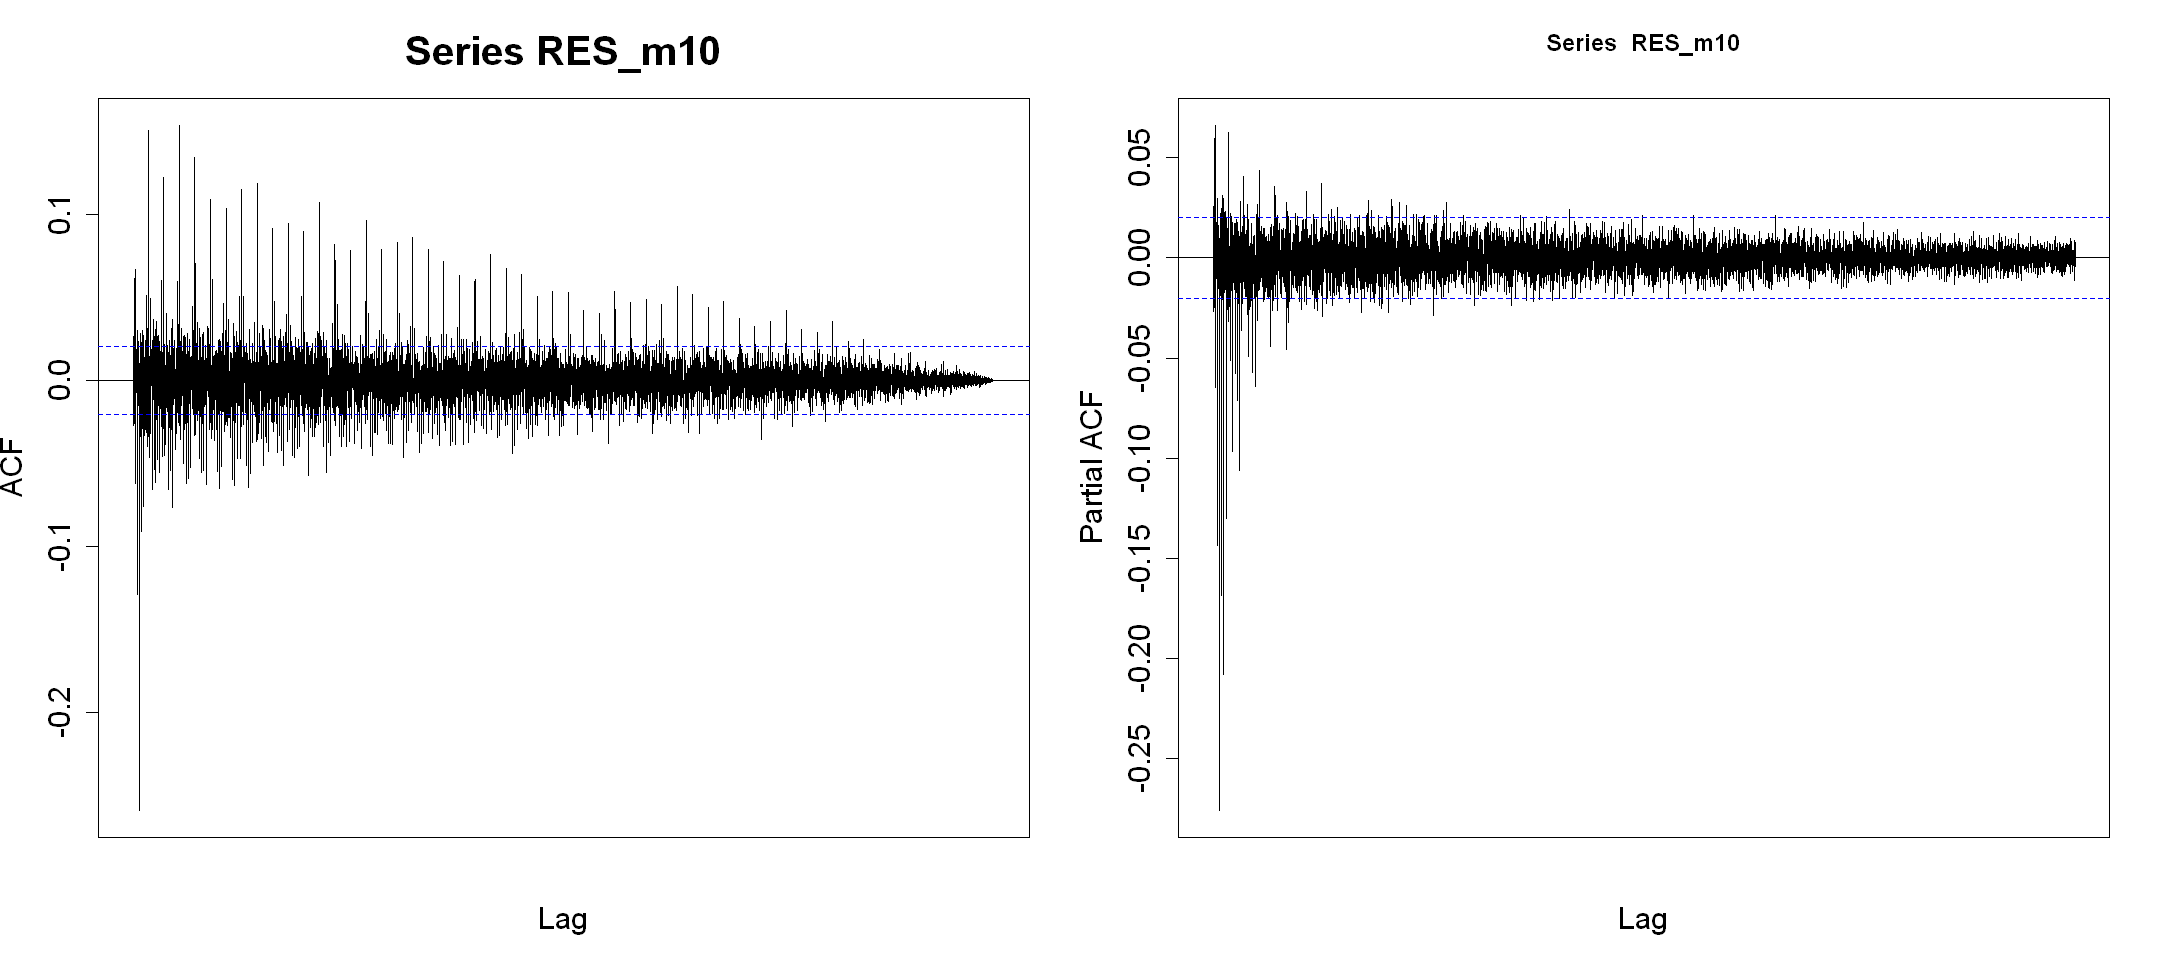

In [74]:
# Diagnósticos do modelo m10

# Resíduos
RES_m10 = m10$res

# Teste de Durbin-Watson para autocorrelação dos resíduos
lmtest::dwtest(RES_m10~1) # versão 2

# Outros testes para autocorrelação dos resíduos
stats::Box.test(RES_m10, lag = 1, type = "Ljung-Box") #teste de Ljung-Box
lmtest::bgtest(RES_m10~1) #teste de Breusch-Godfrey

# Tetes para estacionáridade da série
tseries::kpss.test(RES_m10) #Teste de Kwiatkowski-Phillips-Schmidt-Shin
tseries::adf.test(RES_m10) #Teste de Dickey-Fuller 

# Tetes de normalidade dos resíduos
ks.test(RES_m10, pnorm, 0, sd(m10$res))

# Gráfico de auto-correlação e auto-correlação parcial
options(repr.plot.width=18, repr.plot.height=8) #pacote repr
par(mfrow=c(1,2))
acf(RES_m10, cex.lab=1.5, cex.axis=1.5, cex.main=2, xaxt='n', lag.max=10000) #lag 10000
pacf(RES_m10, cex.lab=1.5, cex.axis=1.5, cex.main=2, xaxt='n', lag.max=10000) #lag 10000


In [75]:
# Ajuste do modelo arimax com componente sazonal, covariáveis X e variáveis Dummy (HORA)

#TS_Ym10 = ts(log(DF_REG$Y[-1]),start=c(1,19), frequency=24) #logarítimo da variável resposta

m11_temp_ini = Sys.time()
m11 = forecast::auto.arima(y = TS_Ym10, xreg = as.matrix(cbind(DF_X_STAT, D_MAT[-1,]))); m11
m11_temp_fin = Sys.time()
m11_temp = m11_temp_fin-m11_temp_ini; m11_temp

# Teste dos coeficientes do modelo
lmtest::coeftest(m11)

Series: TS_Ym10 
Regression with ARIMA(1,1,3)(0,0,2)[24] errors 

Coefficients:
         ar1      ma1      ma2      ma3    sma1    sma2       X2      X3
      0.7483  -0.3041  -0.4544  -0.1469  0.2021  0.0863  -0.0109  4.2599
s.e.  0.0167   0.0190   0.0108   0.0126  0.0106  0.0097   0.0070  1.4529
          X4       X5       X6      X7      X8      X9    X10     X11     H_D1
      0.0207  -0.0287  -0.0075  0.5075  0.0187  0.0059  2e-04  0.0797  -0.0410
s.e.  0.0022   0.0039   0.0014  0.0207  0.0010  0.0020  1e-04  0.0099   0.0033
         H_D2     H_D3     H_D4     H_D5     H_D6     H_D7    H_D8    H_D9
      -0.0962  -0.1432  -0.1721  -0.1801  -0.1436  -0.0362  0.0751  0.1208
s.e.   0.0054   0.0068   0.0076   0.0082   0.0087   0.0090  0.0092  0.0094
       H_D10   H_D11   H_D12   H_D13   H_D14   H_D15   H_D16   H_D17   H_D18
      0.1023  0.0722  0.0518  0.0399  0.0276  0.0215  0.0361  0.0692  0.1131
s.e.  0.0095  0.0095  0.0095  0.0095  0.0094  0.0093  0.0091  0.0089  0.0086
       H

Time difference of 41.18646 mins


z test of coefficients:

         Estimate  Std. Error  z value  Pr(>|z|)    
ar1    0.74828856  0.01669748  44.8145 < 2.2e-16 ***
ma1   -0.30414239  0.01895742 -16.0434 < 2.2e-16 ***
ma2   -0.45439494  0.01079411 -42.0965 < 2.2e-16 ***
ma3   -0.14691161  0.01258934 -11.6695 < 2.2e-16 ***
sma1   0.20207238  0.01059312  19.0758 < 2.2e-16 ***
sma2   0.08626661  0.00973546   8.8611 < 2.2e-16 ***
X2    -0.01088328  0.00697639  -1.5600  0.118756    
X3     4.25993059  1.45285981   2.9321  0.003367 ** 
X4     0.02074273  0.00218484   9.4940 < 2.2e-16 ***
X5    -0.02874093  0.00389730  -7.3746 1.649e-13 ***
X6    -0.00748793  0.00140560  -5.3272 9.974e-08 ***
X7     0.50753509  0.02066733  24.5574 < 2.2e-16 ***
X8     0.01870688  0.00099404  18.8190 < 2.2e-16 ***
X9     0.00592899  0.00203087   2.9194  0.003507 ** 
X10    0.00019483  0.00011573   1.6834  0.092289 .  
X11    0.07972434  0.00992106   8.0359 9.292e-16 ***
H_D1  -0.04101218  0.00326208 -12.5724 < 2.2e-16 ***
H_D2  -0.09619029  0


	Durbin-Watson test

data:  RES_m11 ~ 1
DW = 1.9988, p-value = 0.4768
alternative hypothesis: true autocorrelation is greater than 0



	Box-Ljung test

data:  RES_m11
X-squared = 0.003209, df = 1, p-value = 0.9548



	Breusch-Godfrey test for serial correlation of order up to 1

data:  RES_m11 ~ 1
LM test = 0.0032081, df = 1, p-value = 0.9548



	KPSS Test for Level Stationarity

data:  RES_m11
KPSS Level = 0.0066438, Truncation lag parameter = 12, p-value = 0.1



	Augmented Dickey-Fuller Test

data:  RES_m11
Dickey-Fuller = -21.175, Lag order = 21, p-value = 0.01
alternative hypothesis: stationary



	One-sample Kolmogorov-Smirnov test

data:  RES_m11
D = 0.032661, p-value = 4.661e-09
alternative hypothesis: two-sided


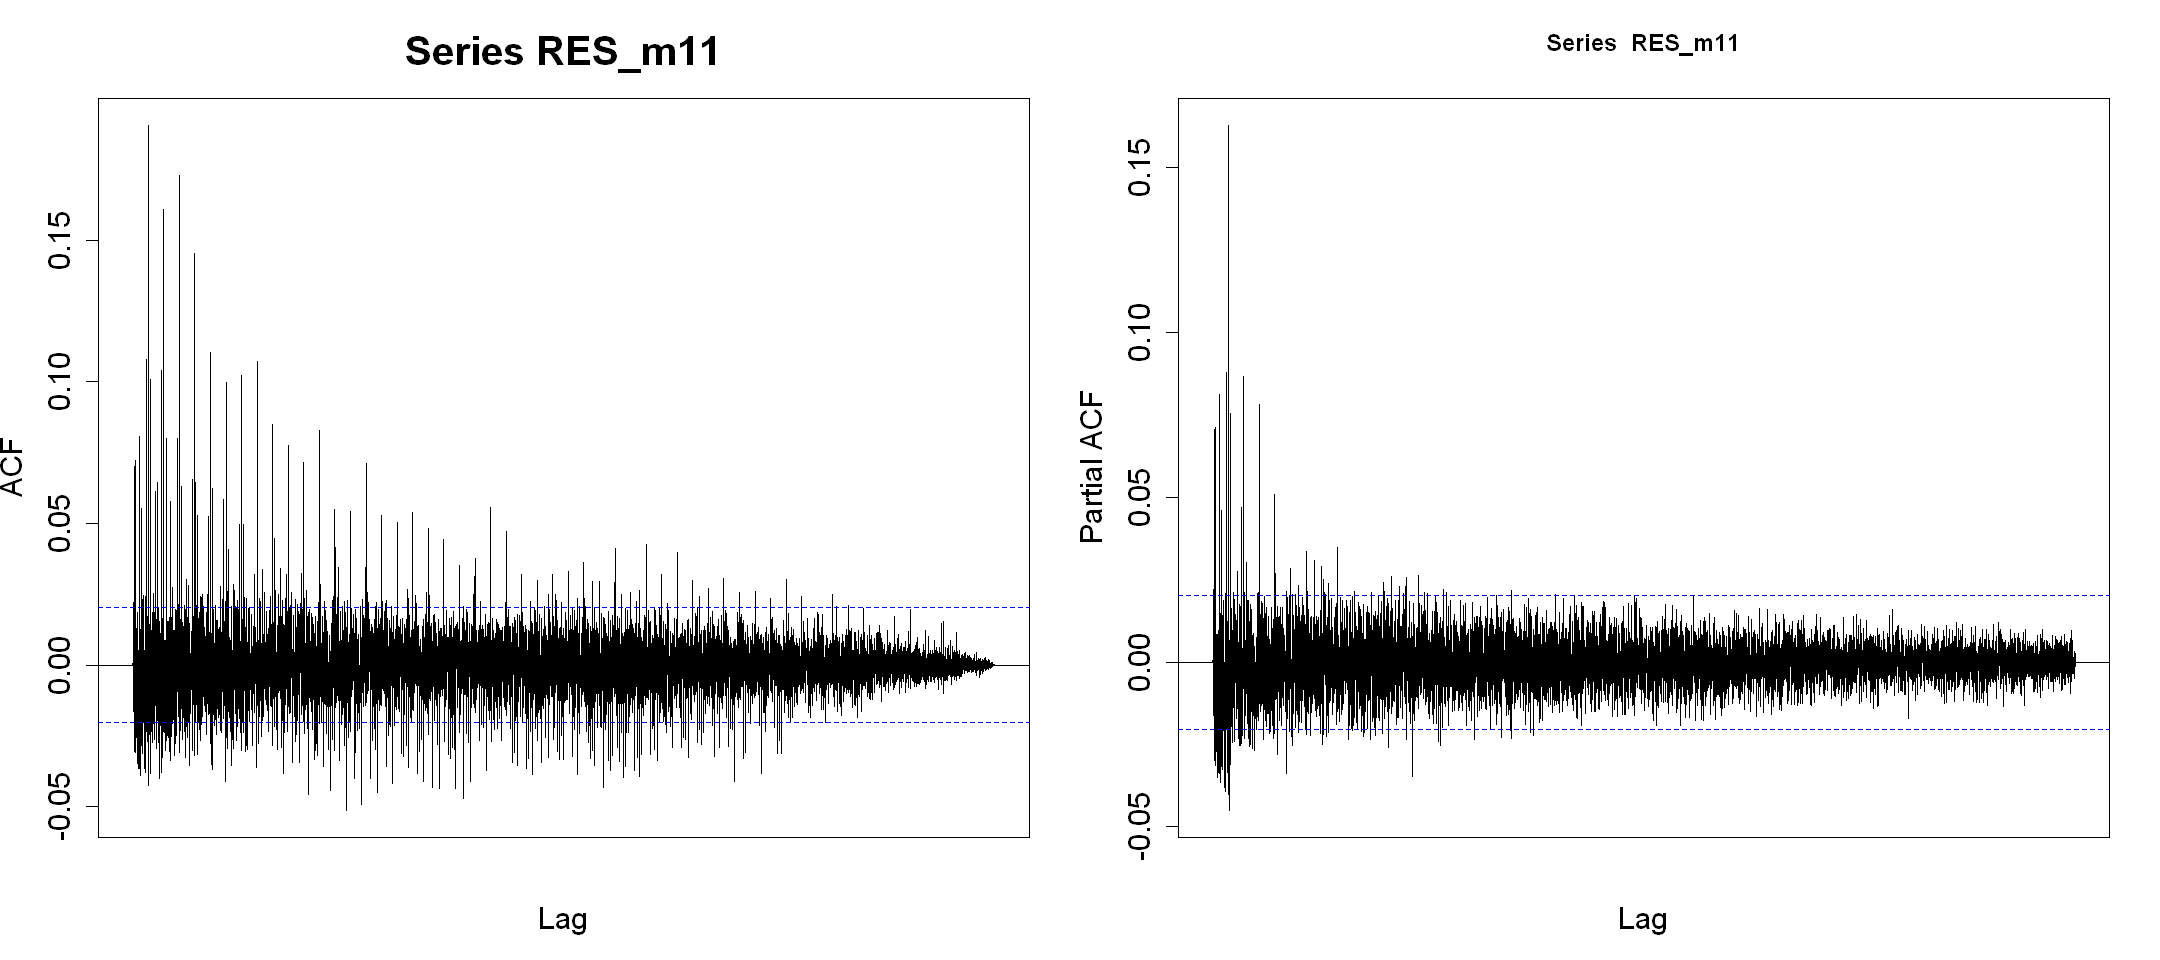

In [76]:
# Diagnósticos do modelo m11

# Resíduos
RES_m11 = m11$res

# Teste de Durbin-Watson para autocorrelação dos resíduos
lmtest::dwtest(RES_m11~1) # versão 2

# Outros testes para autocorrelação dos resíduos
stats::Box.test(RES_m11, lag = 1, type = "Ljung-Box") #teste de Ljung-Box
lmtest::bgtest(RES_m11~1) #teste de Breusch-Godfrey

# Tetes para estacionáridade da série
tseries::kpss.test(RES_m11) #Teste de Kwiatkowski-Phillips-Schmidt-Shin
tseries::adf.test(RES_m11) #Teste de Dickey-Fuller 

# Tetes de normalidade dos resíduos
ks.test(RES_m11, pnorm, 0, sd(m11$res))

# Gráfico de auto-correlação e auto-correlação parcial
options(repr.plot.width=18, repr.plot.height=8) #pacote repr
par(mfrow=c(1,2))
acf(RES_m11, cex.lab=1.5, cex.axis=1.5, cex.main=2, xaxt='n', lag.max=10000) #lag 10000
pacf(RES_m11, cex.lab=1.5, cex.axis=1.5, cex.main=2, xaxt='n', lag.max=10000) #lag 10000


### Seção 13.4 - Ajustando modelo de Rede Neural Autoregressiva  (informação hora a hora)

In [77]:
# Ajuste do modelo de rede naeural autoregressiva com as covariáveis X

m12_temp_ini = Sys.time()
m12 = forecast::nnetar(y = TS_Ym10, xreg = as.matrix(DF_X_STAT)); m12
m12_temp_fin = Sys.time()
m12_temp = m12_temp_fin-m12_temp_ini; m12_temp

# Teste dos coeficientes do modelo
#lmtest::coeftest(m10)

Series: TS_Ym10 
Model:  NNAR(27,1,19)[24] 
Call:   forecast::nnetar(y = TS_Ym10, xreg = as.matrix(DF_X_STAT))

Average of 20 networks, each of which is
a 37-19-1 network with 742 weights
options were - linear output units 

sigma^2 estimated as 0.0003566

Time difference of 5.777726 mins


	Durbin-Watson test

data:  RES_m12 ~ 1
DW = 2.1251, p-value = 1
alternative hypothesis: true autocorrelation is greater than 0



	Box-Ljung test

data:  RES_m12
X-squared = 36.847, df = 1, p-value = 1.278e-09



	Breusch-Godfrey test for serial correlation of order up to 1

data:  RES_m12 ~ 1
LM test = 36.836, df = 1, p-value = 1.285e-09



	KPSS Test for Level Stationarity

data:  RES_m12
KPSS Level = 0.26753, Truncation lag parameter = 12, p-value = 0.1



	Augmented Dickey-Fuller Test

data:  RES_m12
Dickey-Fuller = -26.786, Lag order = 21, p-value = 0.01
alternative hypothesis: stationary



	One-sample Kolmogorov-Smirnov test

data:  RES_m12
D = NA, p-value = NA
alternative hypothesis: two-sided


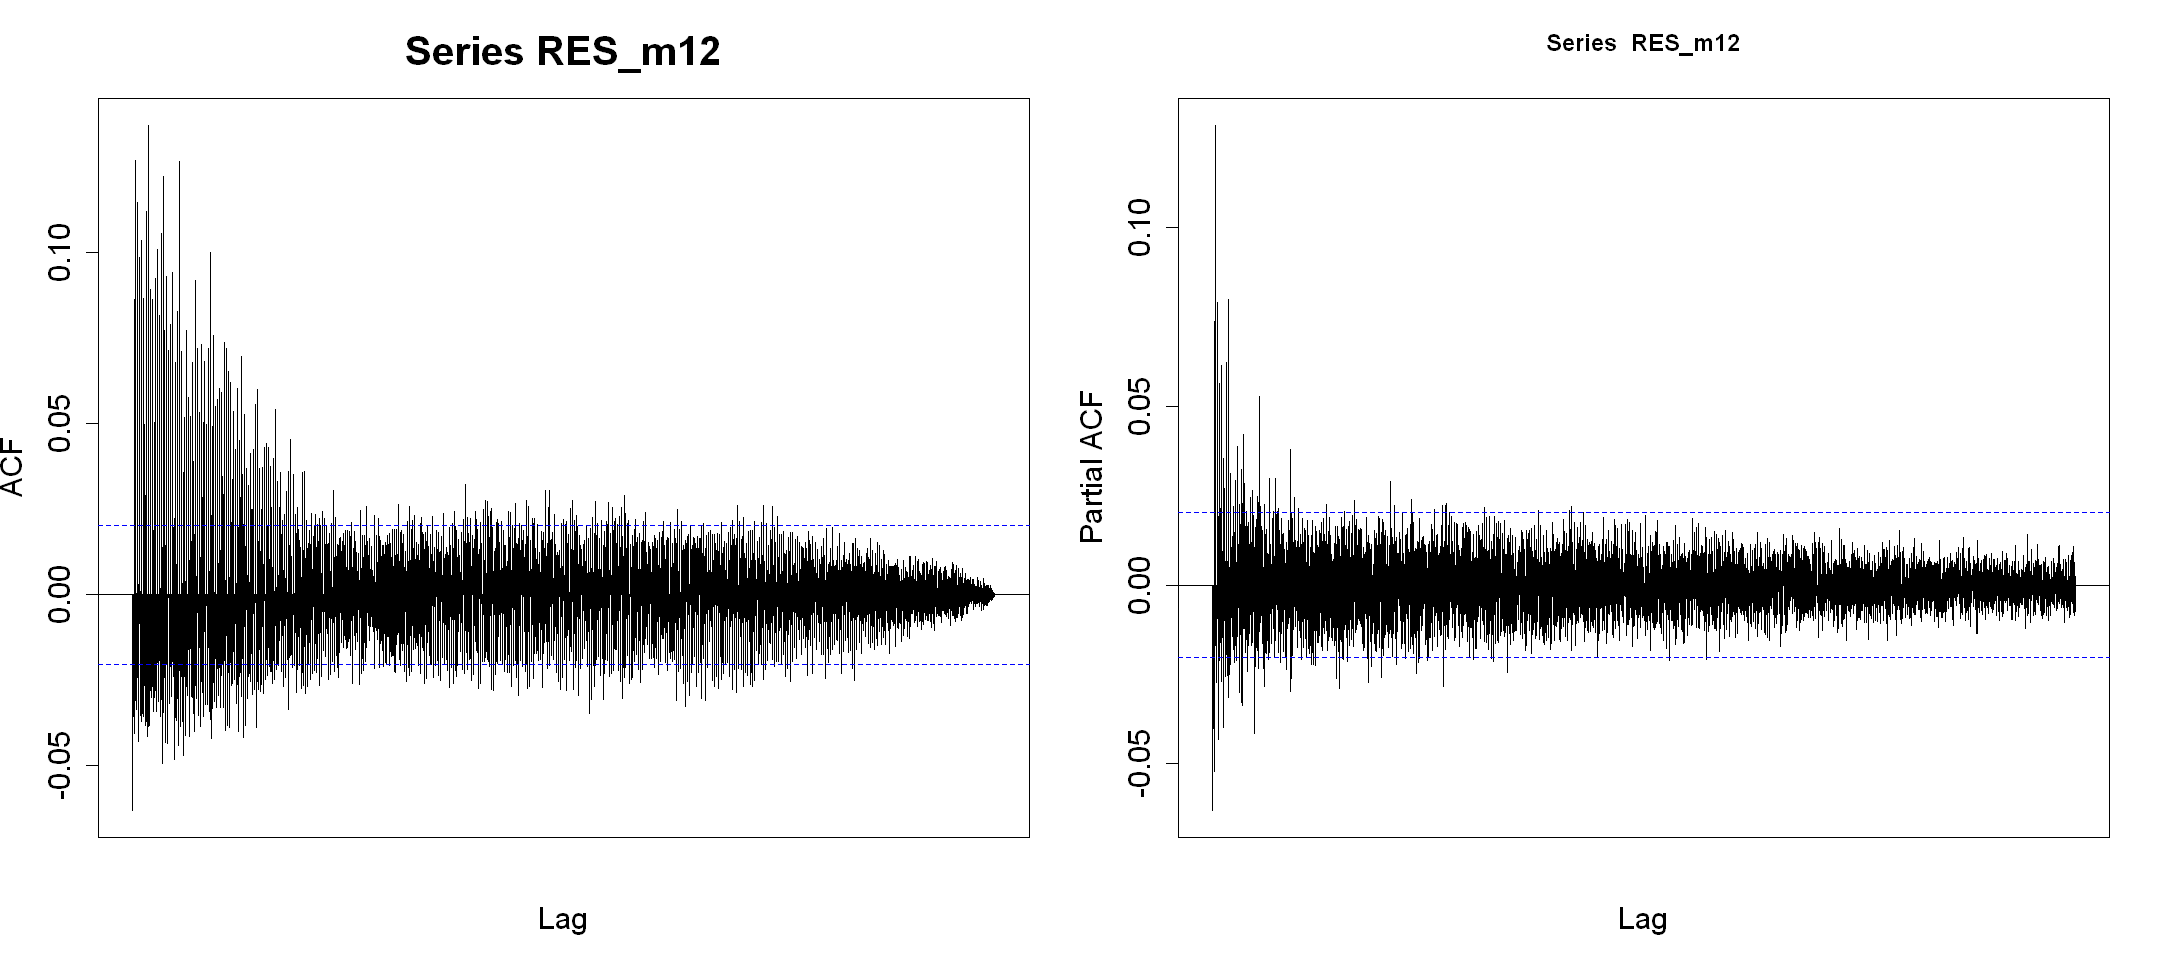

In [78]:
# Diagnósticos do modelo m12

# Resíduos
RES_m12 = na.omit(m12$res)

# Teste de Durbin-Watson para autocorrelação dos resíduos
lmtest::dwtest(RES_m12~1) # versão 2

# Outros testes para autocorrelação dos resíduos
stats::Box.test(RES_m12, lag = 1, type = "Ljung-Box") #teste de Ljung-Box
lmtest::bgtest(RES_m12~1) #teste de Breusch-Godfrey

# Tetes para estacionáridade da série
tseries::kpss.test(RES_m12) #Teste de Kwiatkowski-Phillips-Schmidt-Shin
tseries::adf.test(RES_m12) #Teste de Dickey-Fuller 

# Tetes de normalidade dos resíduos
ks.test(RES_m12, pnorm, 0, sd(m12$res))

# Gráfico de auto-correlação e auto-correlação parcial
options(repr.plot.width=18, repr.plot.height=8) #pacote repr
par(mfrow=c(1,2))
acf(RES_m12, cex.lab=1.5, cex.axis=1.5, cex.main=2, xaxt='n', lag.max=10000) #lag 10000
pacf(RES_m12, cex.lab=1.5, cex.axis=1.5, cex.main=2, xaxt='n', lag.max=10000) #lag 10000


### Seção 13.5 - Medidas de qualidade do ajuste dos 12 modelos (fitted values analysis)

In [139]:
# Aqui verificamos o qual próximo são os valores ajustados dos valores observados.

DF_FIT_VALUES_MODEL = data.frame(DF_REG[,1:2],
                                    FIT_VALUE_M1 = m1$fit,
                                    FIT_VALUE_M2 = exp(m2$fit),
                                    FIT_VALUE_M3 = m3$fit,
                                    FIT_VALUE_M4 = exp(m4$fit),
                                    FIT_VALUE_M5 = m5$fit,
                                    FIT_VALUE_M6 = m6$fit,
                                    FIT_VALUE_M7 = m7$fit,
                                    FIT_VALUE_M8 = m8$fit,
                                    FIT_VALUE_M9 = exp(m9$fit),
                                    FIT_VALUE_M10 = c(NA, exp(m10$fit)),
                                    FIT_VALUE_M11 = c(NA, exp(m11$fit)),
                                    FIT_VALUE_M12 = c(NA,exp(m12$fit))
                                        )

m_fit_acc_fun = function(MAT_){ #função para calcular as medidas de qualidade do ajuste
    Y_ = MAT_[,1]
    Y_fit = MAT_[,2]     
    MAE = mean(abs(Y_-Y_fit))
    RMSE = sqrt(mean((Y_-Y_fit)^2))
    MAPE = mean(abs(((Y_-Y_fit)/Y_)))
    SMAPE = mean(2*(abs((Y_-Y_fit))/(Y_+Y_fit)))
    return(round(c(MAE, RMSE, MAPE, SMAPE),2)) 
}

DF_M_RESULT = data.frame(MAE=numeric(), RMSE=numeric(), MAPE = numeric(), SMAPE = numeric())


for(i in 3:ncol(DF_FIT_VALUES_MODEL)){
    DF_M_RESULT[i-2,] = m_fit_acc_fun(na.omit(DF_FIT_VALUES_MODEL[,c(2, i)]))
}

DF_M_RESULT = data.frame(MODEL=paste('m',1:12, sep=''), DF_M_RESULT); DF_M_RESULT


,MODEL,MAE,RMSE,MAPE,SMAPE
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,m1,58.28,75.13,0.05,0.05
2,m2,56.60,73.50,0.05,0.05
3,m3,54.09,69.61,0.05,0.05
4,m4,53.18,68.58,0.05,0.05
5,m5,56.68,73.46,0.05,0.05
6,m6,53.28,68.54,0.05,0.05
7,m7,56.30,73.11,0.05,0.05
8,m8,53.57,68.87,0.05,0.05
9,m9,61.43,84.22,0.05,0.05


### Seção 13.6 - Medidas de qualidade do ajuste dos 12 modelos  para os valores preditos (forecast analysis)

In [140]:
# Valores preditos

# Predição do modelo m1
pred_m1 = stats::predict(object = m1, newdata=data.frame(DF_TEST[-1, -c(1,2)]), 
                            interval='prediction', type='response', level=0.90)


# Predição do modelo m2
pred_m2 = stats::predict(object = m2, newdata=data.frame(DF_TEST[-1, -c(1,2)]), 
                            interval='prediction', type='response', level=0.90)
pred_m2 = exp(pred_m2)


# Predição do modelo m3
pred_m3 = stats::predict(object = m3, newdata=data.frame(DF_TEST[-1, -c(1,2)]), 
                            interval='prediction', type='response', level=0.90)


# Predição do modelo m4
pred_m4 = stats::predict(object = m4, newdata=data.frame(DF_TEST[-1, -c(1,2)]), 
                            interval='prediction', type='response', level=0.90)
pred_m4 = exp(pred_m4)


# Predição do modelo m5
pred_m5 = add_pi(df = data.frame(DF_TEST[-1, -c(1)]), fit = m5, alpha = 0.1, 
                    names = c('LOW_PI','UPP_PI'), yhatName = 'Y_PRED', nSims = 3000)
pred_m5 = pred_m5[,c('Y_PRED','LOW_PI','UPP_PI')]


# Predição do modelo m6
pred_m6 = add_pi(df = data.frame(DF_TEST[-1, -c(1)]), fit = m6, alpha = 0.1, 
                    names = c('LOW_PI','UPP_PI'), yhatName = 'Y_PRED', nSims = 3000)
pred_m6 = pred_m6[,c('Y_PRED','LOW_PI','UPP_PI')]


# Predição do modelo m7
pred_m7 = add_pi(df = data.frame(DF_TEST[-1, -c(1)]), fit = m7, alpha = 0.1, 
                    names = c('LOW_PI','UPP_PI'), yhatName = 'Y_PRED', nSims = 3000)
pred_m7 = pred_m7[,c('Y_PRED','LOW_PI','UPP_PI')]


# Predição do modelo m8
pred_m8 = add_pi(df = data.frame(DF_TEST[-1, -c(1)]), fit = m8, alpha = 0.1, 
                    names = c('LOW_PI','UPP_PI'), yhatName = 'Y_PRED', nSims = 3000)
pred_m8 = pred_m8[,c('Y_PRED','LOW_PI','UPP_PI')]


# Predição do modelo m9
pred_m9 = forecast(m9, h=24, level=0.90)
pred_m9 = data.frame(Y_PRED = exp(pred_m9$mean), LOW_IC = exp(pred_m9$lower), UPP_IC = exp(pred_m9$upper))


# Predição do modelo m10
pred_m10 = forecast(m10, h=24, level=0.90, xreg=as.matrix(DF_X_STAT_TEST))
pred_m10 = data.frame(Y_PRED = exp(pred_m10$mean), LOW_IC = exp(pred_m10$lower), UPP_IC = exp(pred_m10$upper))


# Predição do modelo m11
pred_m11 = forecast(m11, h=24, level=0.90, xreg=as.matrix(cbind(DF_X_STAT_TEST,D_MAT_TEST)))
pred_m11 = data.frame(Y_PRED = exp(pred_m11$mean), LOW_IC = exp(pred_m11$lower), UPP_IC = exp(pred_m11$upper))


# Predição do modelo m12
pred_m12 = forecast(m12, h=24, PI=TRUE, xreg=as.matrix(DF_X_STAT_TEST), level=90)
pred_m12 = data.frame(Y_PRED = exp(pred_m12$mean), LOW_IC = exp(pred_m12$lower), UPP_IC = exp(pred_m12$upper))



In [141]:
# Aqui verificamos o qual próximo são os valores ajustados dos valores observados por meio das medidas de qualidade
# do ajuste.

DF_PRED_VALUES_MODEL = data.frame(DF_TEST[-1,1:2],
                                    PRED_VALUE_M1 = pred_m1[,1],
                                    PRED_VALUE_M2 = pred_m2[,1],
                                    PRED_VALUE_M3 = pred_m3[,1],
                                    PRED_VALUE_M4 = pred_m4[,1],
                                    PRED_VALUE_M5 = pred_m5[,1],
                                    PRED_VALUE_M6 = pred_m6[,1],
                                    PRED_VALUE_M7 = pred_m7[,1],
                                    PRED_VALUE_M8 = pred_m8[,1],
                                    PRED_VALUE_M9 = pred_m9[,1],
                                    PRED_VALUE_M10 = pred_m10[,1],
                                    PRED_VALUE_M11 = pred_m11[,1],
                                    PRED_VALUE_M12 = pred_m12[,1]
                                        )

DF_M_RESULT_PRED = data.frame(MAE=numeric(), RMSE=numeric(), MAPE = numeric(), SMAPE = numeric())

for(i in 3:ncol(DF_M_RESULT_PRED)){
    DF_M_RESULT_PRED[i-2,] = m_fit_acc_fun(na.omit(DF_PRED_VALUES_MODEL[,c(2, i)]))
}

DF_M_RESULT_PRED = data.frame(MODEL=paste('m',1:12, sep=''), DF_M_RESULT_PRED); DF_M_RESULT_PRED





MODEL,MAE,RMSE,MAPE,SMAPE
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
m1,65.06,76.54,0.07,0.07
m2,57.45,65.71,0.06,0.06
m3,65.06,76.54,0.07,0.07
m4,57.45,65.71,0.06,0.06
m5,65.06,76.54,0.07,0.07
m6,57.45,65.71,0.06,0.06
m7,65.06,76.54,0.07,0.07
m8,57.45,65.71,0.06,0.06
m9,65.06,76.54,0.07,0.07


In [142]:
# Aqui verificamos o qual a proporção de valores observados que foram englobados pelos intervalos de predição/confiança

# Vetor proporção de valores dentro dos intervalos para cada modelo
P_m1 = sum((DF_TEST[-1,2] >= pred_m1[,2]) & (DF_TEST[-1,2] <= pred_m1[,3]))/nrow(DF_TEST[-1,])
P_m2 = sum((DF_TEST[-1,2] >= pred_m2[,2]) & (DF_TEST[-1,2] <= pred_m2[,3]))/nrow(DF_TEST[-1,])
P_m3 = sum((DF_TEST[-1,2] >= pred_m3[,2]) & (DF_TEST[-1,2] <= pred_m3[,3]))/nrow(DF_TEST[-1,])
P_m4 = sum((DF_TEST[-1,2] >= pred_m4[,2]) & (DF_TEST[-1,2] <= pred_m4[,3]))/nrow(DF_TEST[-1,])
P_m5 = sum((DF_TEST[-1,2] >= pred_m5[,2]) & (DF_TEST[-1,2] <= pred_m5[,3]))/nrow(DF_TEST[-1,])
P_m6 = sum((DF_TEST[-1,2] >= pred_m6[,2]) & (DF_TEST[-1,2] <= pred_m6[,3]))/nrow(DF_TEST[-1,])
P_m7 = sum((DF_TEST[-1,2] >= pred_m7[,2]) & (DF_TEST[-1,2] <= pred_m7[,3]))/nrow(DF_TEST[-1,])
P_m8 = sum((DF_TEST[-1,2] >= pred_m8[,2]) & (DF_TEST[-1,2] <= pred_m8[,3]))/nrow(DF_TEST[-1,])
P_m9 = sum((DF_TEST[-1,2] >= pred_m9[,2]) & (DF_TEST[-1,2] <= pred_m9[,3]))/nrow(DF_TEST[-1,])
P_m10 = sum((DF_TEST[-1,2] >= pred_m10[,2]) & (DF_TEST[-1,2] <= pred_m10[,3]))/nrow(DF_TEST[-1,])
P_m11 = sum((DF_TEST[-1,2] >= pred_m11[,2]) & (DF_TEST[-1,2] <= pred_m11[,3]))/nrow(DF_TEST[-1,])
P_m12 = sum((DF_TEST[-1,2] >= pred_m12[,2]) & (DF_TEST[-1,2] <= pred_m12[,3]))/nrow(DF_TEST[-1,])
VET_PROP_INTERVAL = c(P_m1, P_m2, P_m3, P_m4, P_m5, P_m6, P_m7, P_m8, P_m9, P_m10, P_m11, P_m12)

# Base com as proporções
DF_RESULT_PROP = data.frame(MODEL=paste('m',1:12, sep=''), PROP_INTERVAL=VET_PROP_INTERVAL*100); DF_RESULT_PROP


MODEL,PROP_INTERVAL
<chr>,<dbl>
m1,95.83333
m2,95.83333
m3,75.00000
m4,83.33333
m5,95.83333
m6,79.16667
m7,95.83333
m8,91.66667
m9,83.33333


## Seção 14 - Esboço de identificação de outliers na variável resposta 

In [ ]:
# Teste para verificação de outliers na resposta

#RESP_OUTLIERS_AO = tsoutliers::tso(y=ts(log(DF_REG$Y),start=c(1,18), frequency=24) ,type="AO")
#head(RESP_OUTLIERS_AO)


## Seção 15 - RESPOSTAS

**1.	Escolha uma estratégia de tratamento de valores faltantes e outliers e justifique sua escolha.**

Tendo em vista que os dados são provenientes de registros diários no formato hora a hora, as variáveis podem ser trabalhadas como séries temporais (processos estocásticos discretos). Com base nisso, optou-se por trabalhar com interpolação linear, tendo em vista que uma reta seria a escolha mais simples de conectar as observações em cada espaço com ausência de informação na série temporal. Vale comentar que a interpolação linear nos fornece informação de tendência, minimizizando a perda de informação.

Agora com relação aos valores atípicos (outliers), existem algumas forma de detectar estas observações atípicas. Atualente em R, existe um novo pacote chamado "tsoutliers" que foi construído com base no artigo de 2012 de Chung Chen & Lon-Mu Liu (Joint Estimation of Model Parameters and Outlier Effects in Time Series). Neste pacote temos a função que "tso" que nos permite detectar outliers de 5 tipos diferentes: outliers inovadores ("IO"), outliers aditivos ("AO"), outiliers de mudanças de nível ("LS"), outliers de mudanças temporárias ("TC") e outliers de mudanças de nível sazonais ("SLS"). Além disso, essa função admite o uso de covariáveis. Então uma abordagem seria identificar os outliers por meio da metodologia de Chen & Liu, substituir os valores por valores interpolados e verificar se os modelos preditivos melhoram sua eficácia. Outra forma também de detectar tais outliers seria ajustar os modelos e e estimar de forma intervalar os valores ajustados, assim gerando um intervalo no qual toda observação fora seria um possível outlier. Outra forma de identificar seria por meio de medidas como distância de cook em modelos de regressão, mas teriámos que desconsiderar que as variáveis são séries temporais. Na seção 13, é possível ver a influência destes outliers nos métodos gráficos para diagnóstico dos modelos.


**2.	Para as quartas-feiras, quais os horários de pico na cidade (de maior concentração de CO)?**

Como visto na Seção 8, as quartas feiras, os horários de pico de maior concentração de CO ocorrem no horário das 8 da manhã, seguido do horário das 19 horas da noite. Tal comportamento parece está vinculado ao horário de trabalho das pessoas desta cidade. Além disso, ainda na Seção 8, é possível verificar que o gráfico de caixas hora a hora para as quartas feiras apresenta o mesmo comportamento do gráfico de caixas hora a hora que desconsidera a informação do dias da semana. Outro ponto a comentar-se é de que o horário das 8 horas da manhã apresenta mediana de 1339 (Intervalo interquartílico de 294,5) e média de 1332,58 (desvio padrão de 220,42) e esses valores de estatísticas de tendência central são os maiores dentre os horários das quartas feiras.


**3.	Quais as variáveis mais correlacionadas com a variável de predição?**

Como visto na Seção 9, a variável mais correlacionada com a nossa variável resposta é a variável X8 (PT08.S5 (O3)) que apresenta correlação linear de pearson de 0,9. Outras variáveis bastante correlacionadas são as variáveis X3 (PT08.S2 (NMHC)) e X2 (4 Benzene Concentration (mg/m^3)) com respectivos valores de correlação linear de 0,89 e 0,88. Vale comentar que tal padrão de correlação foi medido com as informações hora a hora. Contudo, caso seja verificado a média diária, vemos que o o padrão destas variáveis se mantém, sendo X8 a variável mais correlacionada e as demais da mesma forma, tendo X3 como segundo lugar e X2 como terceiro lugar.


**4.	Crie um modelo de regressão de PT08.S1 a partir das demais variáveis. Avalie usando as métricas que julgar pertinente para o problema.**

Para trabalhar a variável resposta com uma estrutura de regressão, decidiu-se utilizar modelos populares na literatura e com isso optou-se por 5 classes de modelos:

    CLASSE - I) Regressão Linear Múltipla;
	CLASSE - II) Regressão Linear Generalizada com distribuição Gamma;
	CLASSE - III) ARIMA;
	CLASSE - IV) Regressão Linear com Resíduo ARIMA;
	CLASSE - V) Rede Neural Autorregressiva.

Estas 5 classes geraram 12 modelos, sendo 4 modelos da classe (I), 4 modelos da classe (II), 1 modelo da classe (III), 2 modelos da classe (IV) e 1 modelo da classe (V). Tais modelos foram:

    CLASSE - I) 
        i) Modelo de Regressão Linear Múltiplo convencional — m1;
        ii) Modelo de Regressão Linear Múltiplo com variável resposta transformada pelo logarítmo natural — m2;
        iii) Modelo de Regressão Linear Múltiplo com adição da covariável categórica hora — m3;
        iv) Modelo de Regressão Linear Múltiplo com adição da covariável categórica hora e com variável resposta transformada pelo logarítmo natural — m4.

	CLASSE - II) 
		i) Modelo de Regressão Linear Generalizado com distribuição Gamma e função de ligação logarítimica — m5;
		ii) Modelo de Regressão Linear Generalizado com distribuição Gamma, função de ligação logarítimica e adição da covariável categórica hora — m6;
		iii) Modelo de Regressão Linear Generalizado com distribuição Gamma e função de ligação inversa — m7;
		iv) Modelo de Regressão Linear Generalizado com distribuição Gamma, função de ligação inversa e adição da covariável categórica hora — m8.

	CLASSE - III)
		i) Modelo SARIMA — m9.

	CLASSE - IV) 
		i) Modelo de Regressão Linear com Resíduo SARIMA (ARIMAX) — m10;
		ii) Modelo de Regressão Linear com Resíduo SARIMA (ARIMAX) e adição da covariável categórica hora — m11. 

	CLASSE - V) 
		i) Rede Neural Autorregressiva — m12.


Para verificar a qualidade do ajuste dos modelos, realizou-se testes nos resíduos proporcionados por cada modelo de modo a verificar a adequação dos modelos aos dados. Como formas de avaliação dos resíduos, utilizou-se:

    I) Teste de Autocorrelação;
	II) Teste de Estacionaridade; 
	III) Teste de Normalidade;
	IV) Gráfico de Normalidade Quantil-Quantil;
	V) Gráfico meio normal;
	VI) Gráfico de autocorrelação;
	VII) Gráfico de autocorrelação parcial

No que diz respeito ao ajuste dos modelos, a base de dados foi dividida em duas partes. A primeira parte contia as observações até o dia 2 de abril de 2005. A segunda base contia as observações do dia 3 de abril de 2005. A primeira base foi construída para servir de insumo na construção dos modelos e a segunda base foi construída para demonstrar o potêncial preditivo dos mesmos. Logo após a divisão da base, os modelos foram estimados e seus parâmetros tiveram sua significância estatística testada por meio do teste t de modo a constatar quais variáveis eram relevantes para o modelo. Vale comentar que tal teste foi possível devido à tais parâmetros terem sido estimados por meio do método de máxima verossimilhança. Em seguida, foi realizado o estudo dos resíduos com as métricas já comentadas e constatou-se que todos os modelos fugiam dos pressupostos indicados na literatura (fato comum de ocorrer em dados reais) (fuga de pressuposto como ausência de normalidade dos resíduos ou identificação de correlação serial nos resíduos). Logo em seguida, vericou-se quais modelos apresentaram maior proximidade aos dados por meio das medidas:

	I) Raiz doerro quadrático médio (RMSE)
	II) Erro absoluto médio (MAE)
	III) Erro percentual absoluto médio (MAPE)
	III) Erro percentual absoluto médio simétrico (SMAPE)

Por fim, todos modelos foram utilizados para predizer as próximas 24horas e suas predições foram construídas em termos de estimação pontual e intervalar com 0,95 de confiança. Além disso, para avaliar a qualidade de predição, utilizou-se  as métricas já mencionadas RMSE, MAE, MAPE e SMAPE, além de verificar a proporção de observações que pertenciam à estimativa intervalar de cada modelo. Depois de verificar as medidas para os valores preditos (predicted values ) e ajustados (fitted values), constatou-se que para os valores ajustados, o melhor modelo foi o m12 (Rede Neural Autorregressiva) seguido do modelo m11 (Modelo de Regressão Linear com Resíduo SARIMA (ARIMAX) e adição da covariável categórica hora). Já para os valores peditos, tivemos o mesmo resultado sendo o melhor m12 o melhor modelo e m11 o segundo melhor. Além disso, as estimativas intervalores dos modelos m12 e m11 englobaram todos os valores das obervações. Outro ponto a considera-se é de que o modelo m12 apresenta menor tempode de processamento para ser estimado. Vale comentar que os modelos de regressão também apresentaram bons resultados de predição pontual e intervalar. Para maiores detalhes, ver a seção 13 que apresenta todos os passos comentados aqui.


**5.	Pergunta bônus: como as estações do ano interferem nas variáveis/predição e qual sua proposta de solução?**

Tendo em vista a natureza hora a hora das variáveis e o curto espaço de tempo (pouco mais de 1 ano), não identificou-se a influência das estações do ano. Contudo, vale comentar que o estudo baseou-se na estrutura de um dia com 24 horas, assim tendo a idéia de sazonalidade atribuída ao dia. Além disso, vale lembrar que ao trabalhar as estações do ano, o conjunto de dados ficaria reduzido a poucas observações.

